In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table
import data_management
import ratios_z
import ratios_ha
import ratios_o32
import line_coverage

SPHINX_DATA = Path('/Users/njc5787/Research/SPHINX-20-data/data').resolve()
RUBIES_DATA = Path('../data').resolve()
FIGURES = Path('./figures').resolve()

LINE_SIGNAL_TO_NOISE = 3

RUBY_HEXCODE = '#E0115F'
GRATING_COLORS = [RUBY_HEXCODE, 'k']
COLORS = ['#CC79A7', '#D55E00', '#0072B2', '#56B4E9', '#009E73', '#E69F00', '#000000', '#F0E442',]
PRISM_COLOR = COLORS[2]
G395M_COLOR = COLORS[1]

OII_COLOR = COLORS[0]
NEIII_COLOR = COLORS[1]
HB_COLOR = COLORS[2]
OIII_4959_COLOR = COLORS[3]
OIII_5007_COLOR = COLORS[4]
HA_COLOR = COLORS[5]
SII_COLOR = COLORS[5]


In [3]:
line_fluxes = pd.read_csv(RUBIES_DATA.joinpath('line_flux_df.csv'), index_col=0)
line_fluxes_prism = data_management.make_df_prism(line_fluxes)
line_fluxes_g395m = data_management.make_df_g395m(line_fluxes)

O32df_prism = data_management.signal_to_noise_O32_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O32df_g395m = data_management.signal_to_noise_O32_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O32df_both = pd.merge(O32df_prism, O32df_g395m, on='id', how='inner')

O32Hadf_prism = data_management.signal_to_noise_O32Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O32Hadf_g395m = data_management.signal_to_noise_O32Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O32Hadf_both = pd.merge(O32Hadf_prism, O32Hadf_g395m, on='id', how='inner')

R23df_prism = data_management.signal_to_noise_R23_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
R23df_g395m = data_management.signal_to_noise_R23_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
R23df_both = pd.merge(R23df_prism, R23df_g395m, on='id', how='inner')

R23Hadf_prism = data_management.signal_to_noise_R23Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
R23Hadf_g395m = data_management.signal_to_noise_R23Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
R23Hadf_both = pd.merge(R23Hadf_prism, R23Hadf_g395m, on='id', how='inner')

O3Hbdf_prism = data_management.signal_to_noise_O3Hb_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O3Hbdf_g395m = data_management.signal_to_noise_O3Hb_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O3Hbdf_both = pd.merge(O3Hbdf_prism, O3Hbdf_g395m, on='id', how='inner')

O3HbHadf_prism = data_management.signal_to_noise_O3HbHa_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O3HbHadf_g395m = data_management.signal_to_noise_O3HbHa_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O3HbHadf_both = pd.merge(O3HbHadf_prism, O3HbHadf_g395m, on='id', how='inner')

Ne3O2df_prism = data_management.signal_to_noise_Ne3O2_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
Ne3O2df_g395m = data_management.signal_to_noise_Ne3O2_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
Ne3O2df_both = pd.merge(Ne3O2df_prism, Ne3O2df_g395m, on='id', how='inner')

Ne3O2Hadf_prism = data_management.signal_to_noise_Ne3O2Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
Ne3O2Hadf_g395m = data_management.signal_to_noise_Ne3O2Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
Ne3O2Hadf_both = pd.merge(Ne3O2Hadf_prism, Ne3O2Hadf_g395m, on='id', how='inner')

Ne3O32df_prism = data_management.signal_to_noise_Ne3O32_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
Ne3O32df_g395m = data_management.signal_to_noise_Ne3O32_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
Ne3O32df_both = pd.merge(Ne3O32df_prism, Ne3O32df_g395m, on='id', how='inner')

Hadf_prism = line_fluxes_prism[data_management.signal_to_noise_Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)]
Hadf_g395m = line_fluxes_g395m[data_management.signal_to_noise_Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)]
Hadf_both = pd.merge(Hadf_prism, Hadf_g395m, on='id', how='inner')

Hbdf_prism = line_fluxes_prism[data_management.signal_to_noise_Hb_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)]
Hbdf_g395m = line_fluxes_g395m[data_management.signal_to_noise_Hb_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)]
Hbdf_both = pd.merge(Hbdf_prism, Hbdf_g395m, on='id', how='inner')


O3df_prism = line_fluxes_prism[data_management.signal_to_noise_5007_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)]
O3df_g395m = line_fluxes_g395m[data_management.signal_to_noise_5007_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)]
O3df_both = pd.merge(O3df_prism, O3df_g395m, on='id', how='inner')

sphinxdf = data_management.make_sphinx_df(SPHINX_DATA)
sphinx_binned = data_management.make_sphinx_binned_df(sphinxdf)



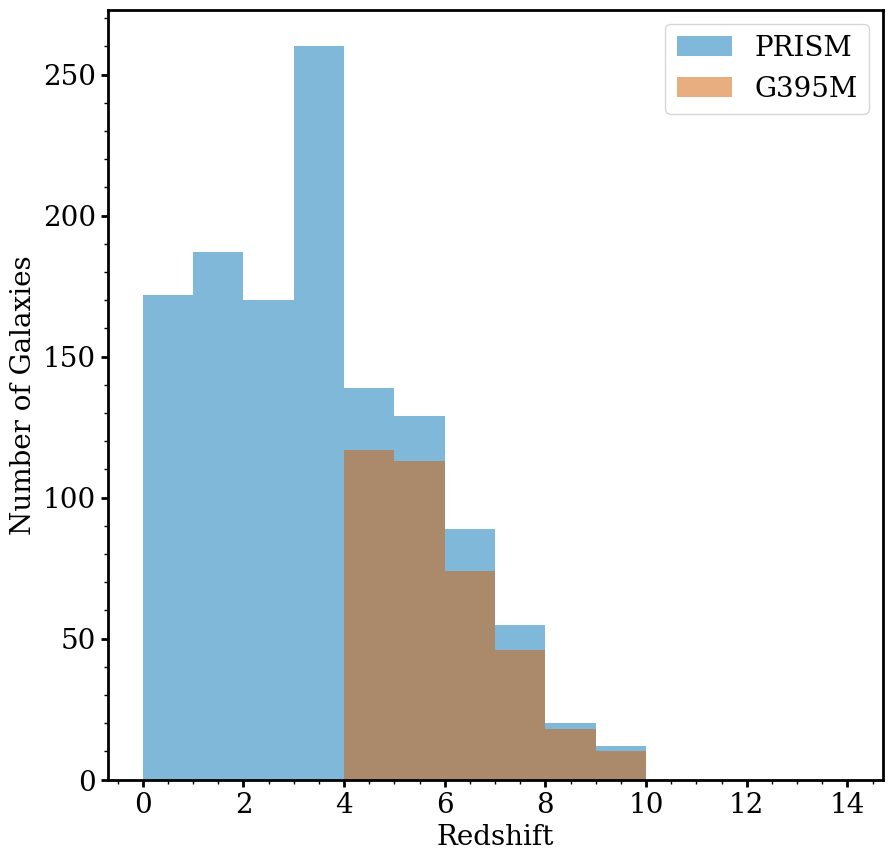

In [4]:
bins = np.arange(0,15,1)
plt.figure(figsize=(10,10))
plt.hist(line_fluxes_prism.z_prism, color=PRISM_COLOR, alpha=0.5, bins=bins, label='PRISM')
plt.hist(line_fluxes_g395m.z_g395m, color=G395M_COLOR, alpha=0.5, bins=bins, label='G395M')
plt.xlabel('Redshift')
plt.ylabel('Number of Galaxies')
plt.legend()
plt.savefig(FIGURES.joinpath('zhist.pdf'))
plt.show()

In [67]:
egs_photometry = list(RUBIES_DATA.glob('egs*sps*.fits'))
egs_photometrydf = (Table.read(egs_photometry[0], format='fits')
      .to_pandas()
)
uds_photometry = list(RUBIES_DATA.glob('uds*sps*.fits'))
uds_photometrydf = (Table.read(uds_photometry[0], format='fits')
      .to_pandas()
)

In [68]:
egs_photometrydf

id          ra        dec  z_spec      z_16      z_50      z_84  \
0       314  215.047219  52.873545  1.0792  1.066959  1.081151  1.093502   
1       482  215.055700  52.881958  2.4795  2.466267  2.479461  2.492917   
2       761  215.048281  52.879975  3.4749  3.460055  3.473852  3.488612   
3       920  215.052344  52.884268  3.6213  3.606445  3.618377  3.634835   
4       921  215.049804  52.882520  4.6191  4.606992  4.620721  4.633611   
..      ...         ...        ...     ...       ...       ...       ...   
631  975193  214.967248  52.963630  6.9899  6.990930  7.001648  7.007428   
632  978590  214.830660  52.887775  7.7616  7.747797  7.760693  7.774701   
633  980841  214.844770  52.892109  8.6937  8.680703  8.695250  8.707724   
634  986615  214.950932  52.957040  6.5036  6.488228  6.499406  6.515163   
635  986719  214.950365  52.956194  6.6728  6.657352  6.668256  6.682675   

       mtot_16    mtot_50    mtot_84  ...     UV_84     VJ_16     VJ_50  \
0     7.663324   7.959884   8.144108  ...  0.571482 -0.322055 -0.197852   
1    10.342180  10.546886  10.728413  ...  1.516407  1.639147  1.717575   
2     8.999971   9.286930   9.565404  ...  0.614665  0.157427  0.333753   
3     8.759178   9.008563   9.229348  ...  0.335386 -0.328727 -0.104180   
4     7.999528   8.249279   8.503069  ...  0.507230 -0.245120 -0.027888   
..         ...        ...        ...  ...       ...       ...       ...   
631   8.124916   8.336600   8.582315  ...  0.364252 -1.342373 -1.122922   
632   8.987303   9.334288   9.755920  ...  1.200153  0.329156  0.861999   
633   9.328617   9.623724   9.887245  ...  0.739568 -0.194869  0.190751   
634   8.763231   9.048732   9.360532  ...  0.539225 -0.309389 -0.111038   
635   8.884218   9.138254   9.386323  ...  0.495100 -0.068157  0.115168   

        VJ_84     gi_16     gi_50     gi_84     ug_16     ug_50     ug_84  
0   -0.061830 -0.114493 -0.033172  0.057216  0.368097  0.488109  0.643127  
1    1.788404  1.209361  1.261519  1.315392  1.401962  1.486741  1.564780  
2    0.524187  0.138138  0.183933  0.219282  0.445031  0.518839  0.602441  
3    0.017901 -0.145954 -0.105428 -0.075021  0.285114  0.329636  0.365150  
4    0.162618 -0.101650 -0.017435  0.053855  0.278632  0.370020  0.483905  
..        ...       ...       ...       ...       ...       ...       ...  
631 -0.803765 -0.529217 -0.459257 -0.379925 -0.132223 -0.073191 -0.000226  
632  1.471908  0.431347  0.710257  1.050598  0.772538  0.956267  1.150985  
633  0.642494  0.063064  0.219559  0.373995  0.349845  0.428431  0.510854  
634  0.118091 -0.107790 -0.006101  0.099194  0.397051  0.454037  0.514091  
635  0.390358 -0.050716  0.076981  0.218769  0.421009  0.485109  0.554430  

[636 rows x 79 columns]

In [104]:
uds_photometrydf.columns

Index(['id_v70', 'id', 'ra', 'dec', 'z_spec', 'z_16', 'z_50', 'z_84',
       'mtot_16', 'mtot_50', 'mtot_84', 'mstar_16', 'mstar_50', 'mstar_84',
       'met_16', 'met_50', 'met_84', 'mwa_16', 'mwa_50', 'mwa_84', 'dust2_16',
       'dust2_50', 'dust2_84', 'dust_index_16', 'dust_index_50',
       'dust_index_84', 'dust1_fraction_16', 'dust1_fraction_50',
       'dust1_fraction_84', 'logfagn_16', 'logfagn_50', 'logfagn_84',
       'sfr10_16', 'sfr10_50', 'sfr10_84', 'sfr30_16', 'sfr30_50', 'sfr30_84',
       'sfr100_16', 'sfr100_50', 'sfr100_84', 'ssfr10_16', 'ssfr10_50',
       'ssfr10_84', 'ssfr30_16', 'ssfr30_50', 'ssfr30_84', 'ssfr100_16',
       'ssfr100_50', 'ssfr100_84', 'rest_U_16', 'rest_U_50', 'rest_U_84',
       'rest_V_16', 'rest_V_50', 'rest_V_84', 'rest_J_16', 'rest_J_50',
       'rest_J_84', 'rest_u_16', 'rest_u_50', 'rest_u_84', 'rest_g_16',
       'rest_g_50', 'rest_g_84', 'rest_i_16', 'rest_i_50', 'rest_i_84',
       'UV_16', 'UV_50', 'UV_84', 'VJ_16', 'VJ_50', 'VJ_84',

In [103]:
photometrydf = pd.concat([egs_photometrydf, uds_photometrydf])

In [3]:
line_fluxes

id   z_prism   z_g395m  msaexp_OIII5007_prism  \
0        280  2.324955       NaN                    NaN   
1        314  1.078537       NaN                    NaN   
2        482  2.499984       NaN                    NaN   
3        532  1.387871       NaN                    NaN   
4        761  3.473451       NaN                    NaN   
...      ...       ...       ...                    ...   
1272  975718  7.876692  7.873466                    NaN   
1273  976141  7.348676  7.346433                    NaN   
1274  977908  0.302261       NaN                    NaN   
1275  978590  7.762086  7.743028                    NaN   
1276  980841  8.694065  8.687803                    NaN   

      msaexp_e_OIII5007_prism  msaexp_OIII5007_g395m  msaexp_e_OIII5007_g395m  \
0                         NaN                    NaN                      NaN   
1                         NaN                    NaN                      NaN   
2                         NaN                    NaN                      NaN   
3                         NaN                    NaN                      NaN   
4                         NaN                    NaN                      NaN   
...                       ...                    ...                      ...   
1272                      NaN                    NaN                      NaN   
1273                      NaN                    NaN                      NaN   
1274                      NaN                    NaN                      NaN   
1275                      NaN                    NaN                      NaN   
1276                      NaN                    NaN                      NaN   

      msaexp_OIII_5007_prism  msaexp_e_OIII_5007_prism  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   
...                      ...                       ...   
1272               602.85880                 26.466034   
1273               159.37079                 24.258465   
1274                 0.00000                  0.000000   
1275               169.48310                 22.472012   
1276              1310.00670                 45.027832   

      msaexp_OIII_5007_g395m  ...  Oii_3727_prism_p84_err  Oii_3727_g395m  \
0                        NaN  ...                3.705917             NaN   
1                        NaN  ...               14.222069             NaN   
2                        NaN  ...              159.154577             NaN   
3                        NaN  ...              361.492870             NaN   
4                        NaN  ...              113.409875             NaN   
...                      ...  ...                     ...             ...   
1272               376.06590  ...               28.638984      104.703682   
1273               128.31060  ...               27.065228        9.626444   
1274                35.96833  ...                2.881836             NaN   
1275               135.44159  ...                8.963379       90.531357   
1276              1259.05370  ...               18.091192       72.465027   

      Oii_3727_g395m_p16_err  Oii_3727_g395m_p84_err  Neiii_3869_prism  \
0                        NaN                     NaN          7.205222   
1                        NaN                     NaN          0.624974   
2                        NaN                     NaN        255.616745   
3                        NaN                     NaN        299.190857   
4                        NaN                     NaN         91.831337   
...                      ...                     ...               ...   
1272               28.675217               30.779262         64.747452   
1273                7.317862               13.212904         17.598598   
1274                     NaN            

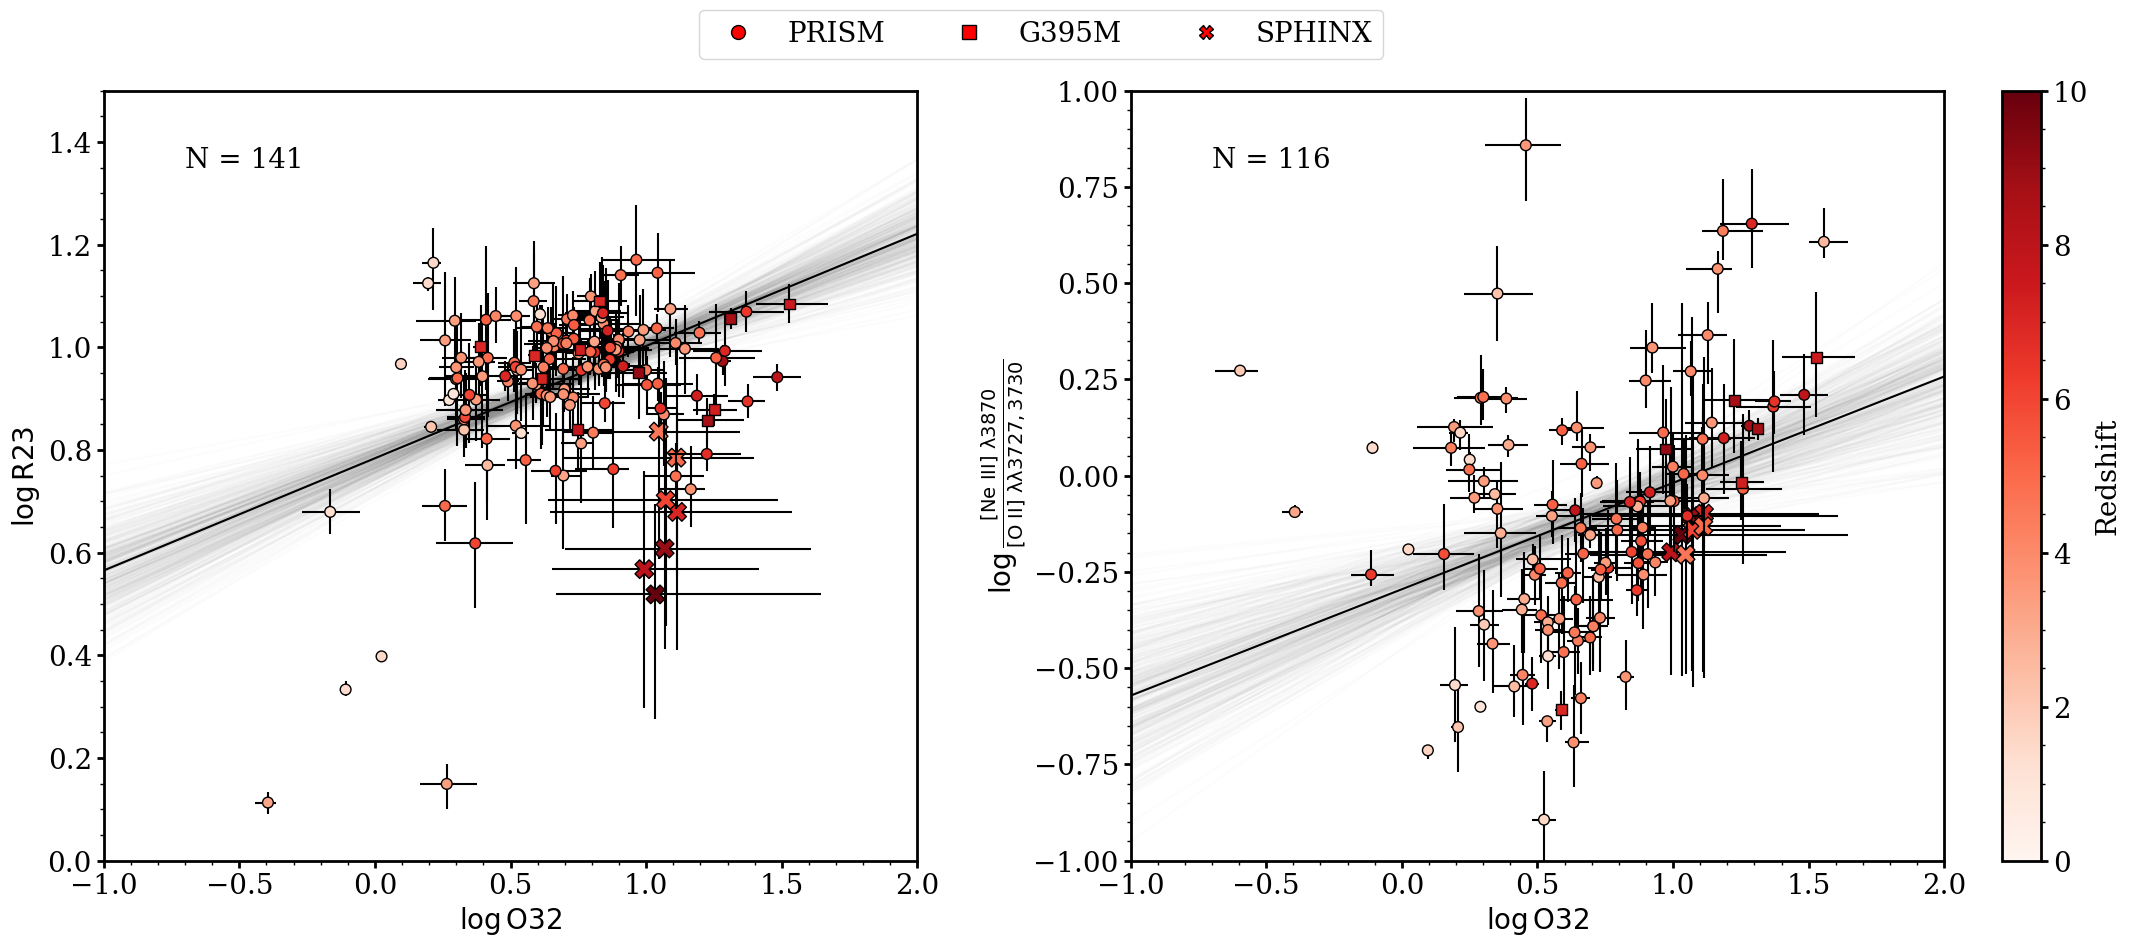

In [42]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
from nikkos_tools import stat_functions as sf
import data_management
import globals
import linmix
line_fluxes = pd.read_csv(globals.RUBIES_DATA.joinpath('line_flux_df.csv'), index_col=0)
line_fluxes_prism = data_management.make_df_prism(line_fluxes)
line_fluxes_g395m = data_management.make_df_g395m(line_fluxes)


R23df_prism = data_management.signal_to_noise_R23_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
R23df_g395m = data_management.signal_to_noise_R23_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
R23df_both = pd.merge(R23df_prism, R23df_g395m, on='id', how='inner')

Ne3O32df_prism = data_management.signal_to_noise_Ne3O32_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
Ne3O32df_g395m = data_management.signal_to_noise_Ne3O32_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
Ne3O32df_both = pd.merge(Ne3O32df_prism, Ne3O32df_g395m, on='id', how='inner')

sphinxdf = data_management.make_sphinx_df(globals.SPHINX_DATA)
sphinx_binned = data_management.make_sphinx_binned_df(sphinxdf)

def plot_R23_versus_O32(ax):
    chain = fit_R23_versus_O32_linmix()
    plot_linmix(ax, chain, -1, 2)
    # ax.scatter(sphinxdf.log_O32, sphinxdf.log_R23, marker='h', c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=sphinx_binned.log_O32_sphinx, y=sphinx_binned.log_R23_sphinx, 
                xerr=[sphinx_binned.log_O32_sphinx_16, sphinx_binned.log_O32_sphinx_84], 
                yerr=[sphinx_binned.log_R23_sphinx_16, sphinx_binned.log_R23_sphinx_84], 
                ls='None', c='k', zorder=-9, label='SPHINX')
    ax.scatter(x=sphinx_binned.log_O32_sphinx, y=sphinx_binned.log_R23_sphinx, 
                s=180, marker='X', ec='k', c=sphinx_binned.redshift, cmap='Reds', vmin=0, vmax=10, zorder=-9, label='SPHINX')
    ax.errorbar(x=np.log10(R23df_prism.O32), y=np.log10(R23df_prism.R23), 
                xerr=[sf.propagate_uncertainty_log10(R23df_prism.O32,R23df_prism.O32_ERR_16), sf.propagate_uncertainty_log10(R23df_prism.O32,R23df_prism.O32_ERR_84)], 
                yerr=[sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_84)], 
                ls='None', c='k', zorder=-1)
    ax.scatter(x=np.log10(R23df_prism.O32), y=np.log10(R23df_prism.R23), 
                marker='o', ec='k', c=R23df_prism.z_prism, cmap='Reds', vmin=0, vmax=10, s=60, label='PRISM')
    ax.errorbar(x=np.log10(R23df_g395m.O32), y=np.log10(R23df_g395m.R23), 
                xerr=[sf.propagate_uncertainty_log10(R23df_g395m.O32,R23df_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(R23df_g395m.O32,R23df_g395m.O32_ERR_84)], 
                yerr=[sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_84)], 
                ls='None', c='k', zorder=-1)
    ax.scatter(x=np.log10(R23df_g395m.O32), y=np.log10(R23df_g395m.R23), 
                marker='s', ec='k', c=R23df_g395m.z_g395m, cmap='Reds', vmin=0, vmax=10, s=60, label='G395M')
    ax.annotate(f'N = {len(R23df_prism)+len(R23df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log\rm{O32}$')
    ax.set_ylabel(r'$\log\rm{R23}$')
    ax.axis([-1, 2, 0, 1.5])

def plot_NeIIIOII_versus_O32(ax):
    chain = fit_NeIIIOII_versus_O32_linmix()
    plot_linmix(ax, chain, -1, 2)
    # ax.scatter(sphinxdf.log_O32, sphinxdf.log_NeIII_OII, marker='h', c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=sphinx_binned.log_O32_sphinx, y=sphinx_binned.log_NeIII_OII_sphinx, 
                xerr=[sphinx_binned.log_O32_sphinx_16, sphinx_binned.log_O32_sphinx_84], 
                yerr=[sphinx_binned.log_NeIII_OII_sphinx_16, sphinx_binned.log_NeIII_OII_sphinx_84], 
                ls='None', c='k', zorder=-9, label='SPHINX')
    ax.scatter(x=sphinx_binned.log_O32_sphinx, y=sphinx_binned.log_NeIII_OII_sphinx, 
                s=180, marker='X', ec='k', c=sphinx_binned.redshift, cmap='Reds', vmin=0, vmax=10, zorder=-9, label='SPHINX')
    ax.errorbar(x=np.log10(Ne3O32df_prism.O32), y=np.log10(Ne3O32df_prism.NeIII_OII), 
                xerr=[sf.propagate_uncertainty_log10(Ne3O32df_prism.O32,Ne3O32df_prism.O32_ERR_16), sf.propagate_uncertainty_log10(Ne3O32df_prism.O32,Ne3O32df_prism.O32_ERR_84)], 
                yerr=[sf.propagate_uncertainty_log10(Ne3O32df_prism.NeIII_OII,Ne3O32df_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O32df_prism.NeIII_OII,Ne3O32df_prism.NeIII_OII_ERR_84)], 
                ls='None', c='k', zorder=-1)
    ax.scatter(x=np.log10(Ne3O32df_prism.O32), y=np.log10(Ne3O32df_prism.NeIII_OII), 
                marker='o', ec='k', c=Ne3O32df_prism.z_prism, cmap='Reds', vmin=0, vmax=10, s=60, label='PRISM')
    ax.errorbar(x=np.log10(Ne3O32df_g395m.O32), y=np.log10(Ne3O32df_g395m.NeIII_OII), 
                xerr=[sf.propagate_uncertainty_log10(Ne3O32df_g395m.O32,Ne3O32df_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(Ne3O32df_g395m.O32,Ne3O32df_g395m.O32_ERR_84)], 
                yerr=[sf.propagate_uncertainty_log10(Ne3O32df_g395m.NeIII_OII,Ne3O32df_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O32df_g395m.NeIII_OII,Ne3O32df_g395m.NeIII_OII_ERR_84)], 
                ls='None', c='k', zorder=-1)
    ax.scatter(x=np.log10(Ne3O32df_g395m.O32), y=np.log10(Ne3O32df_g395m.NeIII_OII), 
                marker='s', ec='k', c=Ne3O32df_g395m.z_g395m, cmap='Reds', vmin=0, vmax=10, s=60, label='G395M')
    ax.annotate(f'N = {len(Ne3O32df_prism)+len(Ne3O32df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log\rm{O32}$')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    ax.axis([-1,2,-1,1])

def generate_legend_elements_ratios_versus_O32():
    legend_elements = [
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='X', color='none', label='SPHINX', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

def make_ratios_versus_O32_plot():
    fig = plt.figure(figsize=(25,10))
    gs = GridSpec(nrows=1, ncols=100)
    gs.update(wspace=0, hspace=0)

    ax0 = fig.add_subplot(gs[0:1, 0:42])
    plot_R23_versus_O32(ax=ax0)
    
    ax1 = fig.add_subplot(gs[0:1, 53:95])
    plot_NeIIIOII_versus_O32(ax=ax1)

    cax = fig.add_subplot(gs[0:1, 98:100])
    norm = mpl.colors.Normalize(vmin=0, vmax=10)
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'), cax=cax, use_gridspec=True, label='Redshift')

    legend_elements = generate_legend_elements_ratios_versus_O32()     
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

    plt.savefig(globals.FIGURES.joinpath('ratios_O32.pdf'))

make_ratios_versus_O32_plot()

In [22]:
import linmix
def fit_R23_versus_O32_linmix():
    x = pd.concat([np.log10(R23df_prism.O32), np.log10(R23df_g395m.O32)])
    y = pd.concat([np.log10(R23df_prism.R23), np.log10(R23df_g395m.R23)])
    xsig = pd.concat([(sf.propagate_uncertainty_log10(R23df_prism.O32,R23df_prism.O32_ERR_16) + sf.propagate_uncertainty_log10(R23df_prism.O32,R23df_prism.O32_ERR_84)) / 2,
                        (sf.propagate_uncertainty_log10(R23df_g395m.O32,R23df_g395m.O32_ERR_16) + sf.propagate_uncertainty_log10(R23df_g395m.O32,R23df_g395m.O32_ERR_84)) / 2])
    ysig = pd.concat([(sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_16) + sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_84)) / 2,
                        (sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_16) + sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_84)) / 2])

    lm = linmix.LinMix(x, y, xsig, ysig, K=2)
    lm.run_mcmc(silent=True)

    return lm.chain

In [23]:
fit_R23_versus_O32_linmix()

array([(0.80336096, 0.18951181, 0.01897456, [0.61355728, 0.38644272], [0.75587583, 0.76120216], [0.17148837, 0.07194514], 0.65401045, 0.01250432, 0.02658797, 0.75793415, 0.36472913, 0.4484921 ),
       (0.75035043, 0.24104637, 0.01621727, [0.60876427, 0.39123573], [0.66427737, 0.70983948], [0.12127512, 0.07808344], 0.59937655, 0.01941708, 0.0359806 , 0.6821029 , 0.32383855, 0.52260441),
       (0.77300679, 0.2005019 , 0.01882181, [0.62928124, 0.37071876], [0.64474948, 0.71222928], [0.11945188, 0.10198421], 0.6404043 , 0.01118343, 0.02732852, 0.66976551, 0.33769596, 0.44256613),
       ...,
       (0.77339213, 0.23454785, 0.01863382, [0.27703931, 0.72296069], [0.72210488, 0.78317876], [0.13689134, 0.12228048], 0.90050368, 0.12736397, 0.25987365, 0.76625889, 0.35647629, 0.52231653),
       (0.7689937 , 0.21933562, 0.0187037 , [0.25571519, 0.74428481], [0.72055832, 0.72547429], [0.04503498, 0.10292465], 0.51592662, 0.03562993, 0.13252072, 0.7242172 , 0.29686021, 0.42986636),
       (0.780

In [27]:
def fit_NeIII_OII_versus_O32_linmix():
    x = pd.concat([np.log10(Ne3O32df_prism.O32), np.log10(Ne3O32df_g395m.O32)])
    y = pd.concat([np.log10(Ne3O32df_prism.NeIII_OII), np.log10(Ne3O32df_g395m.NeIII_OII)])
    xsig = pd.concat([(sf.propagate_uncertainty_log10(Ne3O32df_prism.O32,Ne3O32df_prism.O32_ERR_16) + sf.propagate_uncertainty_log10(Ne3O32df_prism.O32,Ne3O32df_prism.O32_ERR_84)) / 2,
                        (sf.propagate_uncertainty_log10(Ne3O32df_g395m.O32,Ne3O32df_g395m.O32_ERR_16) + sf.propagate_uncertainty_log10(Ne3O32df_g395m.O32,Ne3O32df_g395m.O32_ERR_84)) / 2])
    ysig = pd.concat([(sf.propagate_uncertainty_log10(Ne3O32df_prism.NeIII_OII,Ne3O32df_prism.NeIII_OII_ERR_16) + sf.propagate_uncertainty_log10(Ne3O32df_prism.NeIII_OII,Ne3O32df_prism.NeIII_OII_ERR_84)) / 2,
                        (sf.propagate_uncertainty_log10(Ne3O32df_g395m.NeIII_OII,Ne3O32df_g395m.NeIII_OII_ERR_16) + sf.propagate_uncertainty_log10(Ne3O32df_g395m.NeIII_OII,Ne3O32df_g395m.NeIII_OII_ERR_84)) / 2])

    lm = linmix.LinMix(x, y, xsig, ysig, K=2)
    lm.run_mcmc(silent=True)

    return lm.chain

In [29]:
fit_NeIII_OII_versus_O32_linmix()

array([(-0.29171521, 0.23647312, 0.07655637, [0.8081799 , 0.1918201 ], [0.72191441, 0.55189584], [0.12883538, 0.36004246], 0.29868907, 0.19882115, 0.7761646 , 0.68930143, 0.42150534, 0.3389209 ),
       (-0.30137681, 0.35686995, 0.11056416, [0.80644542, 0.19355458], [0.79520837, 0.39803698], [0.11813158, 0.33051498], 0.645855  , 0.12951784, 0.25434781, 0.71833403, 0.4287913 , 0.41805727),
       (-0.31552336, 0.21727765, 0.1082818 , [0.85792891, 0.14207109], [0.72971676, 0.46409111], [0.12141396, 0.17475044], 0.8404235 , 0.08089565, 0.07475205, 0.69197903, 0.37093329, 0.23789351),
       ...,
       (-0.22361785, 0.14939034, 0.07466465, [0.98158719, 0.01841281], [0.66480816, 0.86496014], [0.13247601, 0.29574637], 1.13636024, 0.04930949, 0.01721442, 0.66849352, 0.36906141, 0.19778723),
       (-0.29550581, 0.1717433 , 0.07629431, [0.91225822, 0.08774178], [0.69954682, 0.95718293], [0.13301113, 0.43330629], 0.85900592, 0.05610733, 0.21924134, 0.72215227, 0.40579864, 0.24464832),
       (

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


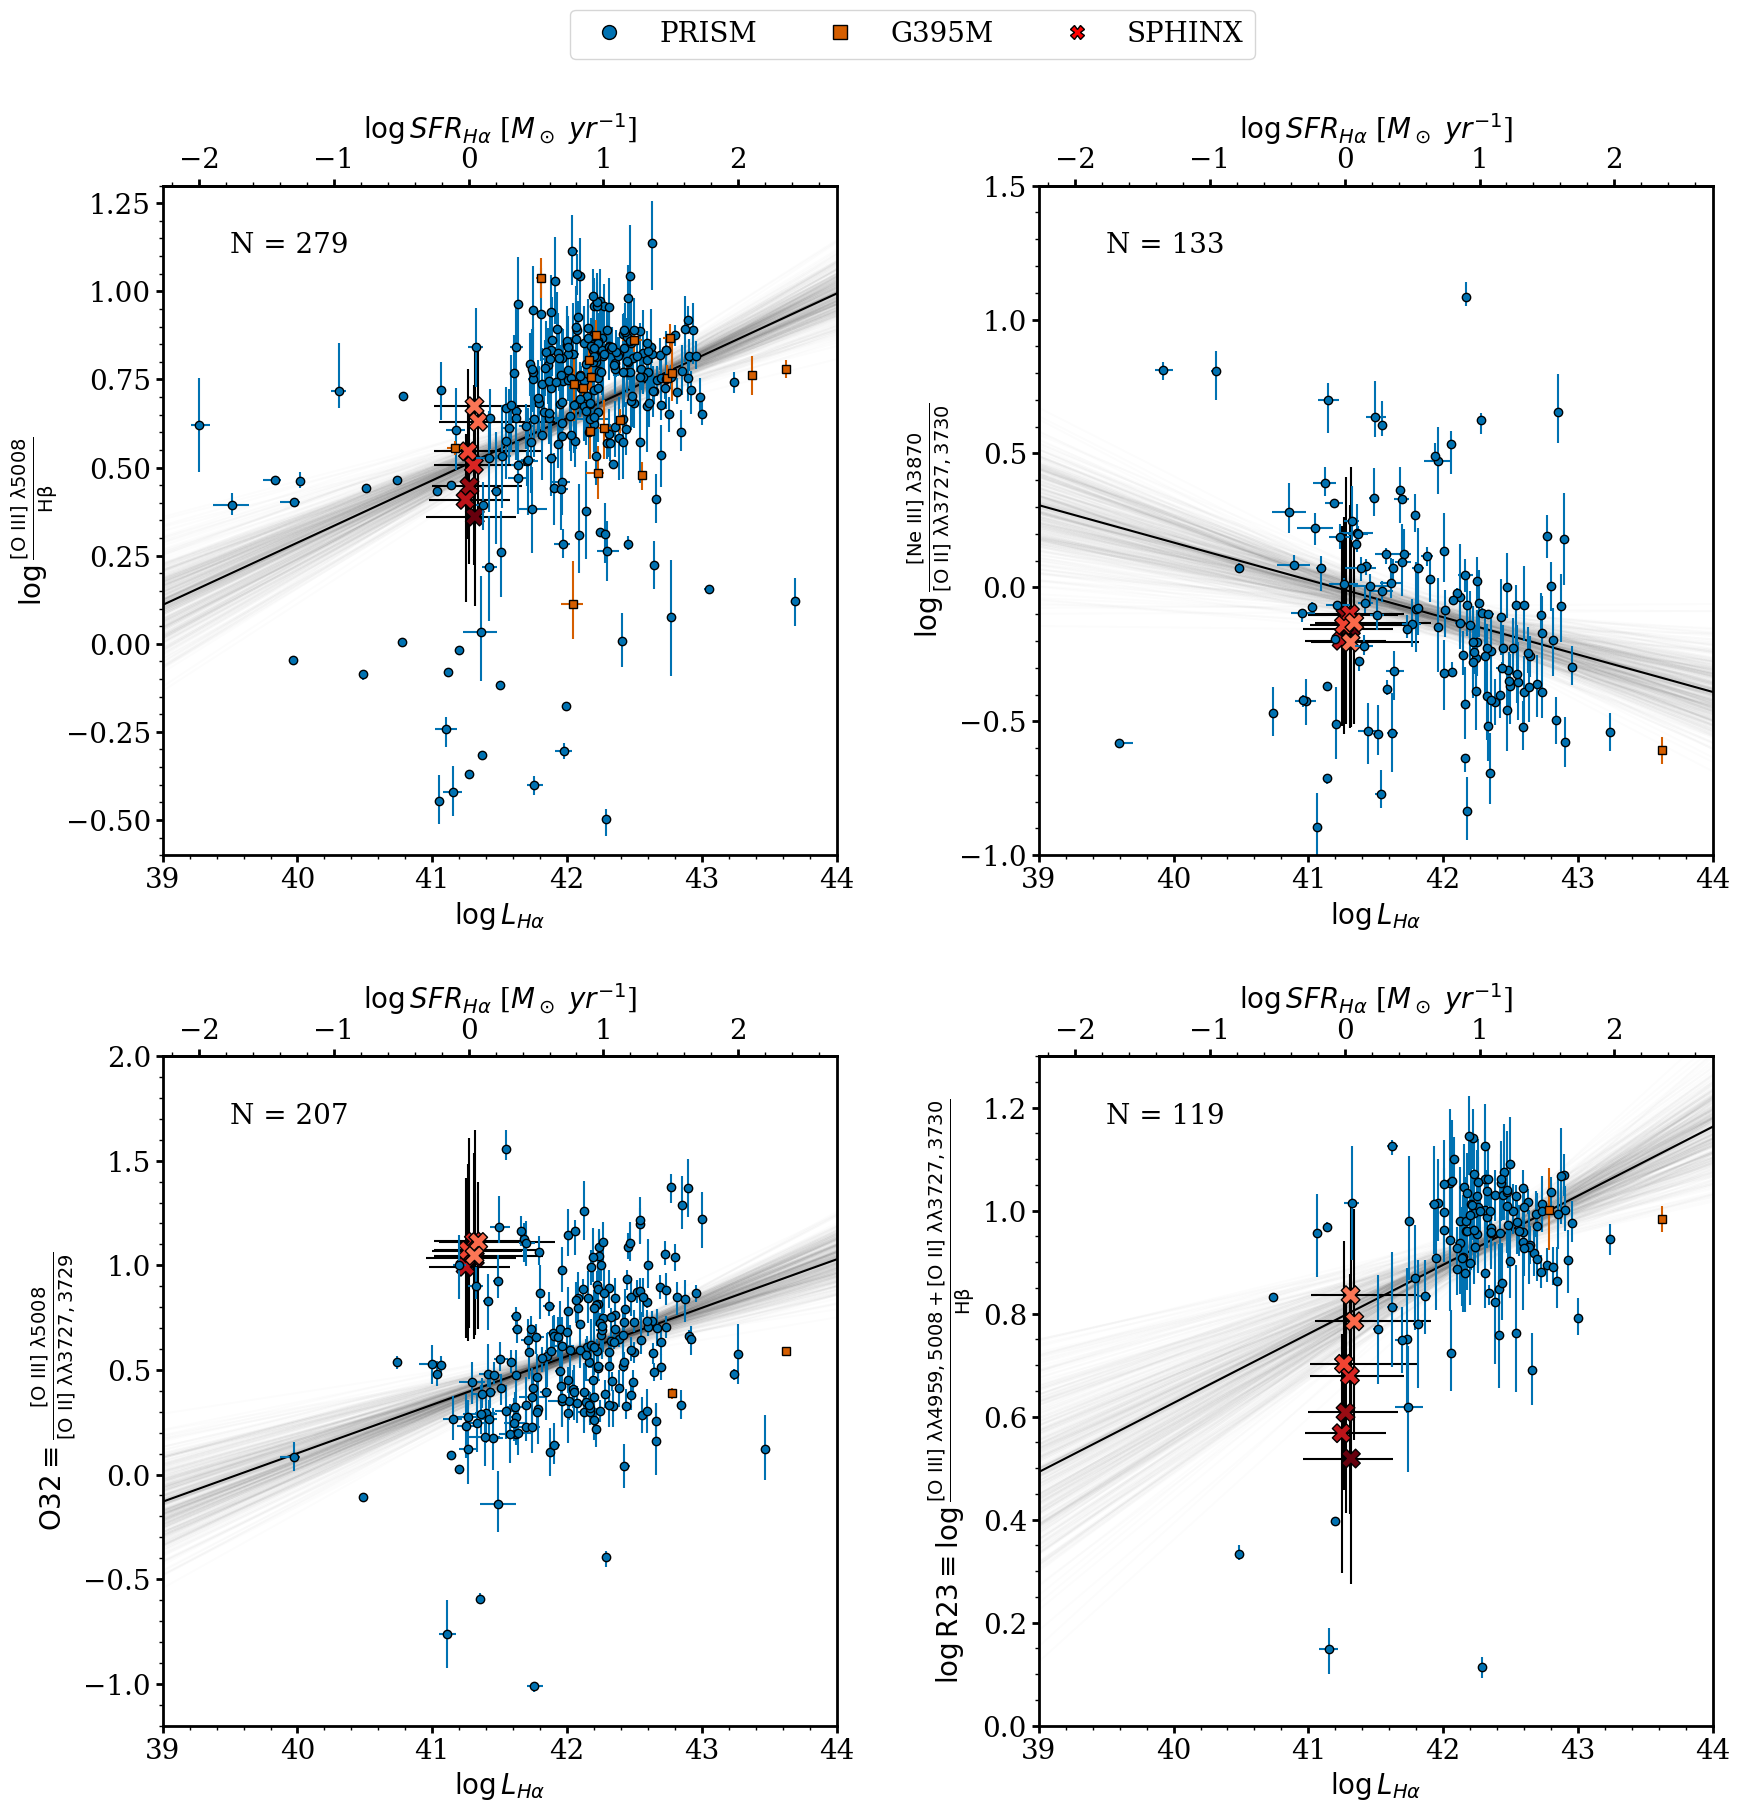

In [7]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
from astropy.table import Table
from nikkos_tools import stat_functions as sf
import data_management
import linmix_fits
import globals

line_fluxes = pd.read_csv(globals.RUBIES_DATA.joinpath('line_flux_df.csv'), index_col=0)
line_fluxes_prism = data_management.make_df_prism(line_fluxes)
line_fluxes_g395m = data_management.make_df_g395m(line_fluxes)

O32Hadf_prism = data_management.signal_to_noise_O32Ha_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
O32Hadf_g395m = data_management.signal_to_noise_O32Ha_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
O32Hadf_both = pd.merge(O32Hadf_prism, O32Hadf_g395m, on='id', how='inner')

R23Hadf_prism = data_management.signal_to_noise_R23Ha_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
R23Hadf_g395m = data_management.signal_to_noise_R23Ha_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
R23Hadf_both = pd.merge(R23Hadf_prism, R23Hadf_g395m, on='id', how='inner')

O3HbHadf_prism = data_management.signal_to_noise_O3HbHa_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
O3HbHadf_g395m = data_management.signal_to_noise_O3HbHa_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
O3HbHadf_both = pd.merge(O3HbHadf_prism, O3HbHadf_g395m, on='id', how='inner')

Ne3O2Hadf_prism = data_management.signal_to_noise_Ne3O2Ha_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
Ne3O2Hadf_g395m = data_management.signal_to_noise_Ne3O2Ha_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
Ne3O2Hadf_both = pd.merge(Ne3O2Hadf_prism, Ne3O2Hadf_g395m, on='id', how='inner')

sphinxdf = data_management.make_sphinx_df(globals.SPHINX_DATA)
sphinx_binned = data_management.make_sphinx_binned_df(sphinxdf)

def plot_OIIIHb_versus_Ha(ax):
    chain = linmix_fits.fit_OIIIHb_versus_Ha_linmix()
    linmix_fits.plot_linmix(ax, chain, 39, 44)
    ax.errorbar(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_OIII_Hb_sphinx, 
                xerr=[sphinx_binned.log_LHa_sphinx_16, sphinx_binned.log_LHa_sphinx_84], 
                yerr=[sphinx_binned.log_OIII_Hb_sphinx_16, sphinx_binned.log_OIII_Hb_sphinx_84], 
                ls='None', c='k', zorder=-9, label='SPHINX')
    ax.scatter(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_OIII_Hb_sphinx, 
                s=180, marker='X', ec='k', c=sphinx_binned.redshift, cmap='Reds', vmin=0, vmax=10, zorder=-9, label='SPHINX')
    # ax.scatter(np.log10(sphinxdf["H__1_6562.80A_int"]), sphinxdf.log_OIII_Hb, marker='h', c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=np.log10(O3HbHadf_prism.L_Ha), y=np.log10(O3HbHadf_prism.OIII_Hb), 
            xerr=[sf.propagate_uncertainty_log10(O3HbHadf_prism.L_Ha,O3HbHadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_prism.L_Ha,O3HbHadf_prism.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(O3HbHadf_prism.OIII_Hb,O3HbHadf_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_prism.OIII_Hb,O3HbHadf_prism.OIII_Hb_ERR_84)],
            ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=np.log10(O3HbHadf_g395m.L_Ha), y=np.log10(O3HbHadf_g395m.OIII_Hb), 
                xerr=[sf.propagate_uncertainty_log10(O3HbHadf_g395m.L_Ha,O3HbHadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_g395m.L_Ha,O3HbHadf_g395m.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(O3HbHadf_g395m.OIII_Hb,O3HbHadf_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_g395m.OIII_Hb,O3HbHadf_g395m.OIII_Hb_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.annotate(f'N = {len(O3HbHadf_prism)+len(O3HbHadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log L_{H\alpha}$')
    ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
    secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
    secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
    ax.axis([39, 44, -0.6, 1.3])

def plot_NeIIIOII_versus_Ha(ax):
    chain = linmix_fits.fit_NeIIIOII_versus_Ha_linmix()
    linmix_fits.plot_linmix(ax, chain, 39, 44)
    ax.errorbar(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_NeIII_OII_sphinx, 
                xerr=[sphinx_binned.log_LHa_sphinx_16, sphinx_binned.log_LHa_sphinx_84], 
                yerr=[sphinx_binned.log_NeIII_OII_sphinx_16, sphinx_binned.log_NeIII_OII_sphinx_84], 
                ls='None', c='k', zorder=-9, label='SPHINX')
    ax.scatter(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_NeIII_OII_sphinx, 
                s=180, marker='X', ec='k', c=sphinx_binned.redshift, cmap='Reds', vmin=0, vmax=10, zorder=-9, label='SPHINX')
    # ax.scatter(np.log10(sphinxdf["H__1_6562.80A_int"]), sphinxdf.log_NeIII_OII, marker='h', c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=np.log10(Ne3O2Hadf_prism.L_Ha), y=np.log10(Ne3O2Hadf_prism.NeIII_OII), 
                xerr=[sf.propagate_uncertainty_log10(Ne3O2Hadf_prism.L_Ha,Ne3O2Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(Ne3O2Hadf_prism.L_Ha,Ne3O2Hadf_prism.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2Hadf_prism.NeIII_OII,Ne3O2Hadf_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2Hadf_prism.NeIII_OII,Ne3O2Hadf_prism.NeIII_OII_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=np.log10(Ne3O2Hadf_g395m.L_Ha), y=np.log10(Ne3O2Hadf_g395m.NeIII_OII), 
                xerr=[sf.propagate_uncertainty_log10(Ne3O2Hadf_g395m.L_Ha,Ne3O2Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(Ne3O2Hadf_g395m.L_Ha,Ne3O2Hadf_g395m.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2Hadf_g395m.NeIII_OII,Ne3O2Hadf_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2Hadf_g395m.NeIII_OII,Ne3O2Hadf_g395m.NeIII_OII_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')
    ax.annotate(f'N = {len(Ne3O2Hadf_prism)+len(Ne3O2Hadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log L_{H\alpha}$')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
    secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
    ax.axis([39, 44, -1, 1.5])

def plot_O32_versus_Ha(ax):
    chain = linmix_fits.fit_O32_versus_Ha_linmix()
    linmix_fits.plot_linmix(ax, chain, 39, 44)
    ax.errorbar(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_O32_sphinx, 
                xerr=[sphinx_binned.log_LHa_sphinx_16, sphinx_binned.log_LHa_sphinx_84], 
                yerr=[sphinx_binned.log_O32_sphinx_16, sphinx_binned.log_O32_sphinx_84], 
                ls='None', c='k', zorder=-9, label='SPHINX')
    ax.scatter(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_O32_sphinx, 
                s=180, marker='X', ec='k', c=sphinx_binned.redshift, cmap='Reds', vmin=0, vmax=10, zorder=-9, label='SPHINX')
    # ax.scatter(np.log10(sphinxdf["H__1_6562.80A_int"]), sphinxdf.log_O32, marker='h', c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=np.log10(O32Hadf_prism.L_Ha), y=np.log10(O32Hadf_prism.O32), 
            xerr=[sf.propagate_uncertainty_log10(O32Hadf_prism.L_Ha,O32Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_prism.L_Ha,O32Hadf_prism.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(O32Hadf_prism.O32,O32Hadf_prism.O32_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_prism.O32,O32Hadf_prism.O32_ERR_84)],
            ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=np.log10(O32Hadf_g395m.L_Ha), y=np.log10(O32Hadf_g395m.O32), 
                xerr=[sf.propagate_uncertainty_log10(O32Hadf_g395m.L_Ha,O32Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_g395m.L_Ha,O32Hadf_g395m.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(O32Hadf_g395m.O32,O32Hadf_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_g395m.O32,O32Hadf_g395m.O32_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')
    ax.annotate(f'N = {len(O32Hadf_prism)+len(O32Hadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log L_{H\alpha}$')
    ax.set_ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3729}$')
    secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
    secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
    ax.axis([39, 44, -1.2, 2])

def plot_R23_versus_Ha(ax):
    chain = linmix_fits.fit_R23_versus_Ha_linmix()
    linmix_fits.plot_linmix(ax, chain, 39, 44)
    ax.errorbar(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_R23_sphinx, 
                xerr=[sphinx_binned.log_LHa_sphinx_16, sphinx_binned.log_LHa_sphinx_84], 
                yerr=[sphinx_binned.log_R23_sphinx_16, sphinx_binned.log_R23_sphinx_84], 
                ls='None', c='k', zorder=-9, label='SPHINX')
    ax.scatter(x=sphinx_binned.log_LHa_sphinx, y=sphinx_binned.log_R23_sphinx, 
                s=180, marker='X', ec='k', c=sphinx_binned.redshift, cmap='Reds', vmin=0, vmax=10, zorder=-9, label='SPHINX')
    
    # ax.scatter(np.log10(sphinxdf["H__1_6562.80A_int"]), sphinxdf.log_R23, marker='h', c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=np.log10(R23Hadf_prism.L_Ha), y=np.log10(R23Hadf_prism.R23), 
            xerr=[sf.propagate_uncertainty_log10(R23Hadf_prism.L_Ha,R23Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_prism.L_Ha,R23Hadf_prism.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(R23Hadf_prism.R23,R23Hadf_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_prism.R23,R23Hadf_prism.R23_ERR_84)],
            ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=np.log10(R23Hadf_g395m.L_Ha), y=np.log10(R23Hadf_g395m.R23), 
                xerr=[sf.propagate_uncertainty_log10(R23Hadf_g395m.L_Ha,R23Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_g395m.L_Ha,R23Hadf_g395m.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(R23Hadf_g395m.R23,R23Hadf_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_g395m.R23,R23Hadf_g395m.R23_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')
    ax.annotate(f'N = {len(R23Hadf_prism)+len(R23Hadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log L_{H\alpha}$')
    ax.set_ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4959,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')
    secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
    secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
    ax.axis([39, 44, 0, 1.3])

def generate_legend_elements_ratios_versus_Ha():
    legend_elements = [
                #    Line2D([1], [1], color='k', alpha=0.3, label='Backhaus+2024', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor=globals.PRISM_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor=globals.G395M_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='X', color='none', label='SPHINX', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

def make_ratios_versus_Ha_plot():
    fig = plt.figure(figsize=(20,20))
    gs = GridSpec(nrows=2, ncols=2)
    gs.update(wspace=0.3, hspace=0.3)

    ax0 = fig.add_subplot(gs[0:1, 0:1])
    plot_OIIIHb_versus_Ha(ax=ax0)

    ax1 = fig.add_subplot(gs[0:1, 1:2])
    plot_NeIIIOII_versus_Ha(ax=ax1)

    ax2 = fig.add_subplot(gs[1:2, 0:1])
    plot_O32_versus_Ha(ax=ax2)

    ax3 = fig.add_subplot(gs[1:2, 1:2])
    plot_R23_versus_Ha(ax=ax3)

    legend_elements = generate_legend_elements_ratios_versus_Ha()     
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

    plt.savefig(globals.FIGURES.joinpath('ratios_ha.pdf'))

if __name__ == "__main__":
   make_ratios_versus_Ha_plot()

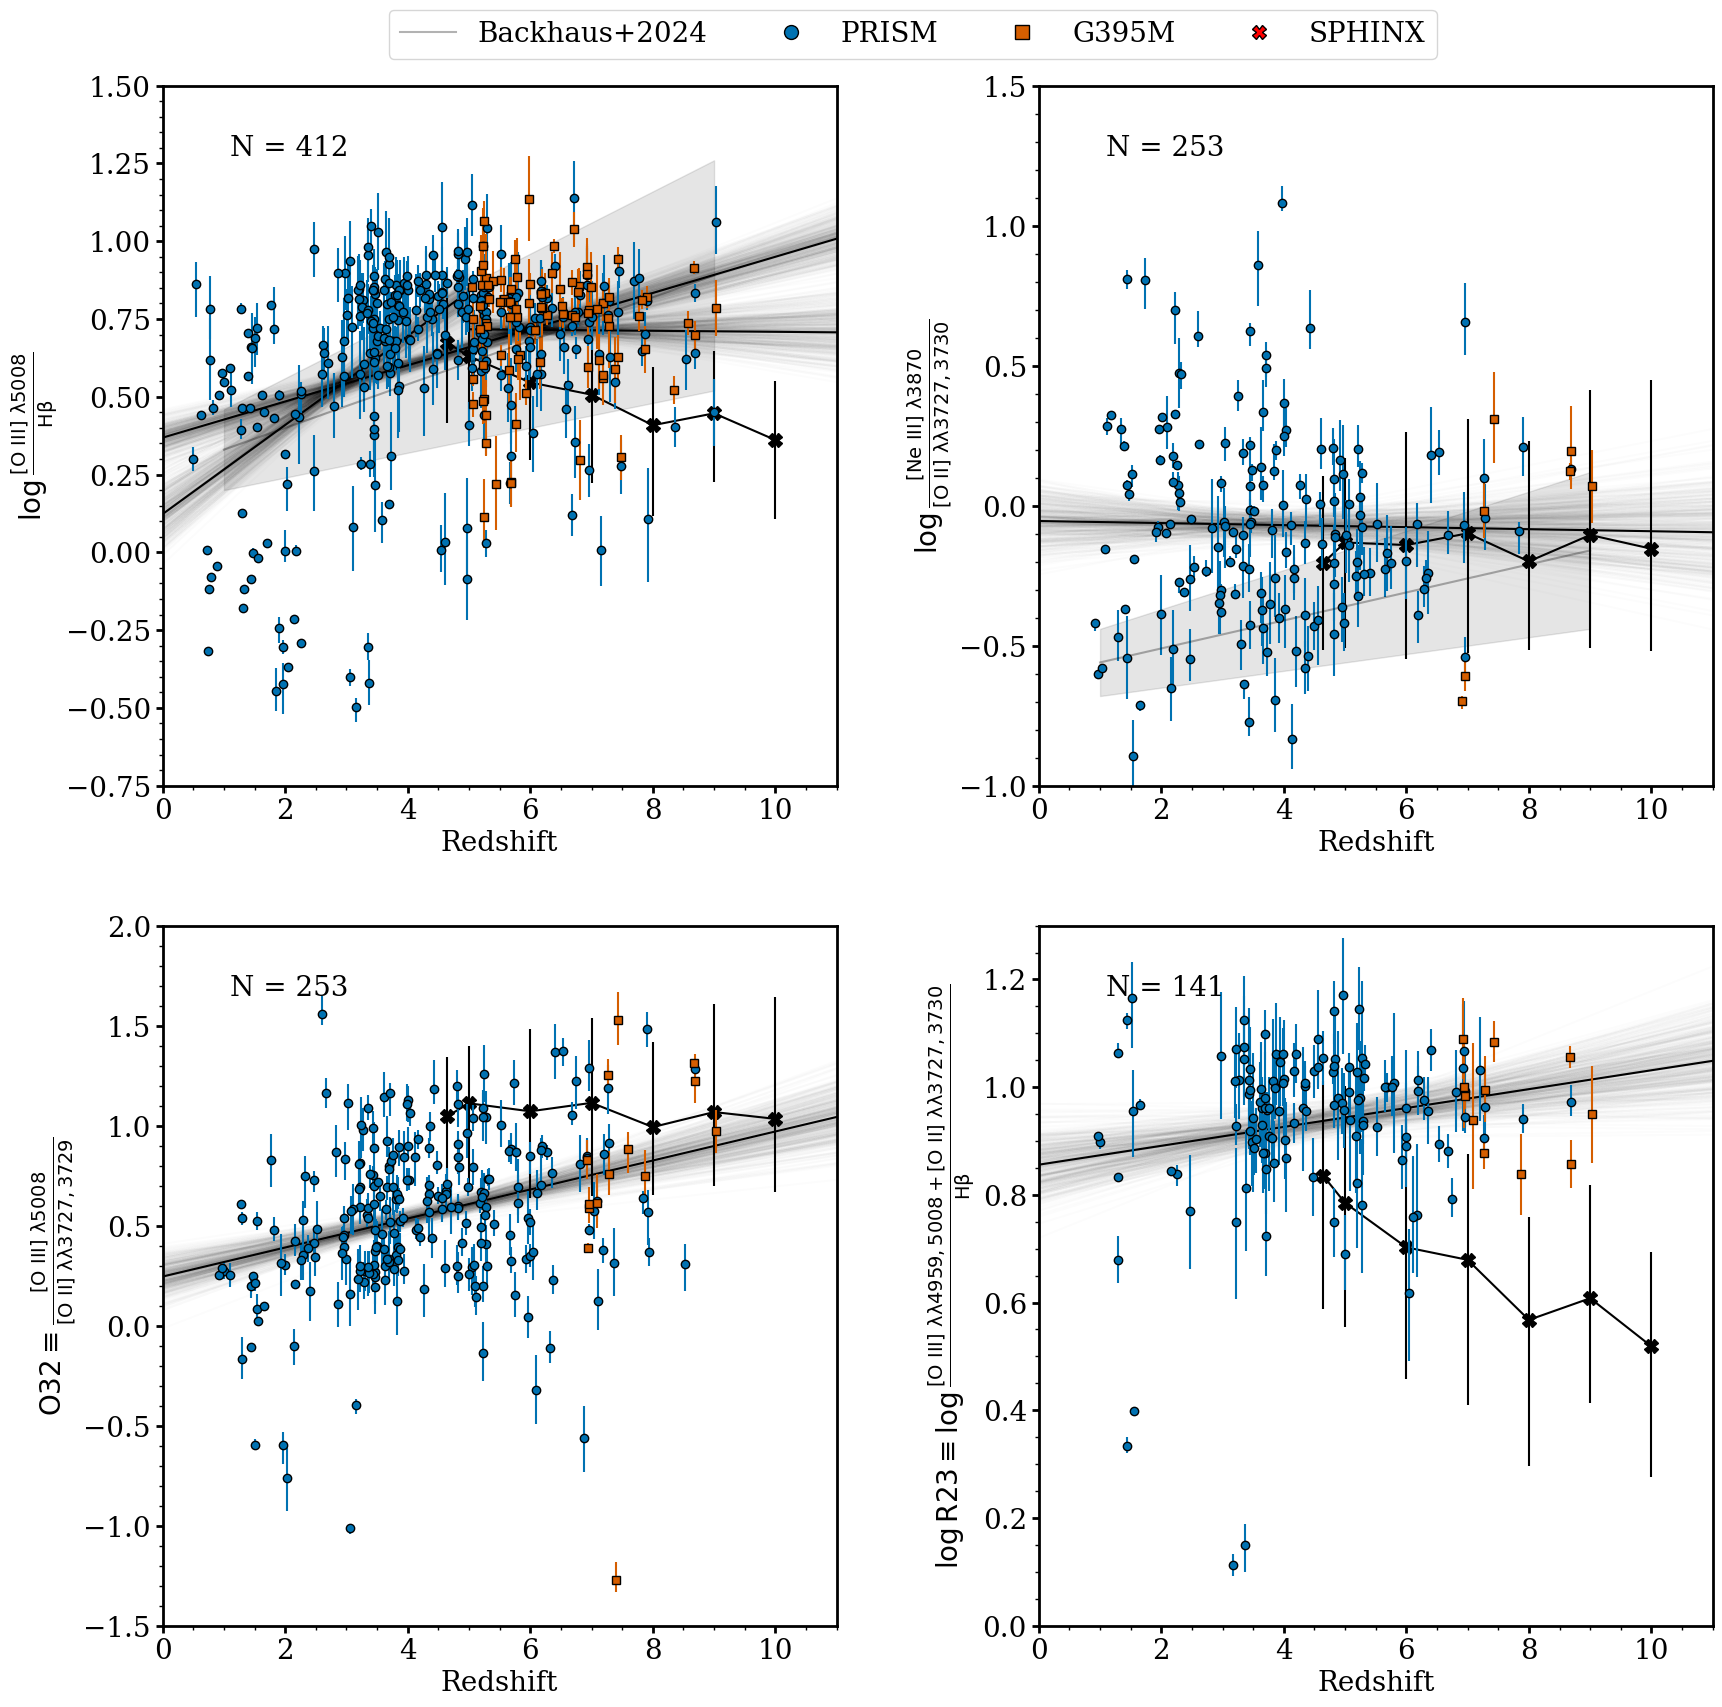

In [9]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
from astropy.table import Table
import linmix
import linmix_fits
from nikkos_tools import stat_functions as sf
import data_management
import globals

SPHINX_DATA = Path('/Users/njc5787/Research/SPHINX-20-data/data').resolve()
RUBIES_DATA = Path('../data').resolve()
FIGURES = Path('./figures').resolve()

COLORS = ['#CC79A7', '#D55E00', '#0072B2', '#56B4E9', '#009E73', '#E69F00', '#000000', '#F0E442',]
globals.PRISM_COLOR = COLORS[2]
globals.G395M_COLOR = COLORS[1]

line_fluxes = pd.read_csv(globals.RUBIES_DATA.joinpath('line_flux_df.csv'), index_col=0)
line_fluxes_prism = data_management.make_df_prism(line_fluxes)
line_fluxes_g395m = data_management.make_df_g395m(line_fluxes)

O32df_prism = data_management.signal_to_noise_O32_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
O32df_g395m = data_management.signal_to_noise_O32_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
O32df_both = pd.merge(O32df_prism, O32df_g395m, on='id', how='inner')

R23df_prism = data_management.signal_to_noise_R23_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
R23df_g395m = data_management.signal_to_noise_R23_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
R23df_both = pd.merge(R23df_prism, R23df_g395m, on='id', how='inner')

O3Hbdf_prism = data_management.signal_to_noise_O3Hb_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
O3Hbdf_g395m = data_management.signal_to_noise_O3Hb_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
O3Hbdf_both = pd.merge(O3Hbdf_prism, O3Hbdf_g395m, on='id', how='inner')

Ne3O2df_prism = data_management.signal_to_noise_Ne3O2_prism(line_fluxes_prism, globals.LINE_SIGNAL_TO_NOISE)
Ne3O2df_g395m = data_management.signal_to_noise_Ne3O2_g395m(line_fluxes_g395m, globals.LINE_SIGNAL_TO_NOISE)
Ne3O2df_both = pd.merge(Ne3O2df_prism, Ne3O2df_g395m, on='id', how='inner')


sphinxdf = data_management.make_sphinx_df(globals.SPHINX_DATA)
sphinx_binned = data_management.make_sphinx_binned_df(sphinxdf)

def plot_OIIIHb_versus_redshift(ax):
    chain = linmix_fits.fit_OIIIHb_versus_redshift_linmix()
    chain_z05 = linmix_fits.fit_OIIIHb_versus_redshift_less_than_5_linmix()
    chain_z5plus = linmix_fits.fit_OIIIHb_versus_redshift_greater_than_5_linmix()
    linmix_fits.plot_linmix(ax,chain,0,11)
    linmix_fits.plot_linmix(ax,chain_z05,0,5)
    linmix_fits.plot_linmix(ax,chain_z5plus,5,11)

    ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_OIII_Hb_sphinx, 
                yerr=[sphinx_binned.log_OIII_Hb_sphinx_16, sphinx_binned.log_OIII_Hb_sphinx_84], 
                ms=10, marker='X', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=O3Hbdf_prism.z_prism, y=np.log10(O3Hbdf_prism.OIII_Hb), 
                yerr=[sf.propagate_uncertainty_log10(O3Hbdf_prism.OIII_Hb,O3Hbdf_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_prism.OIII_Hb,O3Hbdf_prism.OIII_Hb_ERR_84)], 
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=O3Hbdf_g395m.z_g395m, y=np.log10(O3Hbdf_g395m.OIII_Hb), 
                yerr=[sf.propagate_uncertainty_log10(O3Hbdf_g395m.OIII_Hb,O3Hbdf_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_g395m.OIII_Hb,O3Hbdf_g395m.OIII_Hb_ERR_84)], 
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')
    z = np.linspace(1,9,1000)
    ax.fill_between(z, 0.04*z + 0.16, 0.10*z + 0.36, color='k', alpha=0.1)
    ax.plot(z, 0.07*z + 0.26, color='k', alpha=0.3, label='Backhaus+2024')
    ax.annotate(f'N = {len(O3Hbdf_prism)+len(O3Hbdf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
    ax.axis([0, 11, -0.75, 1.5])

def plot_NeIIIOII_versus_redshift(ax):
    chain = linmix_fits.fit_NeIIIOII_versus_redshift_linmix()
    linmix_fits.plot_linmix(ax,chain,0,11)

    ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_NeIII_OII_sphinx, 
                yerr=[sphinx_binned.log_NeIII_OII_sphinx_16, sphinx_binned.log_NeIII_OII_sphinx_84], 
                ms=10, marker='X', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=Ne3O2df_prism.z_prism, y=np.log10(Ne3O2df_prism.NeIII_OII), 
             yerr=[sf.propagate_uncertainty_log10(Ne3O2df_prism.NeIII_OII, Ne3O2df_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_prism.NeIII_OII, Ne3O2df_prism.NeIII_OII_ERR_84)], 
             ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=Ne3O2df_g395m.z_g395m, y=np.log10(Ne3O2df_g395m.NeIII_OII), 
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_g395m.NeIII_OII, Ne3O2df_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_g395m.NeIII_OII, Ne3O2df_g395m.NeIII_OII_ERR_84)], 
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')
    z = np.linspace(1,9,1000)
    ax.fill_between(z, 0.03*z - 0.71, 0.07*z - 0.51, color='k', alpha=0.1)
    ax.plot(z, 0.05*z - 0.61, color='k', alpha=0.3, label='Backhaus+2024')
    ax.annotate(f'N = {len(O32df_prism)+len(O32df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    ax.axis([0, 11, -1, 1.5])

def plot_O32_versus_redshift(ax):
    chain = linmix_fits.fit_O32_versus_redshift_linmix()
    linmix_fits.plot_linmix(ax,chain,0,11)


    ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_O32_sphinx, 
                yerr=[sphinx_binned.log_O32_sphinx_16, sphinx_binned.log_O32_sphinx_84], 
                ms=10, marker='X', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=O32df_prism.z_prism, y=np.log10(O32df_prism.O32), 
                yerr=[sf.propagate_uncertainty_log10(O32df_prism.O32,O32df_prism.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_prism.O32,O32df_prism.O32_ERR_84)], 
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=O32df_g395m.z_g395m, y=np.log10(O32df_g395m.O32), 
                yerr=[sf.propagate_uncertainty_log10(O32df_g395m.O32,O32df_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_g395m.O32,O32df_g395m.O32_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')
    ax.annotate(f'N = {len(O32df_prism)+len(O32df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    ax.axis([0, 11, -1.5, 2])

def plot_R23_versus_redshift(ax):
    chain = linmix_fits.fit_R23_versus_redshift_linmix()
    linmix_fits.plot_linmix(ax,chain,0,11)

    ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_R23_sphinx, 
                yerr=[sphinx_binned.log_R23_sphinx_16, sphinx_binned.log_R23_sphinx_84], 
                ms=10, marker='X', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=R23df_prism.z_prism, y=np.log10(R23df_prism.R23), 
                yerr=[sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_84)], 
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', zorder=-1, label='PRISM')
    ax.errorbar(x=R23df_g395m.z_g395m, y=np.log10(R23df_g395m.R23), 
                yerr=[sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_84)], 
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', zorder=-1, label='G395M')
    ax.annotate(f'N = {len(R23df_prism)+len(R23df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4960,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')
    ax.axis([0, 11, 0, 1.3])

def generate_legend_elements_ratios_versus_redshift():
    legend_elements = [
                   Line2D([1], [1], color='k', alpha=0.3, label='Backhaus+2024', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor=globals.PRISM_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor=globals.G395M_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='X', color='none', label='SPHINX', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

def make_ratios_versus_redshift_plot():
    fig = plt.figure(figsize=(20,20))
    gs = GridSpec(nrows=2, ncols=2)
    gs.update(wspace=0.3, hspace=0.2)

    ax0 = fig.add_subplot(gs[0:1, 0:1])
    plot_OIIIHb_versus_redshift(ax=ax0)

    ax1 = fig.add_subplot(gs[0:1, 1:2])
    plot_NeIIIOII_versus_redshift(ax=ax1)

    ax2 = fig.add_subplot(gs[1:2, 0:1])
    plot_O32_versus_redshift(ax=ax2)

    ax3 = fig.add_subplot(gs[1:2, 1:2])
    plot_R23_versus_redshift(ax=ax3)

    legend_elements = generate_legend_elements_ratios_versus_redshift()     
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.925), facecolor='white', ncol=4, fontsize=20)

    plt.savefig(globals.FIGURES.joinpath('ratios_z.pdf'))


if __name__ == "__main__":
   make_ratios_versus_redshift_plot()

In [4]:
SIISIIdf_prism = data_management.signal_to_noise_6717_6731_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
SIISIIdf_g395m = data_management.signal_to_noise_6717_6731_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
SIISIIdf_both = pd.merge(SIISIIdf_prism, SIISIIdf_g395m, on='id', how='inner')


In [5]:
def plot_SIISII_versus_redshift(ax):
    # chain = linmix_fits.fit_NeIIIOII_versus_redshift_linmix()
    # linmix_fits.plot_linmix(ax,chain,0,11)

    # ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_NeIII_OII_sphinx, 
    #             yerr=[sphinx_binned.log_NeIII_OII_sphinx_16, sphinx_binned.log_NeIII_OII_sphinx_84], 
    #             ms=10, marker='X', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=SIISIIdf_prism.z_prism, y=SIISIIdf_prism.SII_SII_6717_6731, 
             yerr=[SIISIIdf_prism.SII_SII_6717_6731_ERR_16, SIISIIdf_prism.SII_SII_6717_6731_ERR_84], 
             ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=SIISIIdf_g395m.z_g395m, y=SIISIIdf_g395m.SII_SII_6717_6731, 
             yerr=[SIISIIdf_g395m.SII_SII_6717_6731_ERR_16, SIISIIdf_g395m.SII_SII_6717_6731_ERR_84], 
             ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.annotate(f'N = {len(SIISIIdf_prism)+len(SIISIIdf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\frac{\rm{[S~II]}~\lambda6717}{\rm{[S~II]}~\lambda6731}$')
    ax.axis([0, 11, 0, 1.6])

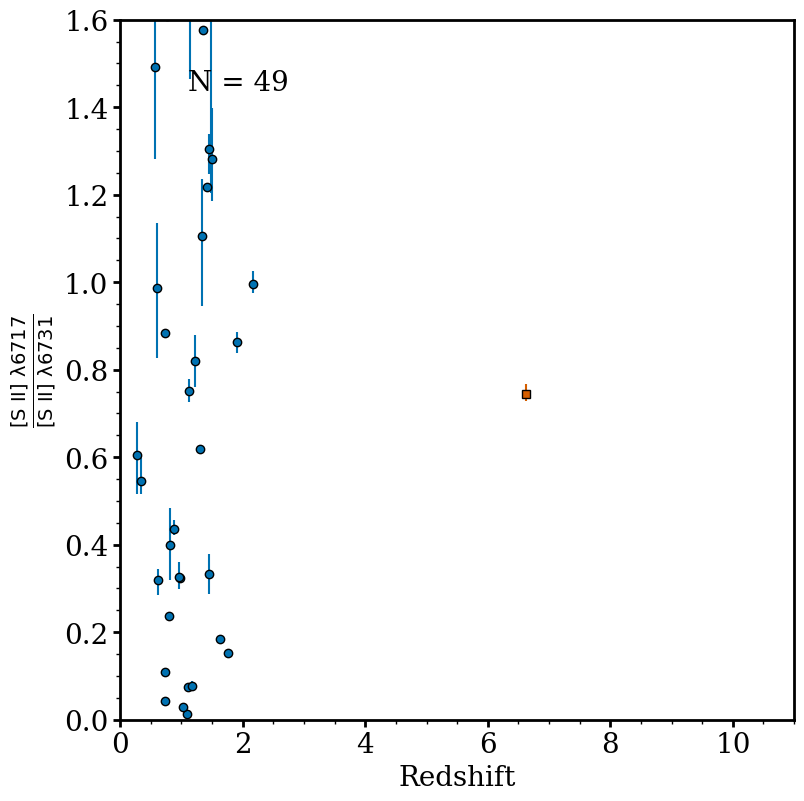

In [6]:
from matplotlib.gridspec import GridSpec
import globals
fig = plt.figure(figsize=(20,20))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.3, hspace=0.2)

ax0 = fig.add_subplot(gs[0:1, 0:1])
plot_SIISII_versus_redshift(ax0)
plt.savefig(globals.FIGURES.joinpath('siisii_z.pdf'))

(array([15.,  9.,  7.,  3.,  2.,  1.,  0.,  0.,  0.,  2.]),
 array([0.02886385, 0.59416663, 1.15946942, 1.72477221, 2.29007499,
        2.85537778, 3.42068057, 3.98598335, 4.55128614, 5.11658893,
        5.68189171]),
 <BarContainer object of 10 artists>)

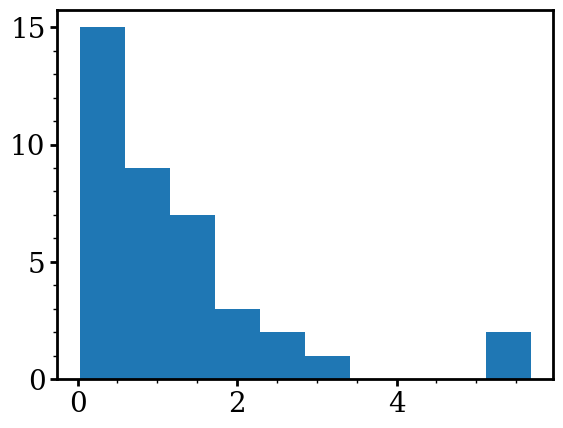

In [24]:
plt.hist(SIISIIdf_prism.SII_SII_6717_6731)

In [78]:
from astropy import units as u
from astropy import table
from astropy.io import ascii
from astropy.table import Table
from astroquery.xmatch import XMatch
from astropy import coordinates
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec


RUBIES_DATA = Path('../data').resolve()
egs_photometry = list(RUBIES_DATA.glob('egs*sps*.fits'))
egs_photometrydf = Table.read(egs_photometry[0], format='fits')

uds_photometry = list(RUBIES_DATA.glob('uds*sps*.fits'))
uds_photometrydf = Table.read(uds_photometry[0], format='fits')

photometry = table.vstack([uds_photometrydf, egs_photometrydf])

line_fluxes = Table.from_pandas(pd.read_csv(RUBIES_DATA.joinpath('line_flux_df.csv'), index_col=0))

c_phot = SkyCoord(photometry['ra'], photometry['dec'], unit='deg')
c_line = SkyCoord(line_fluxes['ra'], line_fluxes['dec'], unit='deg')

idx, sep2d, dist3d = coordinates.match_coordinates_sky(c_phot, c_line)

line_fluxes = line_fluxes[idx].to_pandas()
line_fluxes['sep2d'] = sep2d.to_value()
line_fluxes['idx'] = idx
line_fluxes = line_fluxes[line_fluxes['sep2d'] < 0.0001]

photometrydf = photometry.to_pandas()
photometrydf['sep2d'] = sep2d.to_value()
photometrydf['idx'] = idx
photometrydf = photometrydf[photometrydf.sep2d < 0.0001]
photometrydf = photometrydf.add_suffix('_photcat')

line_fluxes
# idx

Unnamed: 0      id   z_prism   z_g395m  z_prism_p16  z_prism_p84  \
0           143    9407  4.823805  4.870412     4.822864     4.825003   
1           158   10230  2.998668       NaN     2.997611     2.999653   
2           165   11298  1.991321       NaN     1.989014     2.000555   
3           174   11917  2.594927       NaN     2.593674     2.596804   
4           189   12878  3.307137       NaN     3.306429     3.307904   
..          ...     ...       ...       ...          ...          ...   
919        3612  975193  6.990972  6.972622     6.990587     6.991392   
920        3622  978590  7.762505  7.722525     7.761422     7.763803   
921        3624  980841  8.693971  8.687764     8.693591     8.694390   
922        3626  986615  6.504203  6.521495     6.503798     6.504668   
923        3628  986719  6.671703  6.696446     6.670988     6.672444   

     z_g395m_p16  z_g395m_p84  msaexp_OIII5007_prism  msaexp_e_OIII5007_prism  \
0       4.870398     4.870419                    NaN                      NaN   
1            NaN          NaN                    NaN                      NaN   
2            NaN          NaN                    NaN                      NaN   
3            NaN          NaN                    NaN                      NaN   
4            NaN          NaN                    NaN                      NaN   
..           ...          ...                    ...                      ...   
919     6.968118     6.974172                    NaN                      NaN   
920     7.722509     7.722533                    NaN                      NaN   
921     8.687675     8.687860                    NaN                      NaN   
922     6.518584     6.524092                    NaN                      NaN   
923     6.695982     6.699267                    NaN                      NaN   

     ...  metal_sigma_prism  metal_sigma_g395m  metal_alpha_prism  \
0    ...           0.168349                NaN          -0.001415   
1    ...                NaN                NaN                NaN   
2    ...                NaN                NaN                NaN   
3    ...                NaN                NaN                NaN   
4    ...                NaN                NaN                NaN   
..   ...                ...                ...                ...   
919  ...                NaN                NaN                NaN   
920  ...                NaN                NaN                NaN   
921  ...                NaN                NaN                NaN   
922  ...                NaN                NaN                NaN   
923  ...                NaN                NaN                NaN   

     metal_alpha_g395m  metal_resid_prism  metal_resid_g395m  av_prism  \
0                  NaN           1.221767                NaN       NaN   
1                  NaN                NaN                NaN       NaN   
2                  NaN                NaN                NaN       NaN   
3                  NaN                NaN                NaN       NaN   
4                  NaN                NaN                NaN       NaN   
..                 ...                ...                ...       ...   
919                NaN                NaN                NaN       NaN   
920                NaN                NaN                NaN       NaN   
921                NaN                NaN                NaN       NaN   
922                NaN                NaN                NaN       NaN   
923                NaN                NaN                NaN       NaN   

     av_g395m         sep2d   idx  
0         NaN  7.620191e-07    84  
1         NaN  8.707836e-07    93  
2         NaN  3.179352e-07    98  
3         NaN  4.615647e-07   104  
4         NaN  1.492648e-06   114  
..        ...           ...   ...  
919       NaN  3.847683e-07  2098  
920       NaN  1.567246e-07  2103  
921       NaN  5.317512e-07  2104  
922       NaN  3.232895e-07  2105  
923       NaN  4.177519e-07  2106  

[915

In [79]:
photometrydf

id_v70_photcat  id_photcat  ra_photcat  dec_photcat  z_spec_photcat  \
0              9407       12048   34.268650    -5.300197          4.8205   
1             10230       13028   34.268192    -5.298482          2.9983   
2             11298       14286   34.267565    -5.296456          1.9775   
3             11917       15006   34.268266    -5.295208          2.5919   
4             12878       16065   34.267668    -5.293497          3.3072   
..              ...         ...         ...          ...             ...   
919            <NA>      975193  214.967248    52.963630          6.9899   
920            <NA>      978590  214.830660    52.887775          7.7616   
921            <NA>      980841  214.844770    52.892109          8.6937   
922            <NA>      986615  214.950932    52.957040          6.5036   
923            <NA>      986719  214.950365    52.956194          6.6728   

     z_16_photcat  z_50_photcat  z_84_photcat  mtot_16_photcat  \
0        4.808211      4.821995      4.834359         8.287223   
1        2.985262      3.000213      3.012527         8.649932   
2        1.963482      1.977841      1.990637         9.428540   
3        2.580207      2.594355      2.606899         8.632625   
4        3.293568      3.307413      3.320832         7.942530   
..            ...           ...           ...              ...   
919      6.990930      7.001648      7.007428         8.124916   
920      7.747797      7.760693      7.774701         8.987303   
921      8.680703      8.695250      8.707724         9.328617   
922      6.488228      6.499406      6.515163         8.763231   
923      6.657352      6.668256      6.682675         8.884218   

     mtot_50_photcat  ...  VJ_50_photcat  VJ_84_photcat  gi_16_photcat  \
0           8.536438  ...      -0.574349      -0.270404      -0.306682   
1           8.954122  ...       0.124215       0.362703       0.019255   
2           9.607367  ...       0.237173       0.292587       0.155263   
3           9.049919  ...       1.398034       1.559152       0.847416   
4           8.269013  ...      -0.072850       0.178325      -0.058305   
..               ...  ...            ...            ...            ...   
919         8.336600  ...      -1.122922      -0.803765      -0.529217   
920         9.334288  ...       0.861999       1.471908       0.431347   
921         9.623724  ...       0.190751       0.642494       0.063064   
922         9.048732  ...      -0.111038       0.118091      -0.107790   
923         9.138254  ...       0.115168       0.390358      -0.050716   

     gi_50_photcat  gi_84_photcat  ug_16_photcat  ug_50_photcat  \
0        -0.205363      -0.105610       0.105572       0.224472   
1         0.174665       0.479821       0.473379       0.693497   
2         0.191908       0.229979       0.682563       0.760766   
3         1.040939       1.344096       1.042260       1.368338   
4         0.074102       0.229216       0.427790       0.611762   
..             ...            ...            ...            ...   
919      -0.459257      -0.379925      -0.132223      -0.073191   
920       0.710257       1.050598       0.772538       0.956267   
921       0.219559       0.373995       0.349845       0.428431   
922      -0.006101       0.099194       0.397051       0.454037   
923       0.076981       0.218769       0.421009       0.485109   

     ug_84_photcat  sep2d_photcat  idx_photcat  
0         0.338802   7.620191e-07           84  
1         1.102268   8.707836e-07           93  
2         0.844427   3.179352e-07           98  
3         1.931369   4.615647e-07          104  
4         0.832628   1.492648e-06          114  
..             ...            ...          ...  
919      -0.000226   3.847683e-07         2098  
920       1.150985   1.567246e-07         2103  
921       0.510854   5.317512e-07         2104  
922       0.514091   3.232895e-07         2105  
923       0.554430   4.177519e-07         2106  

[915 rows x 82 c

In [43]:
line_fluxes

Unnamed: 0      id   z_prism   z_g395m  z_prism_p16  z_prism_p84  \
0           143    9407  4.823805  4.870412     4.822864     4.825003   
1           158   10230  2.998668       NaN     2.997611     2.999653   
2           165   11298  1.991321       NaN     1.989014     2.000555   
3           174   11917  2.594927       NaN     2.593674     2.596804   
4           189   12878  3.307137       NaN     3.306429     3.307904   
..          ...     ...       ...       ...          ...          ...   
919        3612  975193  6.990972  6.972622     6.990587     6.991392   
920        3622  978590  7.762505  7.722525     7.761422     7.763803   
921        3624  980841  8.693971  8.687764     8.693591     8.694390   
922        3626  986615  6.504203  6.521495     6.503798     6.504668   
923        3628  986719  6.671703  6.696446     6.670988     6.672444   

     z_g395m_p16  z_g395m_p84  msaexp_OIII5007_prism  msaexp_e_OIII5007_prism  \
0       4.870398     4.870419                    NaN                      NaN   
1            NaN          NaN                    NaN                      NaN   
2            NaN          NaN                    NaN                      NaN   
3            NaN          NaN                    NaN                      NaN   
4            NaN          NaN                    NaN                      NaN   
..           ...          ...                    ...                      ...   
919     6.968118     6.974172                    NaN                      NaN   
920     7.722509     7.722533                    NaN                      NaN   
921     8.687675     8.687860                    NaN                      NaN   
922     6.518584     6.524092                    NaN                      NaN   
923     6.695982     6.699267                    NaN                      NaN   

     ...  metal_sigma_prism  metal_sigma_g395m  metal_alpha_prism  \
0    ...           0.168349                NaN          -0.001415   
1    ...                NaN                NaN                NaN   
2    ...                NaN                NaN                NaN   
3    ...                NaN                NaN                NaN   
4    ...                NaN                NaN                NaN   
..   ...                ...                ...                ...   
919  ...                NaN                NaN                NaN   
920  ...                NaN                NaN                NaN   
921  ...                NaN                NaN                NaN   
922  ...                NaN                NaN                NaN   
923  ...                NaN                NaN                NaN   

     metal_alpha_g395m  metal_resid_prism  metal_resid_g395m  av_prism  \
0                  NaN           1.221767                NaN       NaN   
1                  NaN                NaN                NaN       NaN   
2                  NaN                NaN                NaN       NaN   
3                  NaN                NaN                NaN       NaN   
4                  NaN                NaN                NaN       NaN   
..                 ...                ...                ...       ...   
919                NaN                NaN                NaN       NaN   
920                NaN                NaN                NaN       NaN   
921                NaN                NaN                NaN       NaN   
922                NaN                NaN                NaN       NaN   
923                NaN                NaN                NaN       NaN   

     av_g395m         sep2d   idx  
0         NaN  7.620191e-07    84  
1         NaN  8.707836e-07    93  
2         NaN  3.179352e-07    98  
3         NaN  4.615647e-07   104  
4         NaN  1.492648e-06   114  
..        ...           ...   ...  
919       NaN  3.847683e-07  2098  
920       NaN  1.567246e-07  2103  
921       NaN  5.317512e-07  2104  
922       NaN  3.232895e-07  2105  
923       NaN  4.177519e-07  2106  

[924

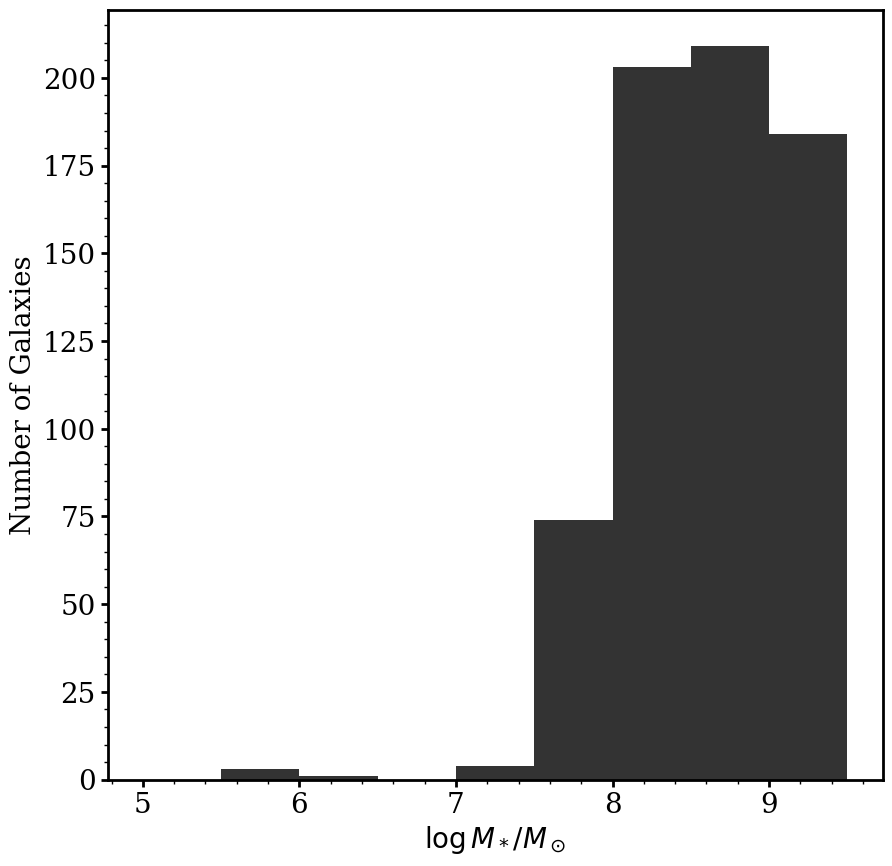

In [17]:
from pathlib import Path
import numpy as np
import pandas as pd
from astropy import table
from astropy.table import Table
from astropy import coordinates
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
from nikkos_tools import stat_functions as sf
from nikkos_tools import ratio_diagnostics as rd
import data_management
import globals
import linmix_fits

rubies_mergeddf = data_management.make_merged_photometry_lines_df()

mstar_prism = data_management.make_df_prism(rubies_mergeddf)
mstar_g395m = data_management.make_df_g395m(rubies_mergeddf)

O3Hbdf_mstar_prism = data_management.signal_to_noise_O3Hb_prism(mstar_prism, globals.LINE_SIGNAL_TO_NOISE)
O3Hbdf_mstar_g395m = data_management.signal_to_noise_O3Hb_g395m(mstar_g395m, globals.LINE_SIGNAL_TO_NOISE)

Ne3O2df_mstar_prism = data_management.signal_to_noise_Ne3O2_prism(mstar_prism, globals.LINE_SIGNAL_TO_NOISE)
Ne3O2df_mstar_g395m = data_management.signal_to_noise_Ne3O2_g395m(mstar_g395m, globals.LINE_SIGNAL_TO_NOISE)

O32df_mstar_prism = data_management.signal_to_noise_O32_prism(mstar_prism, globals.LINE_SIGNAL_TO_NOISE)
O32df_mstar_g395m = data_management.signal_to_noise_O32_g395m(mstar_g395m, globals.LINE_SIGNAL_TO_NOISE)

R23df_mstar_prism = data_management.signal_to_noise_R23_prism(mstar_prism, globals.LINE_SIGNAL_TO_NOISE)
R23df_mstar_g395m = data_management.signal_to_noise_R23_g395m(mstar_g395m, globals.LINE_SIGNAL_TO_NOISE)

bins = np.arange(5,10,0.5)
plt.figure(figsize=(10,10))
plt.hist(rubies_mergeddf.mstar_50_photcat, color='k', alpha=0.8, bins=bins)
# plt.hist(mstar_g395m.mstar_50_photcat, color=globals.G395M_COLOR, alpha=0.5, bins=bins)
plt.xlabel(r'$\log M_*/M_\odot$')
plt.ylabel('Number of Galaxies')
plt.savefig(globals.FIGURES.joinpath('mstarhist.pdf'))
plt.show()

In [18]:
import linmix
def fit_OIIIHb_versus_mstar_linmix():
    x = pd.concat([O3Hbdf_mstar_prism.mstar_50_photcat, O3Hbdf_mstar_g395m.mstar_50_photcat])
    y = pd.concat([np.log10(O3Hbdf_mstar_prism.OIII_Hb), np.log10(O3Hbdf_mstar_g395m.OIII_Hb)])
    # xsig = pd.concat([np.abs((O3Hbdf_mstar_prism.mstar_16_photcat + O3Hbdf_mstar_prism.mstar_84_photcat) - O3Hbdf_mstar_prism.mstar_50_photcat) / 2, 
    #                   np.abs((O3Hbdf_mstar_g395m.mstar_16_photcat + O3Hbdf_mstar_g395m.mstar_84_photcat) - O3Hbdf_mstar_g395m.mstar_50_photcat) / 2])
    ysig = pd.concat([(sf.propagate_uncertainty_log10(O3Hbdf_mstar_prism.OIII_Hb,O3Hbdf_mstar_prism.OIII_Hb_ERR_16) + sf.propagate_uncertainty_log10(O3Hbdf_mstar_prism.OIII_Hb,O3Hbdf_mstar_prism.OIII_Hb_ERR_84)) / 2,
                        (sf.propagate_uncertainty_log10(O3Hbdf_mstar_g395m.OIII_Hb,O3Hbdf_mstar_g395m.OIII_Hb_ERR_16) + sf.propagate_uncertainty_log10(O3Hbdf_mstar_g395m.OIII_Hb,O3Hbdf_mstar_g395m.OIII_Hb_ERR_84)) / 2])
    xsig = np.full(len(x), 0.3)
    lm = linmix.LinMix(x, y, xsig, ysig, K=2)
    lm.run_mcmc(silent=True)

    return lm.chain

def fit_NeIIIOII_versus_mstar_linmix():
    x = pd.concat([Ne3O2df_mstar_prism.mstar_50_photcat, Ne3O2df_mstar_g395m.mstar_50_photcat])
    y = pd.concat([np.log10(Ne3O2df_mstar_prism.NeIII_OII), np.log10(Ne3O2df_mstar_g395m.NeIII_OII)])
    # xsig = pd.concat([np.abs((Ne3O2df_mstar_prism.mstar_16_photcat + Ne3O2df_mstar_prism.mstar_84_photcat) - Ne3O2df_mstar_prism.mstar_50_photcat) / 2, 
    #                   np.abs((Ne3O2df_mstar_g395m.mstar_16_photcat + Ne3O2df_mstar_g395m.mstar_84_photcat) - Ne3O2df_mstar_g395m.mstar_50_photcat) / 2])
    ysig = pd.concat([(sf.propagate_uncertainty_log10(Ne3O2df_mstar_prism.NeIII_OII,Ne3O2df_mstar_prism.NeIII_OII_ERR_16) + sf.propagate_uncertainty_log10(Ne3O2df_mstar_prism.NeIII_OII,Ne3O2df_mstar_prism.NeIII_OII_ERR_84)) / 2,
                        (sf.propagate_uncertainty_log10(Ne3O2df_mstar_g395m.NeIII_OII,Ne3O2df_mstar_g395m.NeIII_OII_ERR_16) + sf.propagate_uncertainty_log10(Ne3O2df_mstar_g395m.NeIII_OII,Ne3O2df_mstar_g395m.NeIII_OII_ERR_84)) / 2])
    xsig = np.full(len(x), 0.3)
    lm = linmix.LinMix(x, y, xsig, ysig, K=2)
    lm.run_mcmc(silent=True)

    return lm.chain

def fit_O32_versus_mstar_linmix():
    x = pd.concat([O32df_mstar_prism.mstar_50_photcat, O32df_mstar_g395m.mstar_50_photcat])
    y = pd.concat([np.log10(O32df_mstar_prism.O32), np.log10(O32df_mstar_g395m.O32)])
    # xsig = pd.concat([np.abs((O32df_mstar_prism.mstar_16_photcat + O32df_mstar_prism.mstar_84_photcat) - O32df_mstar_prism.mstar_50_photcat) / 2, 
    #                   np.abs((O32df_mstar_g395m.mstar_16_photcat + O32df_mstar_g395m.mstar_84_photcat) - O32df_mstar_g395m.mstar_50_photcat) / 2])
    ysig = pd.concat([(sf.propagate_uncertainty_log10(O32df_mstar_prism.O32,O32df_mstar_prism.O32_ERR_16) + sf.propagate_uncertainty_log10(O32df_mstar_prism.O32,O32df_mstar_prism.O32_ERR_84)) / 2,
                        (sf.propagate_uncertainty_log10(O32df_mstar_g395m.O32,O32df_mstar_g395m.O32_ERR_16) + sf.propagate_uncertainty_log10(O32df_mstar_g395m.O32,O32df_mstar_g395m.O32_ERR_84)) / 2])
    xsig = np.full(len(x), 0.3)
    lm = linmix.LinMix(x, y, xsig, ysig, K=2)
    lm.run_mcmc(silent=True)

    return lm.chain

def fit_R23_versus_mstar_linmix():
    x = pd.concat([R23df_mstar_prism.mstar_50_photcat, R23df_mstar_g395m.mstar_50_photcat])
    y = pd.concat([np.log10(R23df_mstar_prism.R23), np.log10(R23df_mstar_g395m.R23)])
    # xsig = pd.concat([np.abs((R23df_mstar_prism.mstar_16_photcat + R23df_mstar_prism.mstar_84_photcat) - R23df_mstar_prism.mstar_50_photcat) / 2, 
    #                   np.abs((R23df_mstar_g395m.mstar_16_photcat + R23df_mstar_g395m.mstar_84_photcat) - R23df_mstar_g395m.mstar_50_photcat) / 2])
    ysig = pd.concat([(sf.propagate_uncertainty_log10(R23df_mstar_prism.R23,R23df_mstar_prism.R23_ERR_16) + sf.propagate_uncertainty_log10(R23df_mstar_prism.R23,R23df_mstar_prism.R23_ERR_84)) / 2,
                        (sf.propagate_uncertainty_log10(R23df_mstar_g395m.R23,R23df_mstar_g395m.R23_ERR_16) + sf.propagate_uncertainty_log10(R23df_mstar_g395m.R23,R23df_mstar_g395m.R23_ERR_84)) / 2])
    xsig = np.full(len(x), 0.3)
    lm = linmix.LinMix(x, y, xsig, ysig, K=2)
    lm.run_mcmc(silent=True)

    return lm.chain

In [19]:
def plot_OIIIHb_versus_mstar(ax):
    chain = fit_OIIIHb_versus_mstar_linmix()
    linmix_fits.plot_linmix(ax, chain, 7, 12)
    ax.errorbar(x=O3Hbdf_mstar_g395m.mstar_50_photcat, y=np.log10(O3Hbdf_mstar_g395m.OIII_Hb), 
            xerr=[np.abs(O3Hbdf_mstar_g395m.mstar_16_photcat - O3Hbdf_mstar_g395m.mstar_50_photcat), np.abs(O3Hbdf_mstar_g395m.mstar_84_photcat - O3Hbdf_mstar_g395m.mstar_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(O3Hbdf_mstar_g395m.OIII_Hb,O3Hbdf_mstar_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_mstar_g395m.OIII_Hb,O3Hbdf_mstar_g395m.OIII_Hb_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=O3Hbdf_mstar_prism.mstar_50_photcat, y=np.log10(O3Hbdf_mstar_prism.OIII_Hb), 
                xerr=[np.abs(O3Hbdf_mstar_prism.mstar_16_photcat - O3Hbdf_mstar_prism.mstar_50_photcat), np.abs(O3Hbdf_mstar_prism.mstar_84_photcat - O3Hbdf_mstar_prism.mstar_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(O3Hbdf_mstar_prism.OIII_Hb,O3Hbdf_mstar_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_mstar_prism.OIII_Hb,O3Hbdf_mstar_prism.OIII_Hb_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(O3Hbdf_mstar_prism) + len(O3Hbdf_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log M_*/M_\odot$')
    ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
    ax.axis([7,12,-1,1.5])

def plot_NeIIIOII_versus_mstar(ax):
    chain = fit_NeIIIOII_versus_mstar_linmix()
    linmix_fits.plot_linmix(ax, chain, 7, 12)
    ax.errorbar(x=Ne3O2df_mstar_g395m.mstar_50_photcat, y=np.log10(Ne3O2df_mstar_g395m.NeIII_OII), 
                xerr=[np.abs(Ne3O2df_mstar_g395m.mstar_16_photcat - Ne3O2df_mstar_g395m.mstar_50_photcat), np.abs(Ne3O2df_mstar_g395m.mstar_84_photcat - Ne3O2df_mstar_g395m.mstar_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_mstar_g395m.NeIII_OII,Ne3O2df_mstar_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_mstar_g395m.NeIII_OII,Ne3O2df_mstar_g395m.NeIII_OII_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=Ne3O2df_mstar_prism.mstar_50_photcat, y=np.log10(Ne3O2df_mstar_prism.NeIII_OII), 
                xerr=[np.abs(Ne3O2df_mstar_prism.mstar_16_photcat - Ne3O2df_mstar_prism.mstar_50_photcat), np.abs(Ne3O2df_mstar_prism.mstar_84_photcat - Ne3O2df_mstar_prism.mstar_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_mstar_prism.NeIII_OII,Ne3O2df_mstar_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_mstar_prism.NeIII_OII,Ne3O2df_mstar_prism.NeIII_OII_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(Ne3O2df_mstar_prism) + len(Ne3O2df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log M_*/M_\odot$')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    ax.axis([7,12,-1.2,1.2])

def plot_O32_versus_mstar(ax):
    chain = fit_O32_versus_mstar_linmix()
    linmix_fits.plot_linmix(ax, chain, 7, 12)
    ax.errorbar(x=O32df_mstar_g395m.mstar_50_photcat, y=np.log10(O32df_mstar_g395m.O32), 
            xerr=[np.abs(O32df_mstar_g395m.mstar_16_photcat - O32df_mstar_g395m.mstar_50_photcat), np.abs(O32df_mstar_g395m.mstar_84_photcat - O32df_mstar_g395m.mstar_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(O32df_mstar_g395m.O32,O32df_mstar_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_mstar_g395m.O32,O32df_mstar_g395m.O32_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=O32df_mstar_prism.mstar_50_photcat, y=np.log10(O32df_mstar_prism.O32), 
                xerr=[np.abs(O32df_mstar_prism.mstar_16_photcat - O32df_mstar_prism.mstar_50_photcat), np.abs(O32df_mstar_prism.mstar_84_photcat - O32df_mstar_prism.mstar_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(O32df_mstar_prism.O32,O32df_mstar_prism.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_mstar_prism.O32,O32df_mstar_prism.O32_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(O32df_mstar_prism) + len(O32df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log M_*/M_\odot$')
    ax.set_ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    ax.axis([7,12,-2,2])

def plot_R23_versus_mstar(ax):
    chain = fit_R23_versus_mstar_linmix()
    linmix_fits.plot_linmix(ax, chain, 7, 12)
    ax.errorbar(x=R23df_mstar_g395m.mstar_50_photcat, y=np.log10(R23df_mstar_g395m.R23), 
            xerr=[np.abs(R23df_mstar_g395m.mstar_16_photcat - R23df_mstar_g395m.mstar_50_photcat), np.abs(R23df_mstar_g395m.mstar_84_photcat - R23df_mstar_g395m.mstar_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(R23df_mstar_g395m.R23,R23df_mstar_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_mstar_g395m.R23,R23df_mstar_g395m.R23_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=R23df_mstar_prism.mstar_50_photcat, y=np.log10(R23df_mstar_prism.R23), 
                xerr=[np.abs(R23df_mstar_prism.mstar_16_photcat - R23df_mstar_prism.mstar_50_photcat), np.abs(R23df_mstar_prism.mstar_84_photcat - R23df_mstar_prism.mstar_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(R23df_mstar_prism.R23,R23df_mstar_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_mstar_prism.R23,R23df_mstar_prism.R23_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(R23df_mstar_prism) + len(R23df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log M_*/M_\odot$')
    ax.set_ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4960,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')
    ax.axis([7,12,0,1.5])



def generate_legend_elements_ratios_versus_mstar():
    legend_elements = [
                #    Line2D([1], [1], color='k', alpha=0.3, label='Backhaus+2024', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor=globals.PRISM_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor=globals.G395M_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                #    Line2D([0], [0], marker='X', color='none', label='SPHINX', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

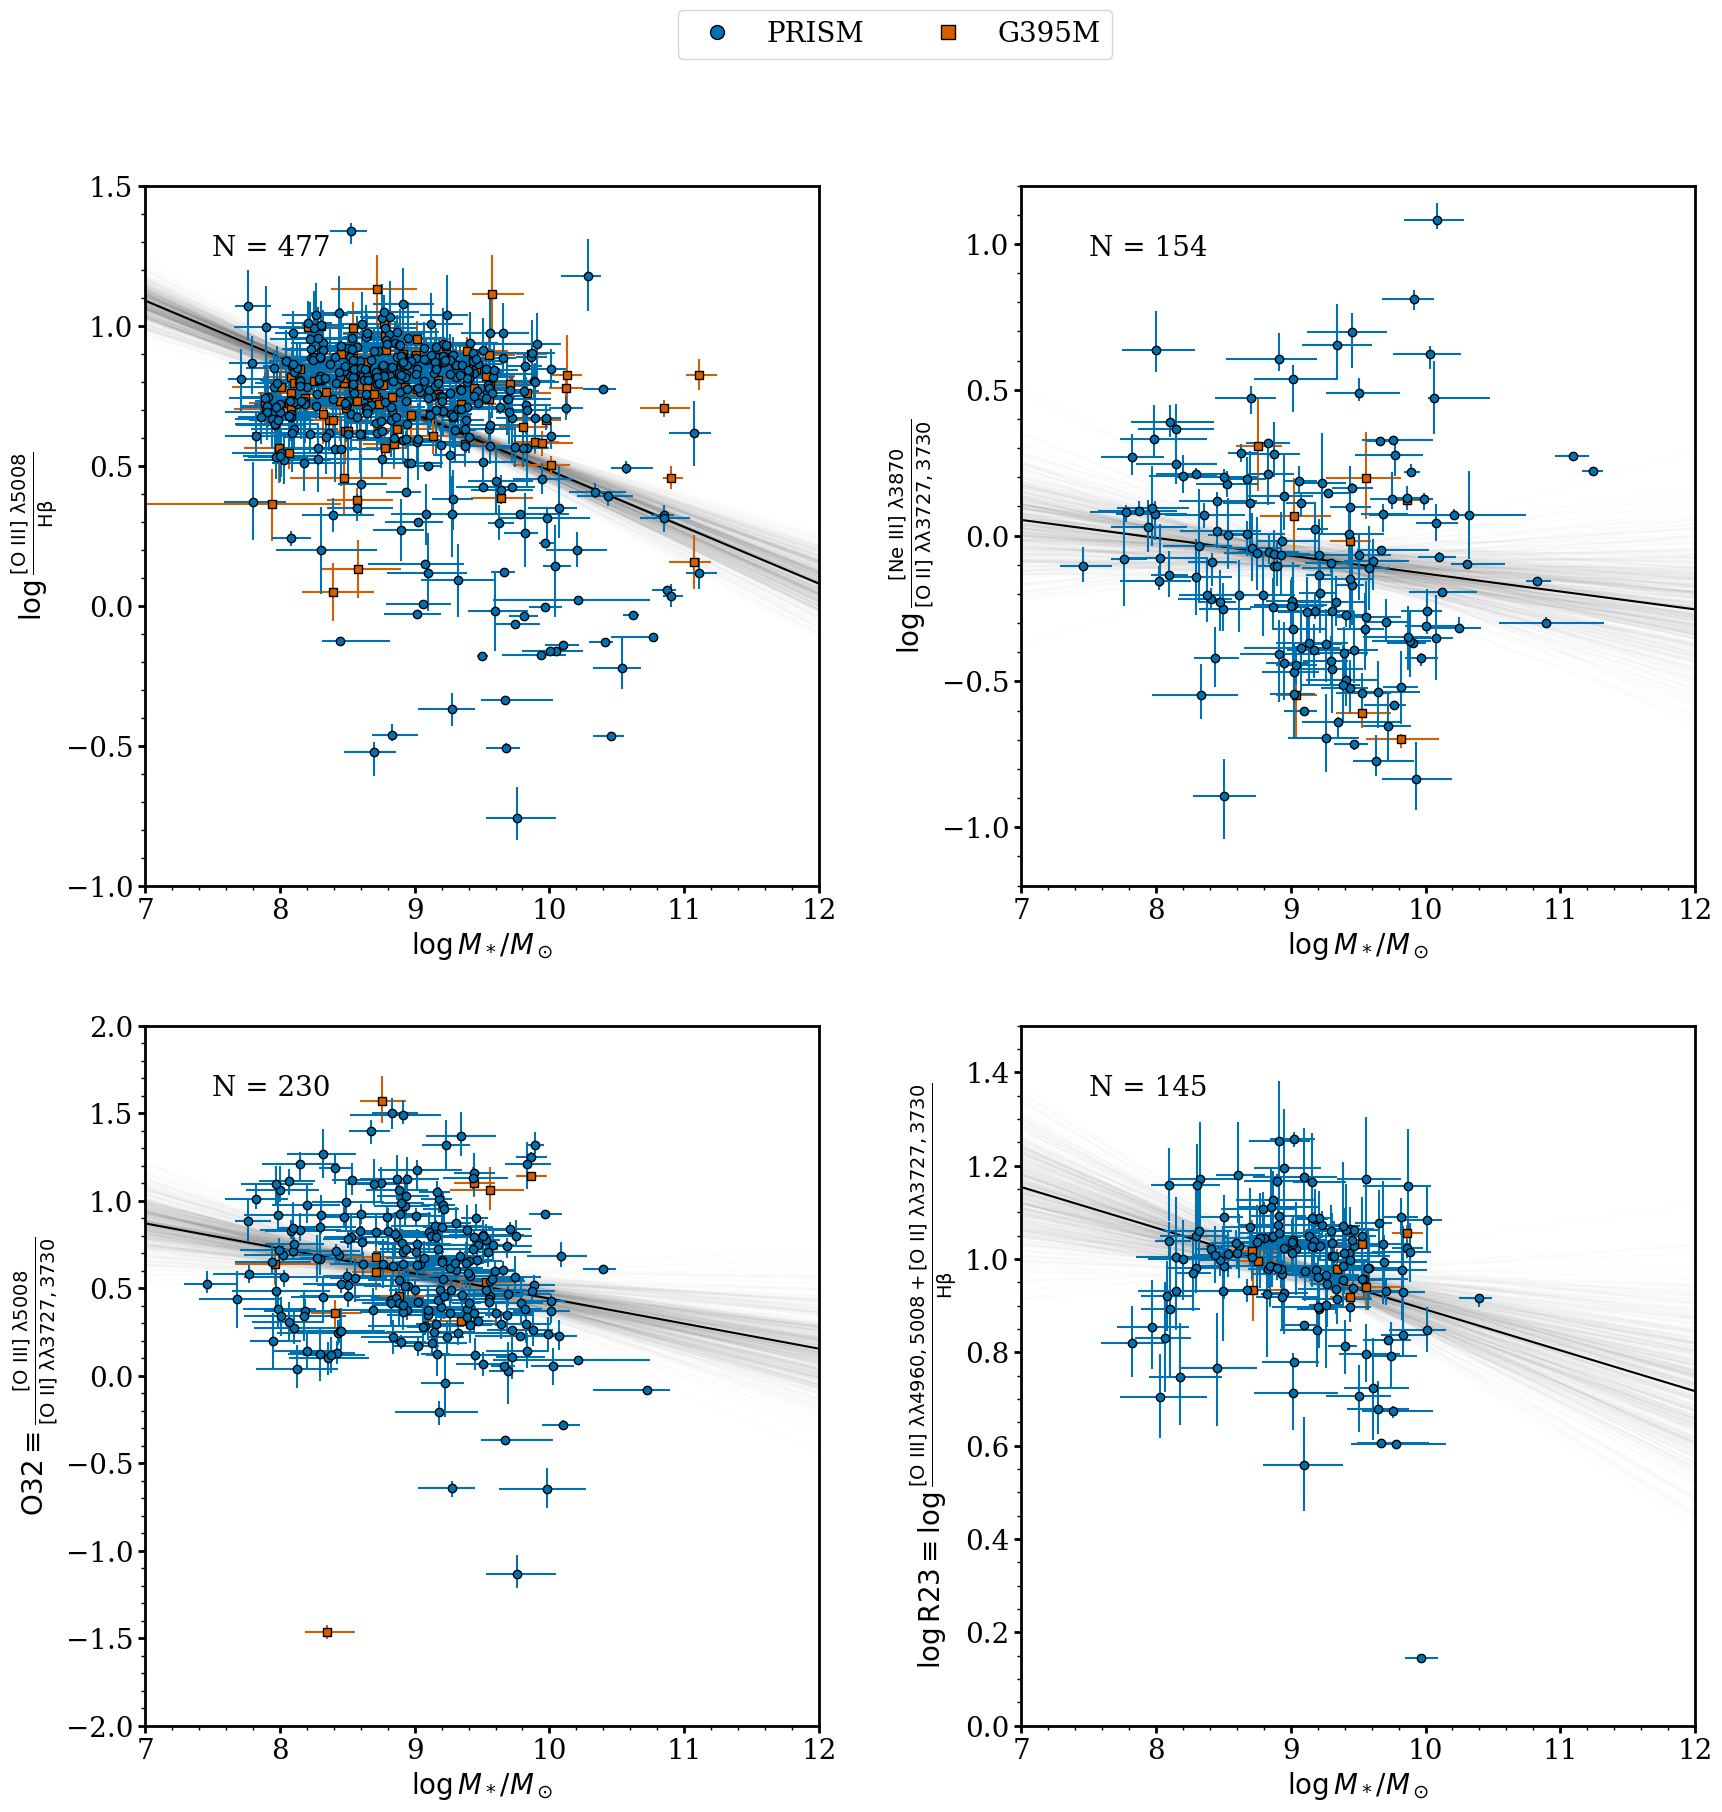

In [20]:

fig = plt.figure(figsize=(20,20))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.3, hspace=0.2)

ax = fig.add_subplot(gs[0:1, 0:1])
plot_OIIIHb_versus_mstar(ax)
# logmass = np.linspace(7,12, 1000)
# y_upper, y_lower = rd.mass_excitation_j14(logmass)
# ax.plot(logmass, y_upper, color='k')
# ax.plot(logmass, y_lower, color='k')

ax = fig.add_subplot(gs[0:1, 1:2])
plot_NeIIIOII_versus_mstar(ax)

ax = fig.add_subplot(gs[1:2, 0:1])
plot_O32_versus_mstar(ax)

ax = fig.add_subplot(gs[1:2, 1:2])
plot_R23_versus_mstar(ax)

legend_elements = generate_legend_elements_ratios_versus_mstar()     
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

plt.savefig(globals.FIGURES.joinpath('ratios_mstar.pdf'))
plt.show()

In [11]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(O3Hbdf_mstar_g395m)

id   z_g395m  z_g395m_p16  z_g395m_p84  msaexp_OIII5007_g395m  \
6     15072  5.186251     5.186067     5.186460                    NaN   
23    19958  6.350862     6.350763     6.350954                    NaN   
..      ...       ...          ...          ...                    ...   
907  970128  6.485044     6.484966     6.485122                    NaN   
912  980841  8.687764     8.687675     8.687860                    NaN   

     msaexp_e_OIII5007_g395m  msaexp_OIII_5007_g395m  \
6                        NaN               643.46890   
23                       NaN               823.33527   
..                       ...                     ...   
907                      NaN              1065.77480   
912                      NaN              1259.05370   

     msaexp_e_OIII_5007_g395m          ra        dec    Hb_g395m  \
6                   41.869180   34.268583  -5.289561   77.154591   
23                  27.034704   34.273812  -5.279722  109.211449   
..                        ...         ...        ...         ...   
907                 49.776814  214.880997  52.891214  140.156746   
912                 45.587780  214.844770  52.892109  136.457268   

     Hb_g395m_p16_err  Hb_g395m_p84_err  Oiii_4959_g395m  \
6           23.679543         23.328060       191.096695   
23          17.057465         15.934032       312.509583   
..                ...               ...              ...   
907         14.789742         13.832954       280.254166   
912         14.409081         14.923286       283.122192   

     Oiii_4959_g395m_p16_err  Oiii_4959_g395m_p84_err  Oiii_5007_g395m  \
6                  25.745148                29.011169       522.582031   
23                 19.911957                20.493988       975.509125   
..                       ...                      ...              ...   
907                18.108902                16.196304       717.366791   
912                17.021210                16.347631       829.869629   

     Oiii_5007_g395m_p16_err  Oiii_5007_g395m_p84_err  Nii_6548_g395m  \
6                  30.475983                27.312866       11.694464   
23                 29.356232                29.920929       35.849472   
..                       ...                      ...             ...   
907                24.141459                25.921544       23.690966   
912                24.168640                20.679443             NaN   

     Nii_6548_g395m_p16_err  Nii_6548_g395m_p84_err    Ha_g395m  \
6                  7.730195               23.200041  266.518631   
23                21.490955               23.081299  272.131561   
..                      ...                     ...         ...   
907               15.699819               24.588634  469.978363   
912                     NaN                     NaN         NaN   

     Ha_g395m_p16_err  Ha_g395m_p84_err  Nii_6584_g395m  \
6          227.992512         71.877213             NaN   
23         244.433371        140.504913             NaN   
..                ...               ...             ...   
907        169.033521         85.061371             NaN   
912               NaN               NaN             NaN   

     Nii_6584_g395m_p16_err  Nii_6584_g395m_p84_err  Sii_6717_g395m  \
6                       NaN                     NaN       22.994679   
23                      NaN                     NaN       89.269623   
..                      ...                     ...             ...   
907                     NaN                     NaN       80.782585   
912                     NaN                     NaN             NaN   

     Sii_6717_g395m_p16_err  Sii_6717_g395m_p84_err  Sii_6731_g395m  \
6                 16.121358               29.917716       51.823492   
23                46.413418               66.328690      159.184738   
..                      ...                     ...             ...   
907               52.138474               88.360664       62.629616   
912                     NaN      

In [30]:
def plot_OIIIHb_versus_ug(ax):
    ax.errorbar(x=O3Hbdf_mstar_g395m.ug_50_photcat, y=np.log10(O3Hbdf_mstar_g395m.OIII_Hb), 
            xerr=[np.abs(O3Hbdf_mstar_g395m.ug_16_photcat - O3Hbdf_mstar_g395m.ug_50_photcat), np.abs(O3Hbdf_mstar_g395m.ug_84_photcat - O3Hbdf_mstar_g395m.ug_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(O3Hbdf_mstar_g395m.OIII_Hb,O3Hbdf_mstar_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_mstar_g395m.OIII_Hb,O3Hbdf_mstar_g395m.OIII_Hb_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=O3Hbdf_mstar_prism.ug_50_photcat, y=np.log10(O3Hbdf_mstar_prism.OIII_Hb), 
                xerr=[np.abs(O3Hbdf_mstar_prism.ug_16_photcat - O3Hbdf_mstar_prism.ug_50_photcat), np.abs(O3Hbdf_mstar_prism.ug_84_photcat - O3Hbdf_mstar_prism.ug_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(O3Hbdf_mstar_prism.OIII_Hb,O3Hbdf_mstar_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_mstar_prism.OIII_Hb,O3Hbdf_mstar_prism.OIII_Hb_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(O3Hbdf_mstar_prism) + len(O3Hbdf_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Rest Frame u-g')
    ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
    # ax.axis([7,12,-1,1.5])

def plot_NeIIIOII_versus_ug(ax):
    ax.errorbar(x=Ne3O2df_mstar_g395m.ug_50_photcat, y=np.log10(Ne3O2df_mstar_g395m.NeIII_OII), 
                xerr=[np.abs(Ne3O2df_mstar_g395m.ug_16_photcat - Ne3O2df_mstar_g395m.ug_50_photcat), np.abs(Ne3O2df_mstar_g395m.ug_84_photcat - Ne3O2df_mstar_g395m.ug_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_mstar_g395m.NeIII_OII,Ne3O2df_mstar_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_mstar_g395m.NeIII_OII,Ne3O2df_mstar_g395m.NeIII_OII_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=Ne3O2df_mstar_prism.ug_50_photcat, y=np.log10(Ne3O2df_mstar_prism.NeIII_OII), 
                xerr=[np.abs(Ne3O2df_mstar_prism.ug_16_photcat - Ne3O2df_mstar_prism.ug_50_photcat), np.abs(Ne3O2df_mstar_prism.ug_84_photcat - Ne3O2df_mstar_prism.ug_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_mstar_prism.NeIII_OII,Ne3O2df_mstar_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_mstar_prism.NeIII_OII,Ne3O2df_mstar_prism.NeIII_OII_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(Ne3O2df_mstar_prism) + len(Ne3O2df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest Frame u-g')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    # ax.axis([7,12,-1.2,1.2])

def plot_O32_versus_ug(ax):
    ax.errorbar(x=O32df_mstar_g395m.ug_50_photcat, y=np.log10(O32df_mstar_g395m.O32), 
            xerr=[np.abs(O32df_mstar_g395m.ug_16_photcat - O32df_mstar_g395m.ug_50_photcat), np.abs(O32df_mstar_g395m.ug_84_photcat - O32df_mstar_g395m.ug_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(O32df_mstar_g395m.O32,O32df_mstar_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_mstar_g395m.O32,O32df_mstar_g395m.O32_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=O32df_mstar_prism.ug_50_photcat, y=np.log10(O32df_mstar_prism.O32), 
                xerr=[np.abs(O32df_mstar_prism.ug_16_photcat - O32df_mstar_prism.ug_50_photcat), np.abs(O32df_mstar_prism.ug_84_photcat - O32df_mstar_prism.ug_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(O32df_mstar_prism.O32,O32df_mstar_prism.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_mstar_prism.O32,O32df_mstar_prism.O32_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(O32df_mstar_prism) + len(O32df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest Frame u-g')
    ax.set_ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    # ax.axis([7,12,-2,2])

def plot_R23_versus_ug(ax):
    ax.errorbar(x=R23df_mstar_g395m.ug_50_photcat, y=np.log10(R23df_mstar_g395m.R23), 
            xerr=[np.abs(R23df_mstar_g395m.ug_16_photcat - R23df_mstar_g395m.ug_50_photcat), np.abs(R23df_mstar_g395m.ug_84_photcat - R23df_mstar_g395m.ug_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(R23df_mstar_g395m.R23,R23df_mstar_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_mstar_g395m.R23,R23df_mstar_g395m.R23_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=R23df_mstar_prism.ug_50_photcat, y=np.log10(R23df_mstar_prism.R23), 
                xerr=[np.abs(R23df_mstar_prism.ug_16_photcat - R23df_mstar_prism.ug_50_photcat), np.abs(R23df_mstar_prism.ug_84_photcat - R23df_mstar_prism.ug_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(R23df_mstar_prism.R23,R23df_mstar_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_mstar_prism.R23,R23df_mstar_prism.R23_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(R23df_mstar_prism) + len(R23df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest Frame u-g')
    ax.set_ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4960,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')
    # ax.axis([7,12,0,1.5])



def generate_legend_elements_ratios_versus_gi():
    legend_elements = [
                #    Line2D([1], [1], color='k', alpha=0.3, label='Backhaus+2024', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor=globals.PRISM_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor=globals.G395M_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                #    Line2D([0], [0], marker='X', color='none', label='SPHINX', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

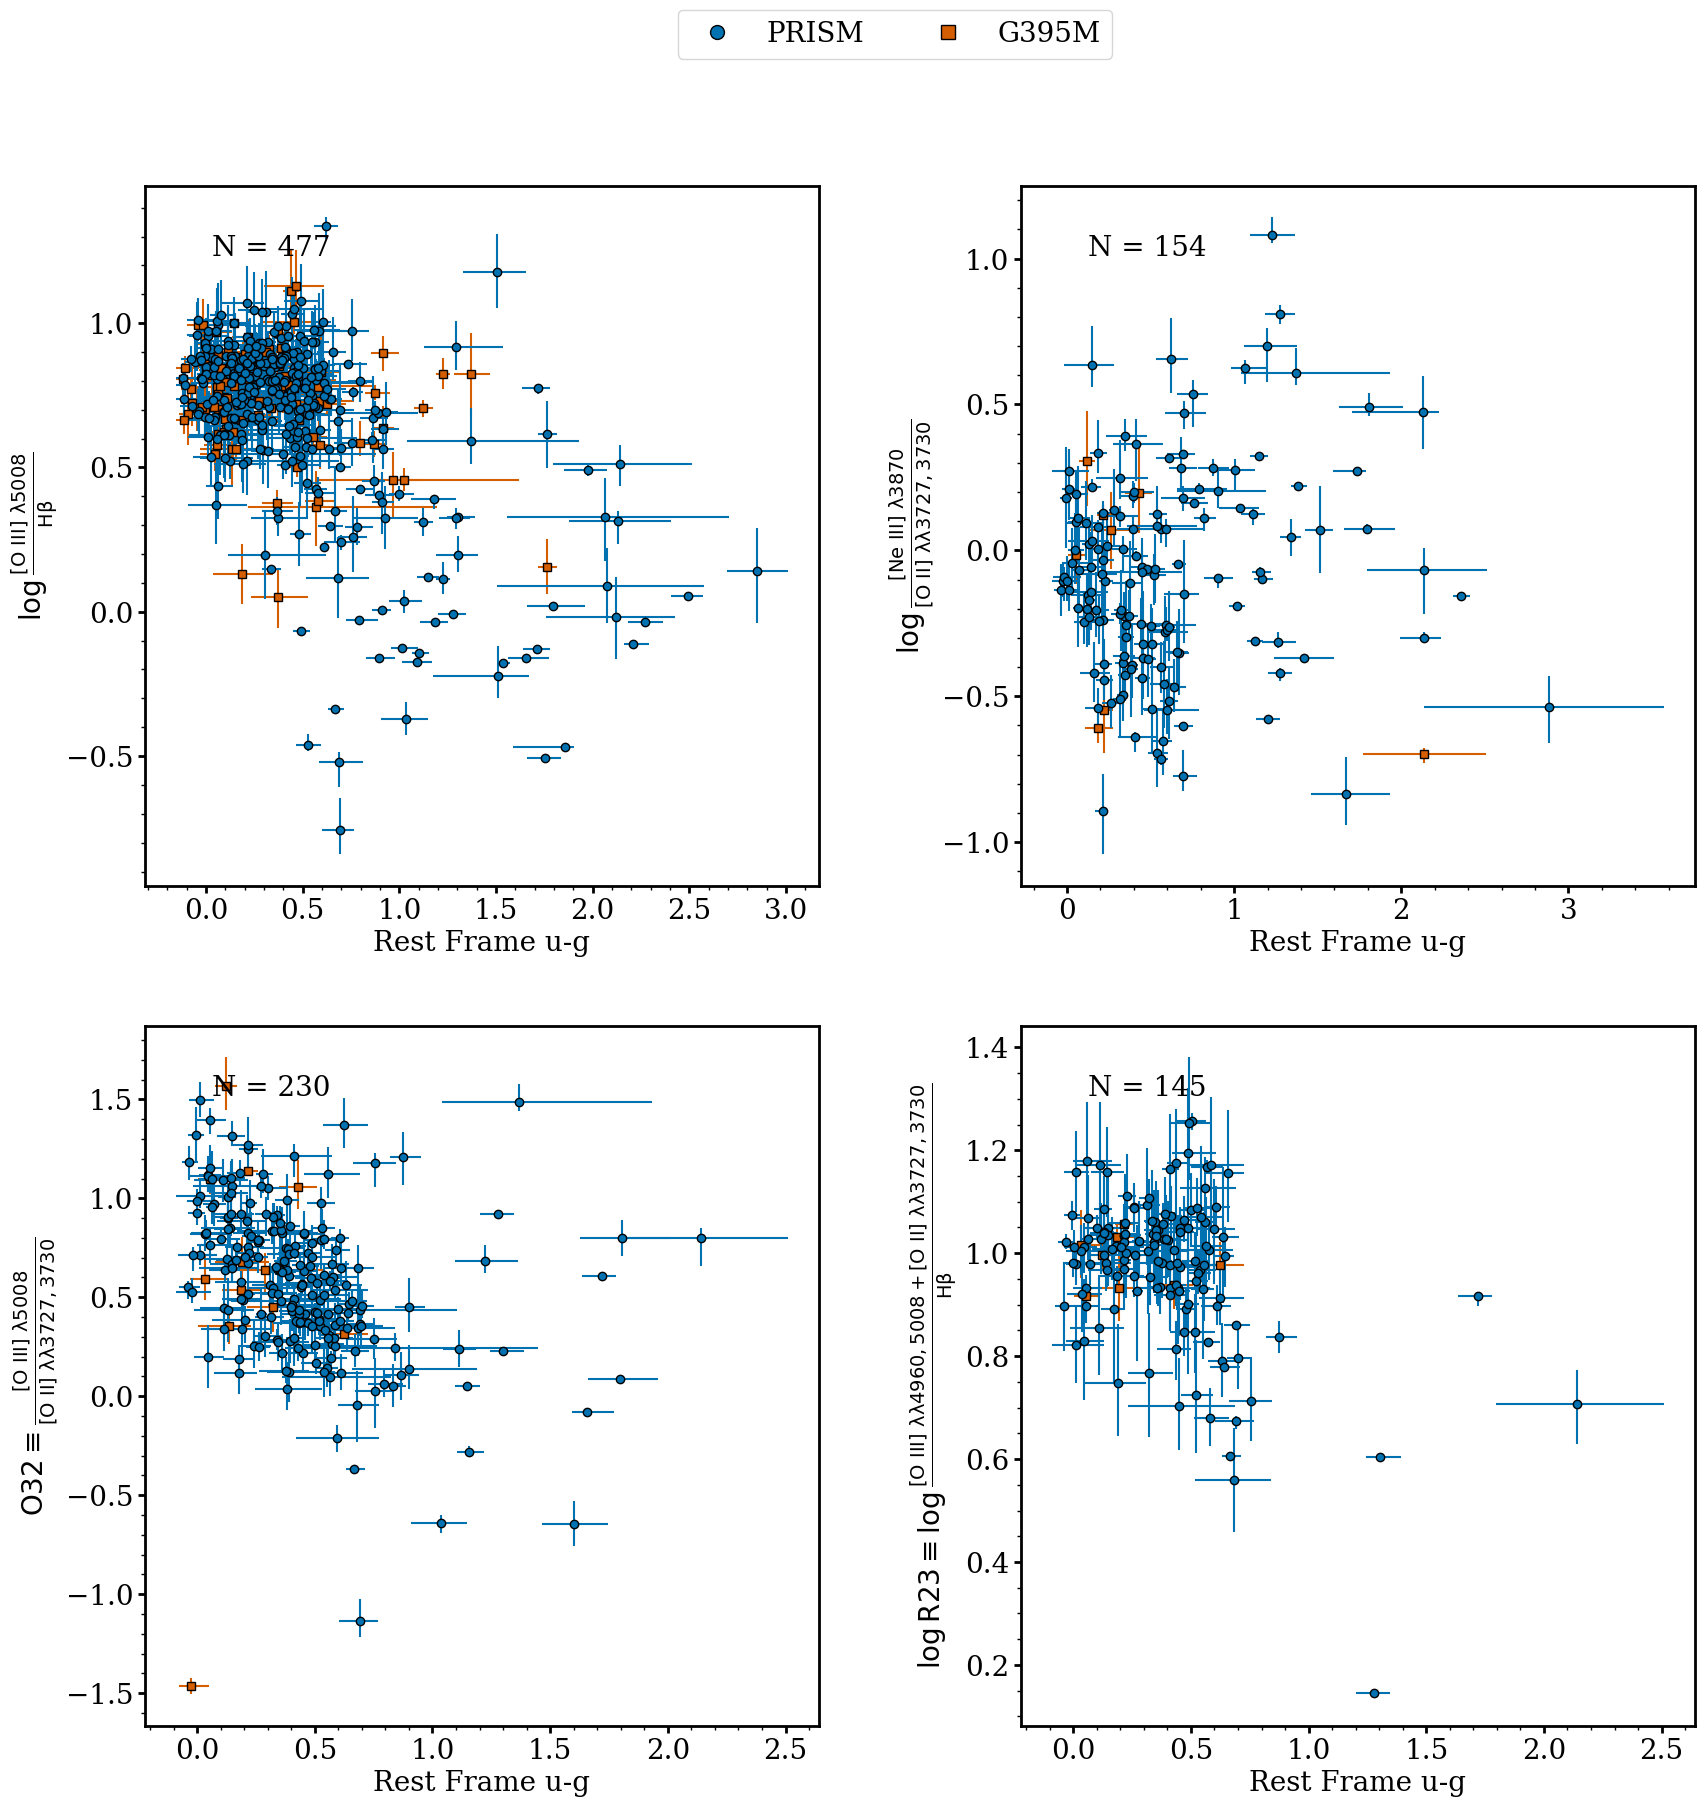

In [31]:
fig = plt.figure(figsize=(20,20))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.3, hspace=0.2)

ax = fig.add_subplot(gs[0:1, 0:1])
plot_OIIIHb_versus_ug(ax)

ax = fig.add_subplot(gs[0:1, 1:2])
plot_NeIIIOII_versus_ug(ax)

ax = fig.add_subplot(gs[1:2, 0:1])
plot_O32_versus_ug(ax)

ax = fig.add_subplot(gs[1:2, 1:2])
plot_R23_versus_ug(ax)

legend_elements = generate_legend_elements_ratios_versus_gi()     
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

plt.savefig(globals.FIGURES.joinpath('ratios_ug.pdf'))
plt.show()

In [28]:
def plot_OIIIHb_versus_gi(ax):
    ax.errorbar(x=O3Hbdf_mstar_g395m.gi_50_photcat, y=np.log10(O3Hbdf_mstar_g395m.OIII_Hb), 
            xerr=[np.abs(O3Hbdf_mstar_g395m.gi_16_photcat - O3Hbdf_mstar_g395m.gi_50_photcat), np.abs(O3Hbdf_mstar_g395m.gi_84_photcat - O3Hbdf_mstar_g395m.gi_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(O3Hbdf_mstar_g395m.OIII_Hb,O3Hbdf_mstar_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_mstar_g395m.OIII_Hb,O3Hbdf_mstar_g395m.OIII_Hb_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=O3Hbdf_mstar_prism.gi_50_photcat, y=np.log10(O3Hbdf_mstar_prism.OIII_Hb), 
                xerr=[np.abs(O3Hbdf_mstar_prism.gi_16_photcat - O3Hbdf_mstar_prism.gi_50_photcat), np.abs(O3Hbdf_mstar_prism.gi_84_photcat - O3Hbdf_mstar_prism.gi_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(O3Hbdf_mstar_prism.OIII_Hb,O3Hbdf_mstar_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_mstar_prism.OIII_Hb,O3Hbdf_mstar_prism.OIII_Hb_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(O3Hbdf_mstar_prism) + len(O3Hbdf_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Rest Frame g-i')
    ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
    # ax.axis([7,12,-1,1.5])

def plot_NeIIIOII_versus_gi(ax):
    ax.errorbar(x=Ne3O2df_mstar_g395m.gi_50_photcat, y=np.log10(Ne3O2df_mstar_g395m.NeIII_OII), 
                xerr=[np.abs(Ne3O2df_mstar_g395m.gi_16_photcat - Ne3O2df_mstar_g395m.gi_50_photcat), np.abs(Ne3O2df_mstar_g395m.gi_84_photcat - Ne3O2df_mstar_g395m.gi_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_mstar_g395m.NeIII_OII,Ne3O2df_mstar_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_mstar_g395m.NeIII_OII,Ne3O2df_mstar_g395m.NeIII_OII_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=Ne3O2df_mstar_prism.gi_50_photcat, y=np.log10(Ne3O2df_mstar_prism.NeIII_OII), 
                xerr=[np.abs(Ne3O2df_mstar_prism.gi_16_photcat - Ne3O2df_mstar_prism.gi_50_photcat), np.abs(Ne3O2df_mstar_prism.gi_84_photcat - Ne3O2df_mstar_prism.gi_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_mstar_prism.NeIII_OII,Ne3O2df_mstar_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_mstar_prism.NeIII_OII,Ne3O2df_mstar_prism.NeIII_OII_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(Ne3O2df_mstar_prism) + len(Ne3O2df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest Frame g-i')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    # ax.axis([7,12,-1.2,1.2])

def plot_O32_versus_gi(ax):
    ax.errorbar(x=O32df_mstar_g395m.gi_50_photcat, y=np.log10(O32df_mstar_g395m.O32), 
            xerr=[np.abs(O32df_mstar_g395m.gi_16_photcat - O32df_mstar_g395m.gi_50_photcat), np.abs(O32df_mstar_g395m.gi_84_photcat - O32df_mstar_g395m.gi_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(O32df_mstar_g395m.O32,O32df_mstar_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_mstar_g395m.O32,O32df_mstar_g395m.O32_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=O32df_mstar_prism.gi_50_photcat, y=np.log10(O32df_mstar_prism.O32), 
                xerr=[np.abs(O32df_mstar_prism.gi_16_photcat - O32df_mstar_prism.gi_50_photcat), np.abs(O32df_mstar_prism.gi_84_photcat - O32df_mstar_prism.gi_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(O32df_mstar_prism.O32,O32df_mstar_prism.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_mstar_prism.O32,O32df_mstar_prism.O32_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(O32df_mstar_prism) + len(O32df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest Frame g-i')
    ax.set_ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    # ax.axis([7,12,-2,2])

def plot_R23_versus_gi(ax):
    ax.errorbar(x=R23df_mstar_g395m.gi_50_photcat, y=np.log10(R23df_mstar_g395m.R23), 
            xerr=[np.abs(R23df_mstar_g395m.gi_16_photcat - R23df_mstar_g395m.gi_50_photcat), np.abs(R23df_mstar_g395m.gi_84_photcat - R23df_mstar_g395m.gi_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(R23df_mstar_g395m.R23,R23df_mstar_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_mstar_g395m.R23,R23df_mstar_g395m.R23_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=R23df_mstar_prism.gi_50_photcat, y=np.log10(R23df_mstar_prism.R23), 
                xerr=[np.abs(R23df_mstar_prism.gi_16_photcat - R23df_mstar_prism.gi_50_photcat), np.abs(R23df_mstar_prism.gi_84_photcat - R23df_mstar_prism.gi_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(R23df_mstar_prism.R23,R23df_mstar_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_mstar_prism.R23,R23df_mstar_prism.R23_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(R23df_mstar_prism) + len(R23df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest Frame g-i')
    ax.set_ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4960,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')
    # ax.axis([7,12,0,1.5])



def generate_legend_elements_ratios_versus_gi():
    legend_elements = [
                #    Line2D([1], [1], color='k', alpha=0.3, label='Backhaus+2024', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor=globals.PRISM_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor=globals.G395M_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                #    Line2D([0], [0], marker='X', color='none', label='SPHINX', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

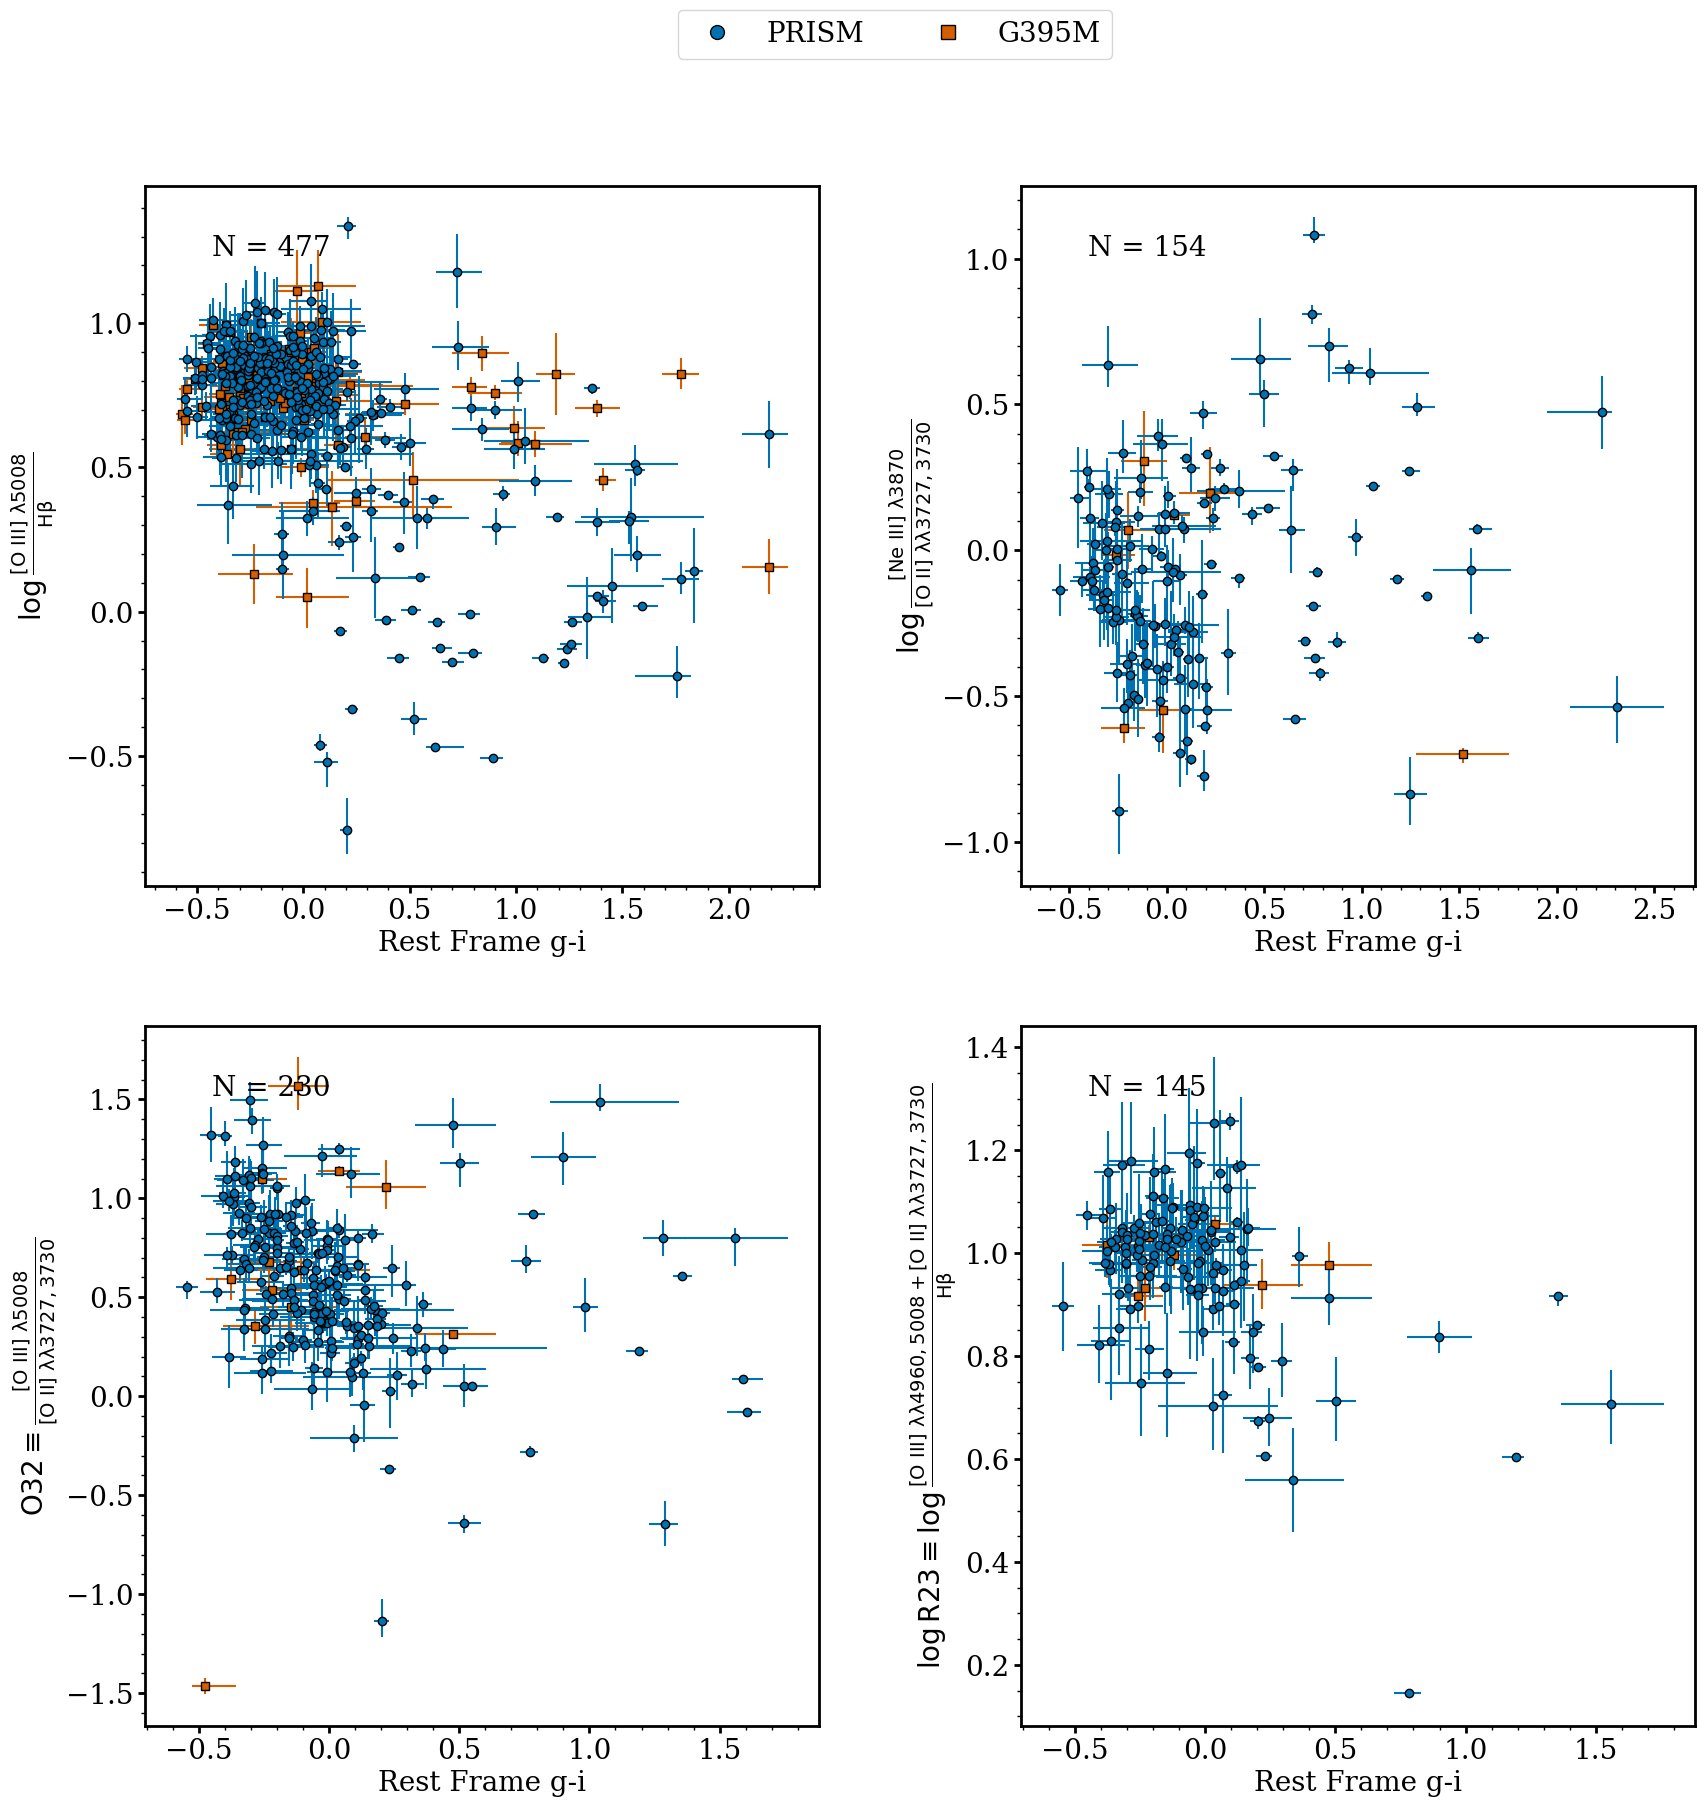

In [29]:
fig = plt.figure(figsize=(20,20))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.3, hspace=0.2)

ax = fig.add_subplot(gs[0:1, 0:1])
plot_OIIIHb_versus_gi(ax)

ax = fig.add_subplot(gs[0:1, 1:2])
plot_NeIIIOII_versus_gi(ax)

ax = fig.add_subplot(gs[1:2, 0:1])
plot_O32_versus_gi(ax)

ax = fig.add_subplot(gs[1:2, 1:2])
plot_R23_versus_gi(ax)

legend_elements = generate_legend_elements_ratios_versus_gi()     
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

plt.savefig(globals.FIGURES.joinpath('ratios_gi.pdf'))
plt.show()

In [34]:
def plot_OIIIHb_versus_UV(ax):
    ax.errorbar(x=O3Hbdf_mstar_g395m.UV_50_photcat, y=np.log10(O3Hbdf_mstar_g395m.OIII_Hb), 
            xerr=[np.abs(O3Hbdf_mstar_g395m.UV_16_photcat - O3Hbdf_mstar_g395m.UV_50_photcat), np.abs(O3Hbdf_mstar_g395m.UV_84_photcat - O3Hbdf_mstar_g395m.UV_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(O3Hbdf_mstar_g395m.OIII_Hb,O3Hbdf_mstar_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_mstar_g395m.OIII_Hb,O3Hbdf_mstar_g395m.OIII_Hb_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=O3Hbdf_mstar_prism.UV_50_photcat, y=np.log10(O3Hbdf_mstar_prism.OIII_Hb), 
                xerr=[np.abs(O3Hbdf_mstar_prism.UV_16_photcat - O3Hbdf_mstar_prism.UV_50_photcat), np.abs(O3Hbdf_mstar_prism.UV_84_photcat - O3Hbdf_mstar_prism.UV_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(O3Hbdf_mstar_prism.OIII_Hb,O3Hbdf_mstar_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_mstar_prism.OIII_Hb,O3Hbdf_mstar_prism.OIII_Hb_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(O3Hbdf_mstar_prism) + len(O3Hbdf_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Rest Frame U-V')
    ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
    # ax.axis([7,12,-1,1.5])

def plot_NeIIIOII_versus_UV(ax):
    ax.errorbar(x=Ne3O2df_mstar_g395m.UV_50_photcat, y=np.log10(Ne3O2df_mstar_g395m.NeIII_OII), 
                xerr=[np.abs(Ne3O2df_mstar_g395m.UV_16_photcat - Ne3O2df_mstar_g395m.UV_50_photcat), np.abs(Ne3O2df_mstar_g395m.UV_84_photcat - Ne3O2df_mstar_g395m.UV_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_mstar_g395m.NeIII_OII,Ne3O2df_mstar_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_mstar_g395m.NeIII_OII,Ne3O2df_mstar_g395m.NeIII_OII_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=Ne3O2df_mstar_prism.UV_50_photcat, y=np.log10(Ne3O2df_mstar_prism.NeIII_OII), 
                xerr=[np.abs(Ne3O2df_mstar_prism.UV_16_photcat - Ne3O2df_mstar_prism.UV_50_photcat), np.abs(Ne3O2df_mstar_prism.UV_84_photcat - Ne3O2df_mstar_prism.UV_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_mstar_prism.NeIII_OII,Ne3O2df_mstar_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_mstar_prism.NeIII_OII,Ne3O2df_mstar_prism.NeIII_OII_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(Ne3O2df_mstar_prism) + len(Ne3O2df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest Frame U-V')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    # ax.axis([7,12,-1.2,1.2])

def plot_O32_versus_UV(ax):
    ax.errorbar(x=O32df_mstar_g395m.UV_50_photcat, y=np.log10(O32df_mstar_g395m.O32), 
            xerr=[np.abs(O32df_mstar_g395m.UV_16_photcat - O32df_mstar_g395m.UV_50_photcat), np.abs(O32df_mstar_g395m.UV_84_photcat - O32df_mstar_g395m.UV_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(O32df_mstar_g395m.O32,O32df_mstar_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_mstar_g395m.O32,O32df_mstar_g395m.O32_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=O32df_mstar_prism.UV_50_photcat, y=np.log10(O32df_mstar_prism.O32), 
                xerr=[np.abs(O32df_mstar_prism.UV_16_photcat - O32df_mstar_prism.UV_50_photcat), np.abs(O32df_mstar_prism.UV_84_photcat - O32df_mstar_prism.UV_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(O32df_mstar_prism.O32,O32df_mstar_prism.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_mstar_prism.O32,O32df_mstar_prism.O32_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(O32df_mstar_prism) + len(O32df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest Frame U-V')
    ax.set_ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    # ax.axis([7,12,-2,2])

def plot_R23_versus_UV(ax):
    ax.errorbar(x=R23df_mstar_g395m.UV_50_photcat, y=np.log10(R23df_mstar_g395m.R23), 
            xerr=[np.abs(R23df_mstar_g395m.UV_16_photcat - R23df_mstar_g395m.UV_50_photcat), np.abs(R23df_mstar_g395m.UV_84_photcat - R23df_mstar_g395m.UV_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(R23df_mstar_g395m.R23,R23df_mstar_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_mstar_g395m.R23,R23df_mstar_g395m.R23_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=R23df_mstar_prism.UV_50_photcat, y=np.log10(R23df_mstar_prism.R23), 
                xerr=[np.abs(R23df_mstar_prism.UV_16_photcat - R23df_mstar_prism.UV_50_photcat), np.abs(R23df_mstar_prism.UV_84_photcat - R23df_mstar_prism.UV_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(R23df_mstar_prism.R23,R23df_mstar_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_mstar_prism.R23,R23df_mstar_prism.R23_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(R23df_mstar_prism) + len(R23df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest Frame U-V')
    ax.set_ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4960,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')
    # ax.axis([7,12,0,1.5])



def generate_legend_elements_ratios_versus_UV():
    legend_elements = [
                #    Line2D([1], [1], color='k', alpha=0.3, label='Backhaus+2024', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor=globals.PRISM_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor=globals.G395M_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                #    Line2D([0], [0], marker='X', color='none', label='SPHINX', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

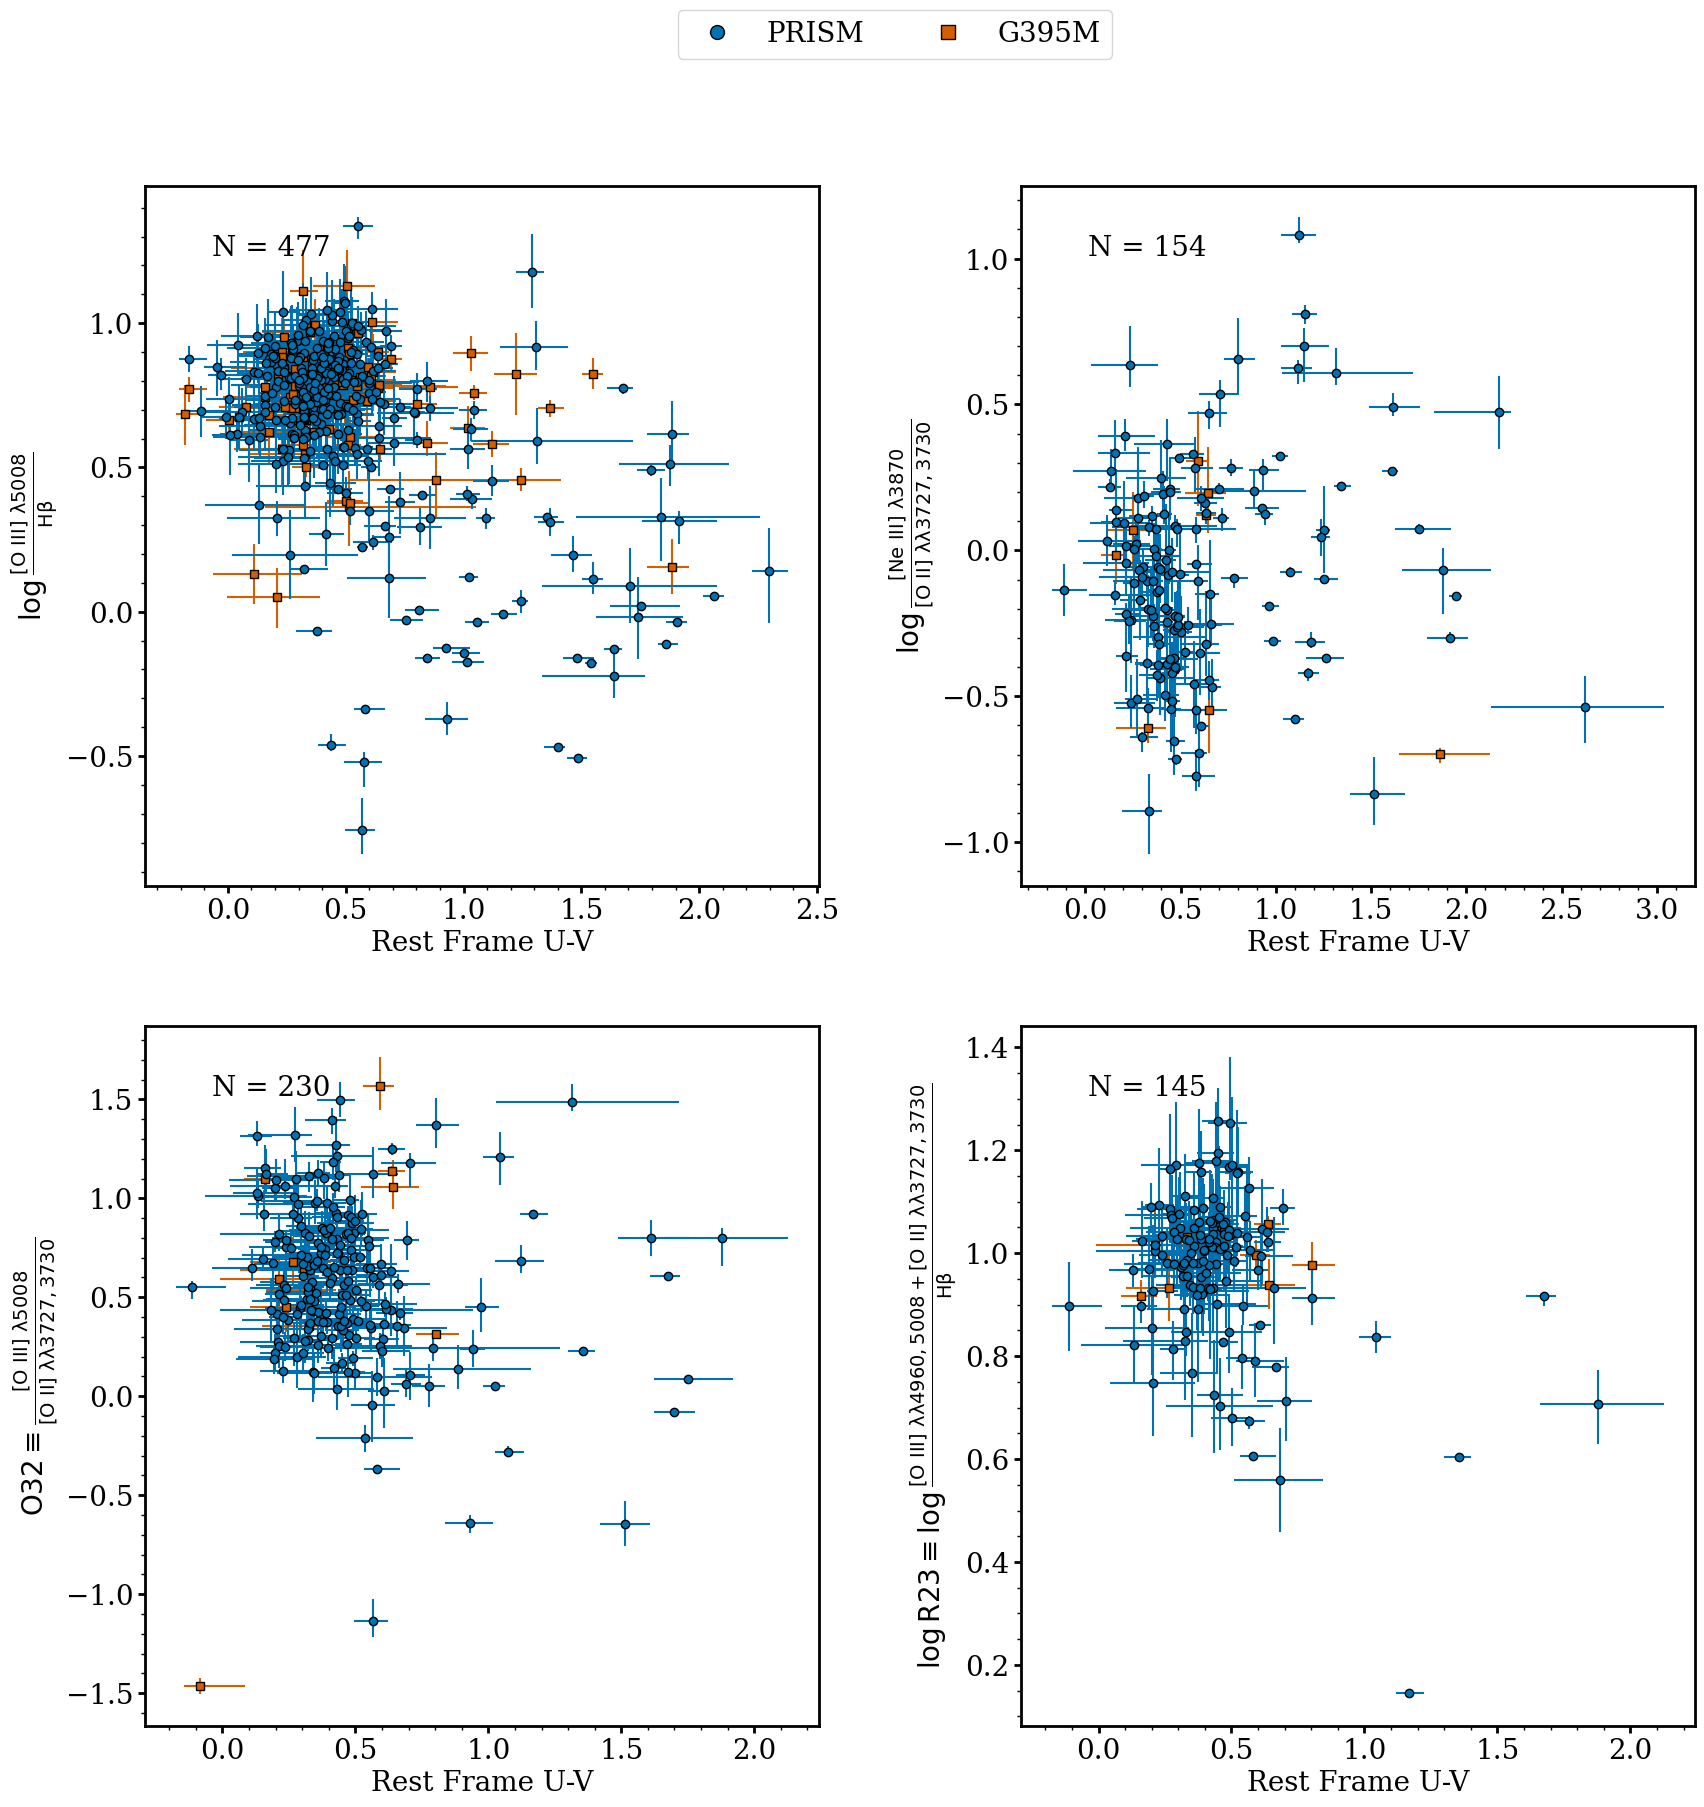

In [35]:
fig = plt.figure(figsize=(20,20))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.3, hspace=0.2)

ax = fig.add_subplot(gs[0:1, 0:1])
plot_OIIIHb_versus_UV(ax)

ax = fig.add_subplot(gs[0:1, 1:2])
plot_NeIIIOII_versus_UV(ax)

ax = fig.add_subplot(gs[1:2, 0:1])
plot_O32_versus_UV(ax)

ax = fig.add_subplot(gs[1:2, 1:2])
plot_R23_versus_UV(ax)

legend_elements = generate_legend_elements_ratios_versus_UV()     
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

plt.savefig(globals.FIGURES.joinpath('ratios_UV.pdf'))
plt.show()

In [39]:
def plot_OIIIHb_versus_VJ(ax):
    ax.errorbar(x=O3Hbdf_mstar_g395m.VJ_50_photcat, y=np.log10(O3Hbdf_mstar_g395m.OIII_Hb), 
            xerr=[np.abs(O3Hbdf_mstar_g395m.VJ_16_photcat - O3Hbdf_mstar_g395m.VJ_50_photcat), np.abs(O3Hbdf_mstar_g395m.VJ_84_photcat - O3Hbdf_mstar_g395m.VJ_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(O3Hbdf_mstar_g395m.OIII_Hb,O3Hbdf_mstar_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_mstar_g395m.OIII_Hb,O3Hbdf_mstar_g395m.OIII_Hb_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=O3Hbdf_mstar_prism.VJ_50_photcat, y=np.log10(O3Hbdf_mstar_prism.OIII_Hb), 
                xerr=[np.abs(O3Hbdf_mstar_prism.VJ_16_photcat - O3Hbdf_mstar_prism.VJ_50_photcat), np.abs(O3Hbdf_mstar_prism.VJ_84_photcat - O3Hbdf_mstar_prism.VJ_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(O3Hbdf_mstar_prism.OIII_Hb,O3Hbdf_mstar_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_mstar_prism.OIII_Hb,O3Hbdf_mstar_prism.OIII_Hb_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(O3Hbdf_mstar_prism) + len(O3Hbdf_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Rest Frame V-J')
    ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
    # ax.axis([7,12,-1,1.5])

def plot_NeIIIOII_versus_VJ(ax):
    ax.errorbar(x=Ne3O2df_mstar_g395m.VJ_50_photcat, y=np.log10(Ne3O2df_mstar_g395m.NeIII_OII), 
                xerr=[np.abs(Ne3O2df_mstar_g395m.VJ_16_photcat - Ne3O2df_mstar_g395m.VJ_50_photcat), np.abs(Ne3O2df_mstar_g395m.VJ_84_photcat - Ne3O2df_mstar_g395m.VJ_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_mstar_g395m.NeIII_OII,Ne3O2df_mstar_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_mstar_g395m.NeIII_OII,Ne3O2df_mstar_g395m.NeIII_OII_ERR_84)],
                ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=Ne3O2df_mstar_prism.VJ_50_photcat, y=np.log10(Ne3O2df_mstar_prism.NeIII_OII), 
                xerr=[np.abs(Ne3O2df_mstar_prism.VJ_16_photcat - Ne3O2df_mstar_prism.VJ_50_photcat), np.abs(Ne3O2df_mstar_prism.VJ_84_photcat - Ne3O2df_mstar_prism.VJ_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_mstar_prism.NeIII_OII,Ne3O2df_mstar_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_mstar_prism.NeIII_OII,Ne3O2df_mstar_prism.NeIII_OII_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(Ne3O2df_mstar_prism) + len(Ne3O2df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest Frame V-J')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    # ax.axis([7,12,-1.2,1.2])

def plot_O32_versus_VJ(ax):
    ax.errorbar(x=O32df_mstar_g395m.VJ_50_photcat, y=np.log10(O32df_mstar_g395m.O32), 
            xerr=[np.abs(O32df_mstar_g395m.VJ_16_photcat - O32df_mstar_g395m.VJ_50_photcat), np.abs(O32df_mstar_g395m.VJ_84_photcat - O32df_mstar_g395m.VJ_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(O32df_mstar_g395m.O32,O32df_mstar_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_mstar_g395m.O32,O32df_mstar_g395m.O32_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=O32df_mstar_prism.VJ_50_photcat, y=np.log10(O32df_mstar_prism.O32), 
                xerr=[np.abs(O32df_mstar_prism.VJ_16_photcat - O32df_mstar_prism.VJ_50_photcat), np.abs(O32df_mstar_prism.VJ_84_photcat - O32df_mstar_prism.VJ_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(O32df_mstar_prism.O32,O32df_mstar_prism.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_mstar_prism.O32,O32df_mstar_prism.O32_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(O32df_mstar_prism) + len(O32df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest Frame V-J')
    ax.set_ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    # ax.axis([7,12,-2,2])

def plot_R23_versus_VJ(ax):
    ax.errorbar(x=R23df_mstar_g395m.VJ_50_photcat, y=np.log10(R23df_mstar_g395m.R23), 
            xerr=[np.abs(R23df_mstar_g395m.VJ_16_photcat - R23df_mstar_g395m.VJ_50_photcat), np.abs(R23df_mstar_g395m.VJ_84_photcat - R23df_mstar_g395m.VJ_50_photcat)],
            yerr=[sf.propagate_uncertainty_log10(R23df_mstar_g395m.R23,R23df_mstar_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_mstar_g395m.R23,R23df_mstar_g395m.R23_ERR_84)],
            ls='None', color=globals.G395M_COLOR, marker='s', mec='k', label='G395M')

    ax.errorbar(x=R23df_mstar_prism.VJ_50_photcat, y=np.log10(R23df_mstar_prism.R23), 
                xerr=[np.abs(R23df_mstar_prism.VJ_16_photcat - R23df_mstar_prism.VJ_50_photcat), np.abs(R23df_mstar_prism.VJ_84_photcat - R23df_mstar_prism.VJ_50_photcat)],
                yerr=[sf.propagate_uncertainty_log10(R23df_mstar_prism.R23,R23df_mstar_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_mstar_prism.R23,R23df_mstar_prism.R23_ERR_84)],
                ls='None', color=globals.PRISM_COLOR, marker='o', mec='k', label='PRISM')

    ax.annotate(f'N = {len(R23df_mstar_prism) + len(R23df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest Frame V-J')
    ax.set_ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4960,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')
    # ax.axis([7,12,0,1.5])

def generate_legend_elements_ratios_versus_VJ():
    legend_elements = [
                #    Line2D([1], [1], color='k', alpha=0.3, label='Backhaus+2024', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor=globals.PRISM_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor=globals.G395M_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                #    Line2D([0], [0], marker='X', color='none', label='SPHINX', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

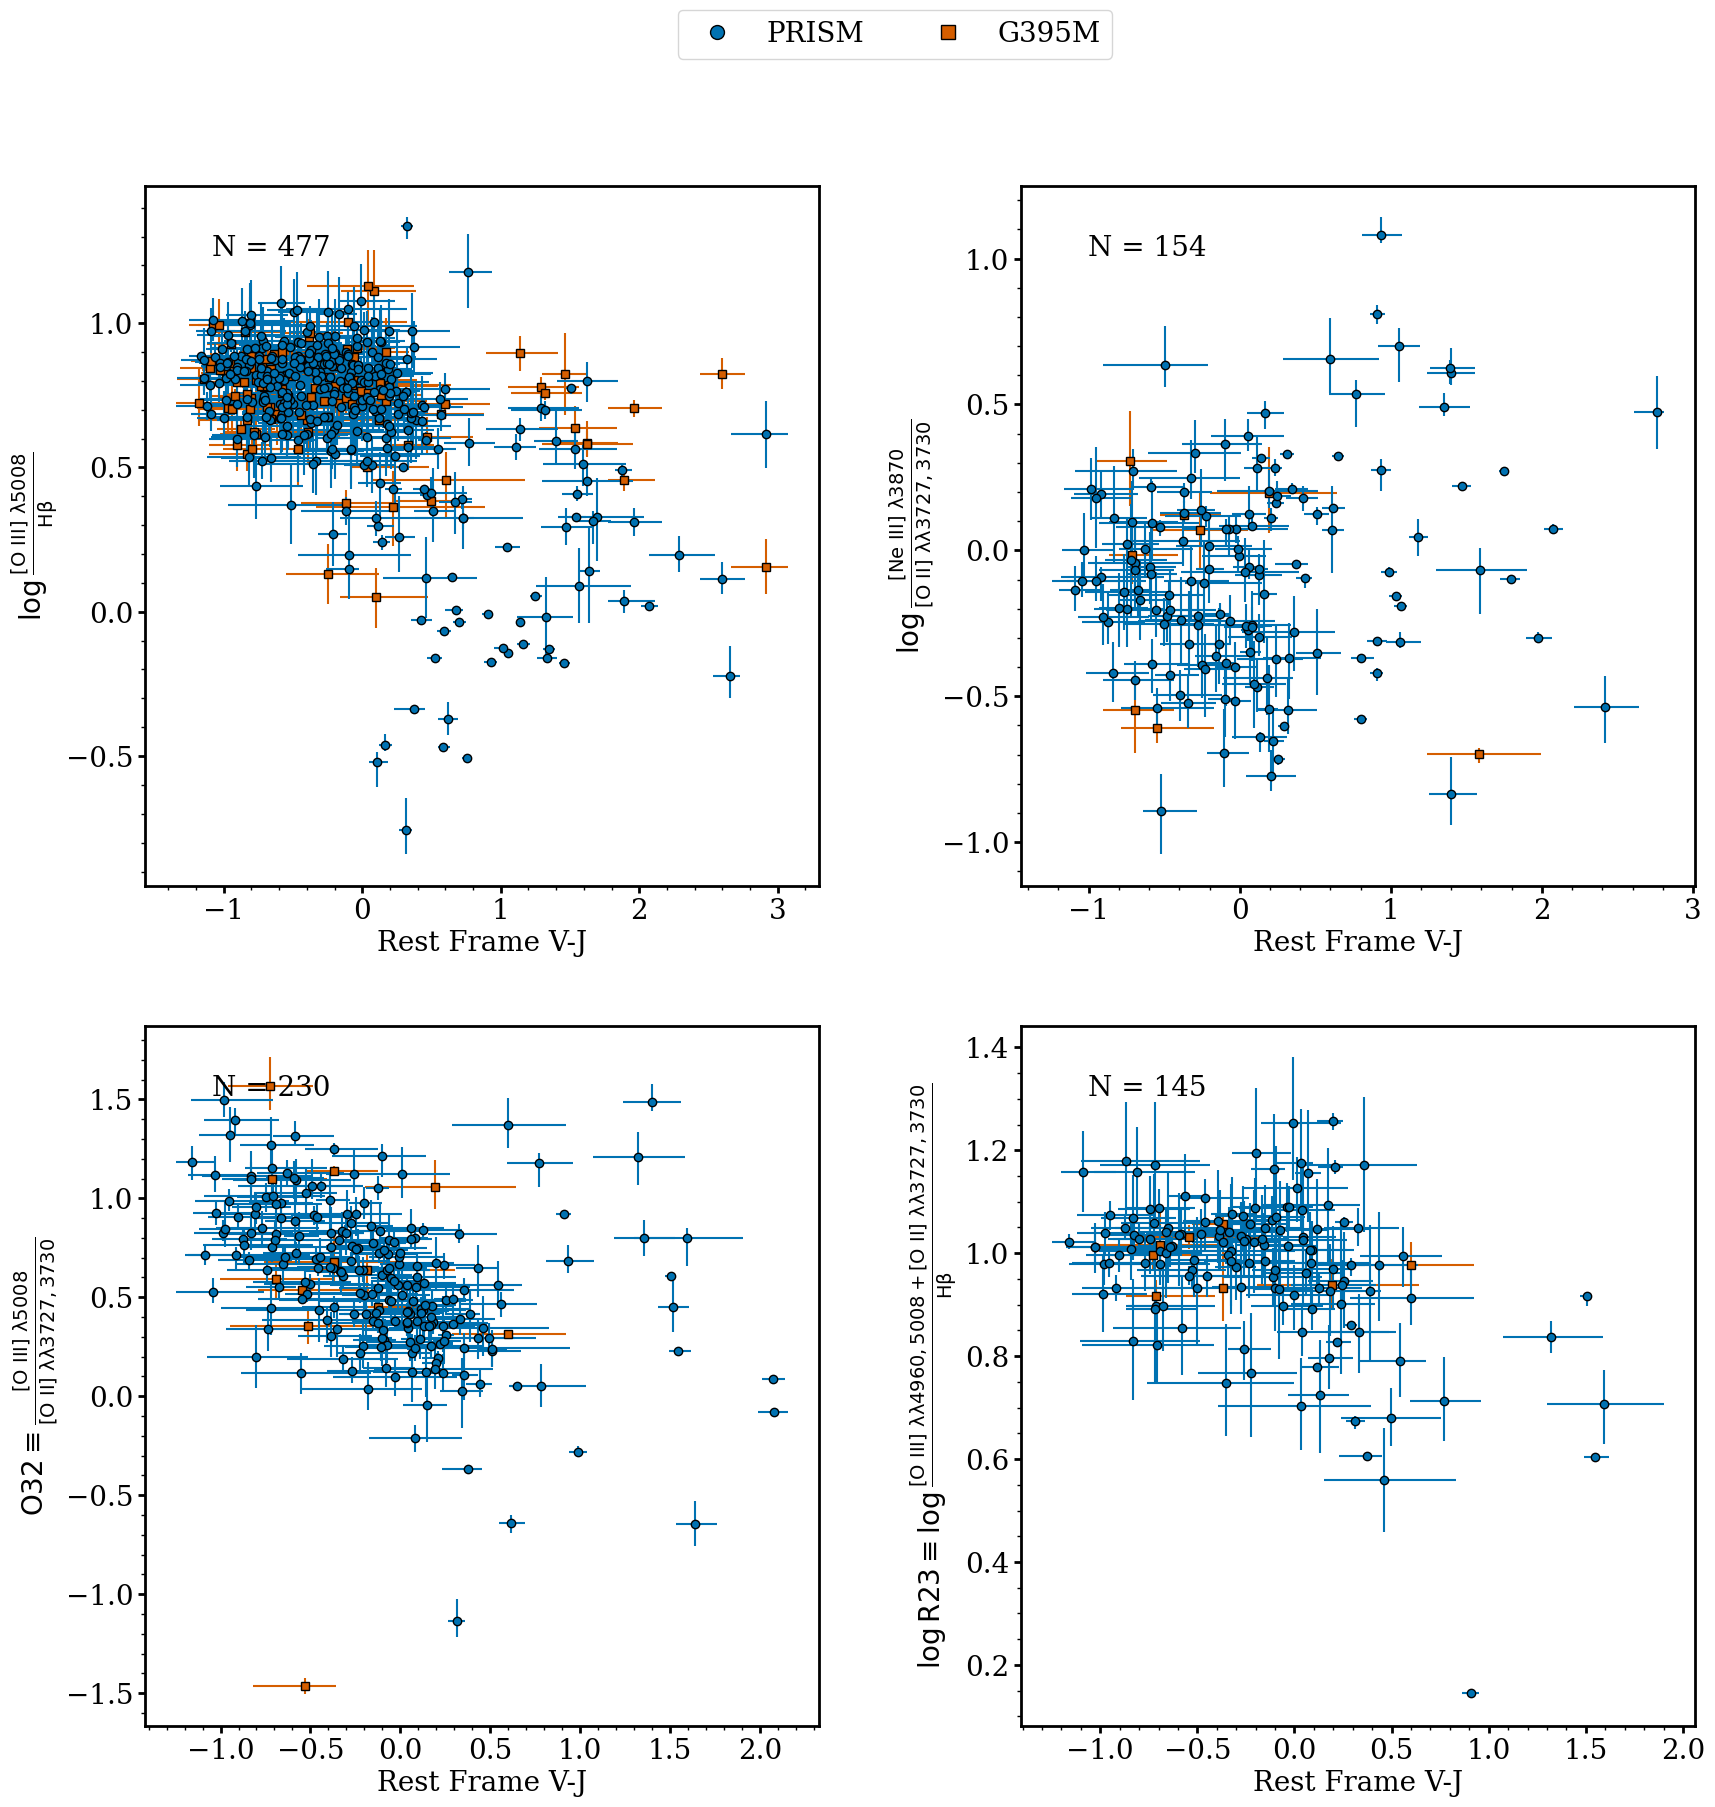

In [40]:
fig = plt.figure(figsize=(20,20))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.3, hspace=0.2)

ax = fig.add_subplot(gs[0:1, 0:1])
plot_OIIIHb_versus_VJ(ax)

ax = fig.add_subplot(gs[0:1, 1:2])
plot_NeIIIOII_versus_VJ(ax)

ax = fig.add_subplot(gs[1:2, 0:1])
plot_O32_versus_VJ(ax)

ax = fig.add_subplot(gs[1:2, 1:2])
plot_R23_versus_VJ(ax)

legend_elements = generate_legend_elements_ratios_versus_VJ()     
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

plt.savefig(globals.FIGURES.joinpath('ratios_VJ.pdf'))
plt.show()

In [ ]:
def plot_UVJ_color_OIIIHb(ax):
    ax.errorbar(x=Ne3O2df_mstar_g395m.VJ_50_photcat, y=Ne3O2df_mstar_g395m.UV_50_photcat, 
            xerr=[np.abs(Ne3O2df_mstar_g395m.UV_16_photcat - Ne3O2df_mstar_g395m.UV_50_photcat), np.abs(Ne3O2df_mstar_g395m.UV_84_photcat - Ne3O2df_mstar_g395m.UV_50_photcat)],
            yerr=[np.abs(Ne3O2df_mstar_g395m.UV_16_photcat - Ne3O2df_mstar_g395m.UV_50_photcat), np.abs(Ne3O2df_mstar_g395m.UV_84_photcat - Ne3O2df_mstar_g395m.UV_50_photcat)],
            ls='None', color='k', label='G395M', zorder=-9)
    ax.scatter(Ne3O2df_mstar_g395m.VJ_50_photcat, Ne3O2df_mstar_g395m.UV_50_photcat, c=Ne3O2df_mstar_g395m.NeIII_OII, cmap='Reds', marker='s', ec='k', label='G395M')

    ax.errorbar(x=Ne3O2df_mstar_prism.VJ_50_photcat, y=Ne3O2df_mstar_prism.UV_50_photcat, 
                xerr=[np.abs(Ne3O2df_mstar_prism.UV_16_photcat - Ne3O2df_mstar_prism.UV_50_photcat), np.abs(Ne3O2df_mstar_prism.UV_84_photcat - Ne3O2df_mstar_prism.UV_50_photcat)],
                yerr=[np.abs(Ne3O2df_mstar_prism.UV_16_photcat - Ne3O2df_mstar_prism.UV_50_photcat), np.abs(Ne3O2df_mstar_prism.UV_84_photcat - Ne3O2df_mstar_prism.UV_50_photcat)],
                ls='None', color='k', label='PRISM', zorder=-9)
    ax.scatter(Ne3O2df_mstar_prism.VJ_50_photcat, Ne3O2df_mstar_prism.UV_50_photcat, c=Ne3O2df_mstar_prism.NeIII_OII, cmap='Reds', marker='o', ec='k', label='PRISM')

    ax.annotate(f'N = {len(Ne3O2df_mstar_prism) + len(Ne3O2df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest-Frame V-J')
    ax.set_ylabel('Rest Frame U-V')
    # ax.axis([7,12,-1,1.5])

In [ ]:

def plot_UVJ_color_R23(ax):
    ax.errorbar(x=R23df_mstar_g395m.VJ_50_photcat, y=R23df_mstar_g395m.UV_50_photcat, 
            xerr=[np.abs(R23df_mstar_g395m.UV_16_photcat - R23df_mstar_g395m.UV_50_photcat), np.abs(R23df_mstar_g395m.UV_84_photcat - R23df_mstar_g395m.UV_50_photcat)],
            yerr=[np.abs(R23df_mstar_g395m.UV_16_photcat - R23df_mstar_g395m.UV_50_photcat), np.abs(R23df_mstar_g395m.UV_84_photcat - R23df_mstar_g395m.UV_50_photcat)],
            ls='None', color='k', label='G395M', zorder=-9)
    ax.scatter(R23df_mstar_g395m.VJ_50_photcat, R23df_mstar_g395m.UV_50_photcat, c=R23df_mstar_g395m.R23, cmap='Reds', marker='s', ec='k', label='G395M')

    ax.errorbar(x=R23df_mstar_prism.VJ_50_photcat, y=R23df_mstar_prism.UV_50_photcat, 
                xerr=[np.abs(R23df_mstar_prism.UV_16_photcat - R23df_mstar_prism.UV_50_photcat), np.abs(R23df_mstar_prism.UV_84_photcat - R23df_mstar_prism.UV_50_photcat)],
                yerr=[np.abs(R23df_mstar_prism.UV_16_photcat - R23df_mstar_prism.UV_50_photcat), np.abs(R23df_mstar_prism.UV_84_photcat - R23df_mstar_prism.UV_50_photcat)],
                ls='None', color='k', label='PRISM', zorder=-9)
    ax.scatter(R23df_mstar_prism.VJ_50_photcat, R23df_mstar_prism.UV_50_photcat, c=R23df_mstar_prism.R23, cmap='Reds', marker='o', ec='k', label='PRISM')

    ax.annotate(f'N = {len(R23df_mstar_prism) + len(R23df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest-Frame V-J')
    ax.set_ylabel('Rest Frame U-V')
    # ax.axis([7,12,-1,1.5])

In [60]:
def plot_UVJ_color_OIIIHb(ax):
    ax.errorbar(x=O3Hbdf_mstar_g395m.VJ_50_photcat, y=O3Hbdf_mstar_g395m.UV_50_photcat, 
            xerr=[np.abs(O3Hbdf_mstar_g395m.UV_16_photcat - O3Hbdf_mstar_g395m.UV_50_photcat), np.abs(O3Hbdf_mstar_g395m.UV_84_photcat - O3Hbdf_mstar_g395m.UV_50_photcat)],
            yerr=[np.abs(O3Hbdf_mstar_g395m.UV_16_photcat - O3Hbdf_mstar_g395m.UV_50_photcat), np.abs(O3Hbdf_mstar_g395m.UV_84_photcat - O3Hbdf_mstar_g395m.UV_50_photcat)],
            ls='None', color='k', label='G395M', zorder=-9)
    ax.scatter(O3Hbdf_mstar_g395m.VJ_50_photcat, O3Hbdf_mstar_g395m.UV_50_photcat, c=O3Hbdf_mstar_g395m.OIII_Hb, cmap='Reds', marker='s', ec='k', label='G395M')

    ax.errorbar(x=O3Hbdf_mstar_prism.VJ_50_photcat, y=O3Hbdf_mstar_prism.UV_50_photcat, 
                xerr=[np.abs(O3Hbdf_mstar_prism.UV_16_photcat - O3Hbdf_mstar_prism.UV_50_photcat), np.abs(O3Hbdf_mstar_prism.UV_84_photcat - O3Hbdf_mstar_prism.UV_50_photcat)],
                yerr=[np.abs(O3Hbdf_mstar_prism.UV_16_photcat - O3Hbdf_mstar_prism.UV_50_photcat), np.abs(O3Hbdf_mstar_prism.UV_84_photcat - O3Hbdf_mstar_prism.UV_50_photcat)],
                ls='None', color='k', label='PRISM', zorder=-9)
    ax.scatter(O3Hbdf_mstar_prism.VJ_50_photcat, O3Hbdf_mstar_prism.UV_50_photcat, c=O3Hbdf_mstar_prism.OIII_Hb, cmap='Reds', marker='o', ec='k', label='PRISM')

    ax.annotate(f'N = {len(O3Hbdf_mstar_prism) + len(O3Hbdf_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest-Frame V-J')
    ax.set_ylabel('Rest Frame U-V')
    # ax.axis([7,12,-1,1.5])

def plot_UVJ_color_NeIIIOII(ax):
    ax.errorbar(x=Ne3O2df_mstar_g395m.VJ_50_photcat, y=Ne3O2df_mstar_g395m.UV_50_photcat, 
            xerr=[np.abs(Ne3O2df_mstar_g395m.UV_16_photcat - Ne3O2df_mstar_g395m.UV_50_photcat), np.abs(Ne3O2df_mstar_g395m.UV_84_photcat - Ne3O2df_mstar_g395m.UV_50_photcat)],
            yerr=[np.abs(Ne3O2df_mstar_g395m.UV_16_photcat - Ne3O2df_mstar_g395m.UV_50_photcat), np.abs(Ne3O2df_mstar_g395m.UV_84_photcat - Ne3O2df_mstar_g395m.UV_50_photcat)],
            ls='None', color='k', label='G395M', zorder=-9)
    ax.scatter(Ne3O2df_mstar_g395m.VJ_50_photcat, Ne3O2df_mstar_g395m.UV_50_photcat, c=Ne3O2df_mstar_g395m.NeIII_OII, cmap='Reds', marker='s', ec='k', label='G395M')

    ax.errorbar(x=Ne3O2df_mstar_prism.VJ_50_photcat, y=Ne3O2df_mstar_prism.UV_50_photcat, 
                xerr=[np.abs(Ne3O2df_mstar_prism.UV_16_photcat - Ne3O2df_mstar_prism.UV_50_photcat), np.abs(Ne3O2df_mstar_prism.UV_84_photcat - Ne3O2df_mstar_prism.UV_50_photcat)],
                yerr=[np.abs(Ne3O2df_mstar_prism.UV_16_photcat - Ne3O2df_mstar_prism.UV_50_photcat), np.abs(Ne3O2df_mstar_prism.UV_84_photcat - Ne3O2df_mstar_prism.UV_50_photcat)],
                ls='None', color='k', label='PRISM', zorder=-9)
    ax.scatter(Ne3O2df_mstar_prism.VJ_50_photcat, Ne3O2df_mstar_prism.UV_50_photcat, c=Ne3O2df_mstar_prism.NeIII_OII, cmap='Reds', marker='o', ec='k', label='PRISM')

    ax.annotate(f'N = {len(Ne3O2df_mstar_prism) + len(Ne3O2df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest-Frame V-J')
    ax.set_ylabel('Rest Frame U-V')
    # ax.axis([7,12,-1,1.5])

def plot_UVJ_color_O32(ax):
    ax.errorbar(x=O32df_mstar_g395m.VJ_50_photcat, y=O32df_mstar_g395m.UV_50_photcat, 
            xerr=[np.abs(O32df_mstar_g395m.UV_16_photcat - O32df_mstar_g395m.UV_50_photcat), np.abs(O32df_mstar_g395m.UV_84_photcat - O32df_mstar_g395m.UV_50_photcat)],
            yerr=[np.abs(O32df_mstar_g395m.UV_16_photcat - O32df_mstar_g395m.UV_50_photcat), np.abs(O32df_mstar_g395m.UV_84_photcat - O32df_mstar_g395m.UV_50_photcat)],
            ls='None', color='k', label='G395M', zorder=-9)
    ax.scatter(O32df_mstar_g395m.VJ_50_photcat, O32df_mstar_g395m.UV_50_photcat, c=O32df_mstar_g395m.O32, cmap='Reds', marker='s', ec='k', label='G395M')

    ax.errorbar(x=O32df_mstar_prism.VJ_50_photcat, y=O32df_mstar_prism.UV_50_photcat, 
                xerr=[np.abs(O32df_mstar_prism.UV_16_photcat - O32df_mstar_prism.UV_50_photcat), np.abs(O32df_mstar_prism.UV_84_photcat - O32df_mstar_prism.UV_50_photcat)],
                yerr=[np.abs(O32df_mstar_prism.UV_16_photcat - O32df_mstar_prism.UV_50_photcat), np.abs(O32df_mstar_prism.UV_84_photcat - O32df_mstar_prism.UV_50_photcat)],
                ls='None', color='k', label='PRISM', zorder=-9)
    ax.scatter(O32df_mstar_prism.VJ_50_photcat, O32df_mstar_prism.UV_50_photcat, c=O32df_mstar_prism.O32, cmap='Reds', marker='o', ec='k', label='PRISM')

    ax.annotate(f'N = {len(O32df_mstar_prism) + len(O32df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest-Frame V-J')
    ax.set_ylabel('Rest Frame U-V')
    # ax.axis([7,12,-1,1.5])

def plot_UVJ_color_R23(ax):
    ax.errorbar(x=R23df_mstar_g395m.VJ_50_photcat, y=R23df_mstar_g395m.UV_50_photcat, 
            xerr=[np.abs(R23df_mstar_g395m.UV_16_photcat - R23df_mstar_g395m.UV_50_photcat), np.abs(R23df_mstar_g395m.UV_84_photcat - R23df_mstar_g395m.UV_50_photcat)],
            yerr=[np.abs(R23df_mstar_g395m.UV_16_photcat - R23df_mstar_g395m.UV_50_photcat), np.abs(R23df_mstar_g395m.UV_84_photcat - R23df_mstar_g395m.UV_50_photcat)],
            ls='None', color='k', label='G395M', zorder=-9)
    ax.scatter(R23df_mstar_g395m.VJ_50_photcat, R23df_mstar_g395m.UV_50_photcat, c=R23df_mstar_g395m.R23, cmap='Reds', marker='s', ec='k', label='G395M')

    ax.errorbar(x=R23df_mstar_prism.VJ_50_photcat, y=R23df_mstar_prism.UV_50_photcat, 
                xerr=[np.abs(R23df_mstar_prism.UV_16_photcat - R23df_mstar_prism.UV_50_photcat), np.abs(R23df_mstar_prism.UV_84_photcat - R23df_mstar_prism.UV_50_photcat)],
                yerr=[np.abs(R23df_mstar_prism.UV_16_photcat - R23df_mstar_prism.UV_50_photcat), np.abs(R23df_mstar_prism.UV_84_photcat - R23df_mstar_prism.UV_50_photcat)],
                ls='None', color='k', label='PRISM', zorder=-9)
    ax.scatter(R23df_mstar_prism.VJ_50_photcat, R23df_mstar_prism.UV_50_photcat, c=R23df_mstar_prism.R23, cmap='Reds', marker='o', ec='k', label='PRISM')

    ax.annotate(f'N = {len(R23df_mstar_prism) + len(R23df_mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest-Frame V-J')
    ax.set_ylabel('Rest Frame U-V')
    # ax.axis([7,12,-1,1.5])

def generate_legend_elements_ratios_versus_UVJ():
    legend_elements = [
                #    Line2D([1], [1], color='k', alpha=0.3, label='Backhaus+2024', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor=globals.PRISM_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor=globals.G395M_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                #    Line2D([0], [0], marker='X', color='none', label='SPHINX', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

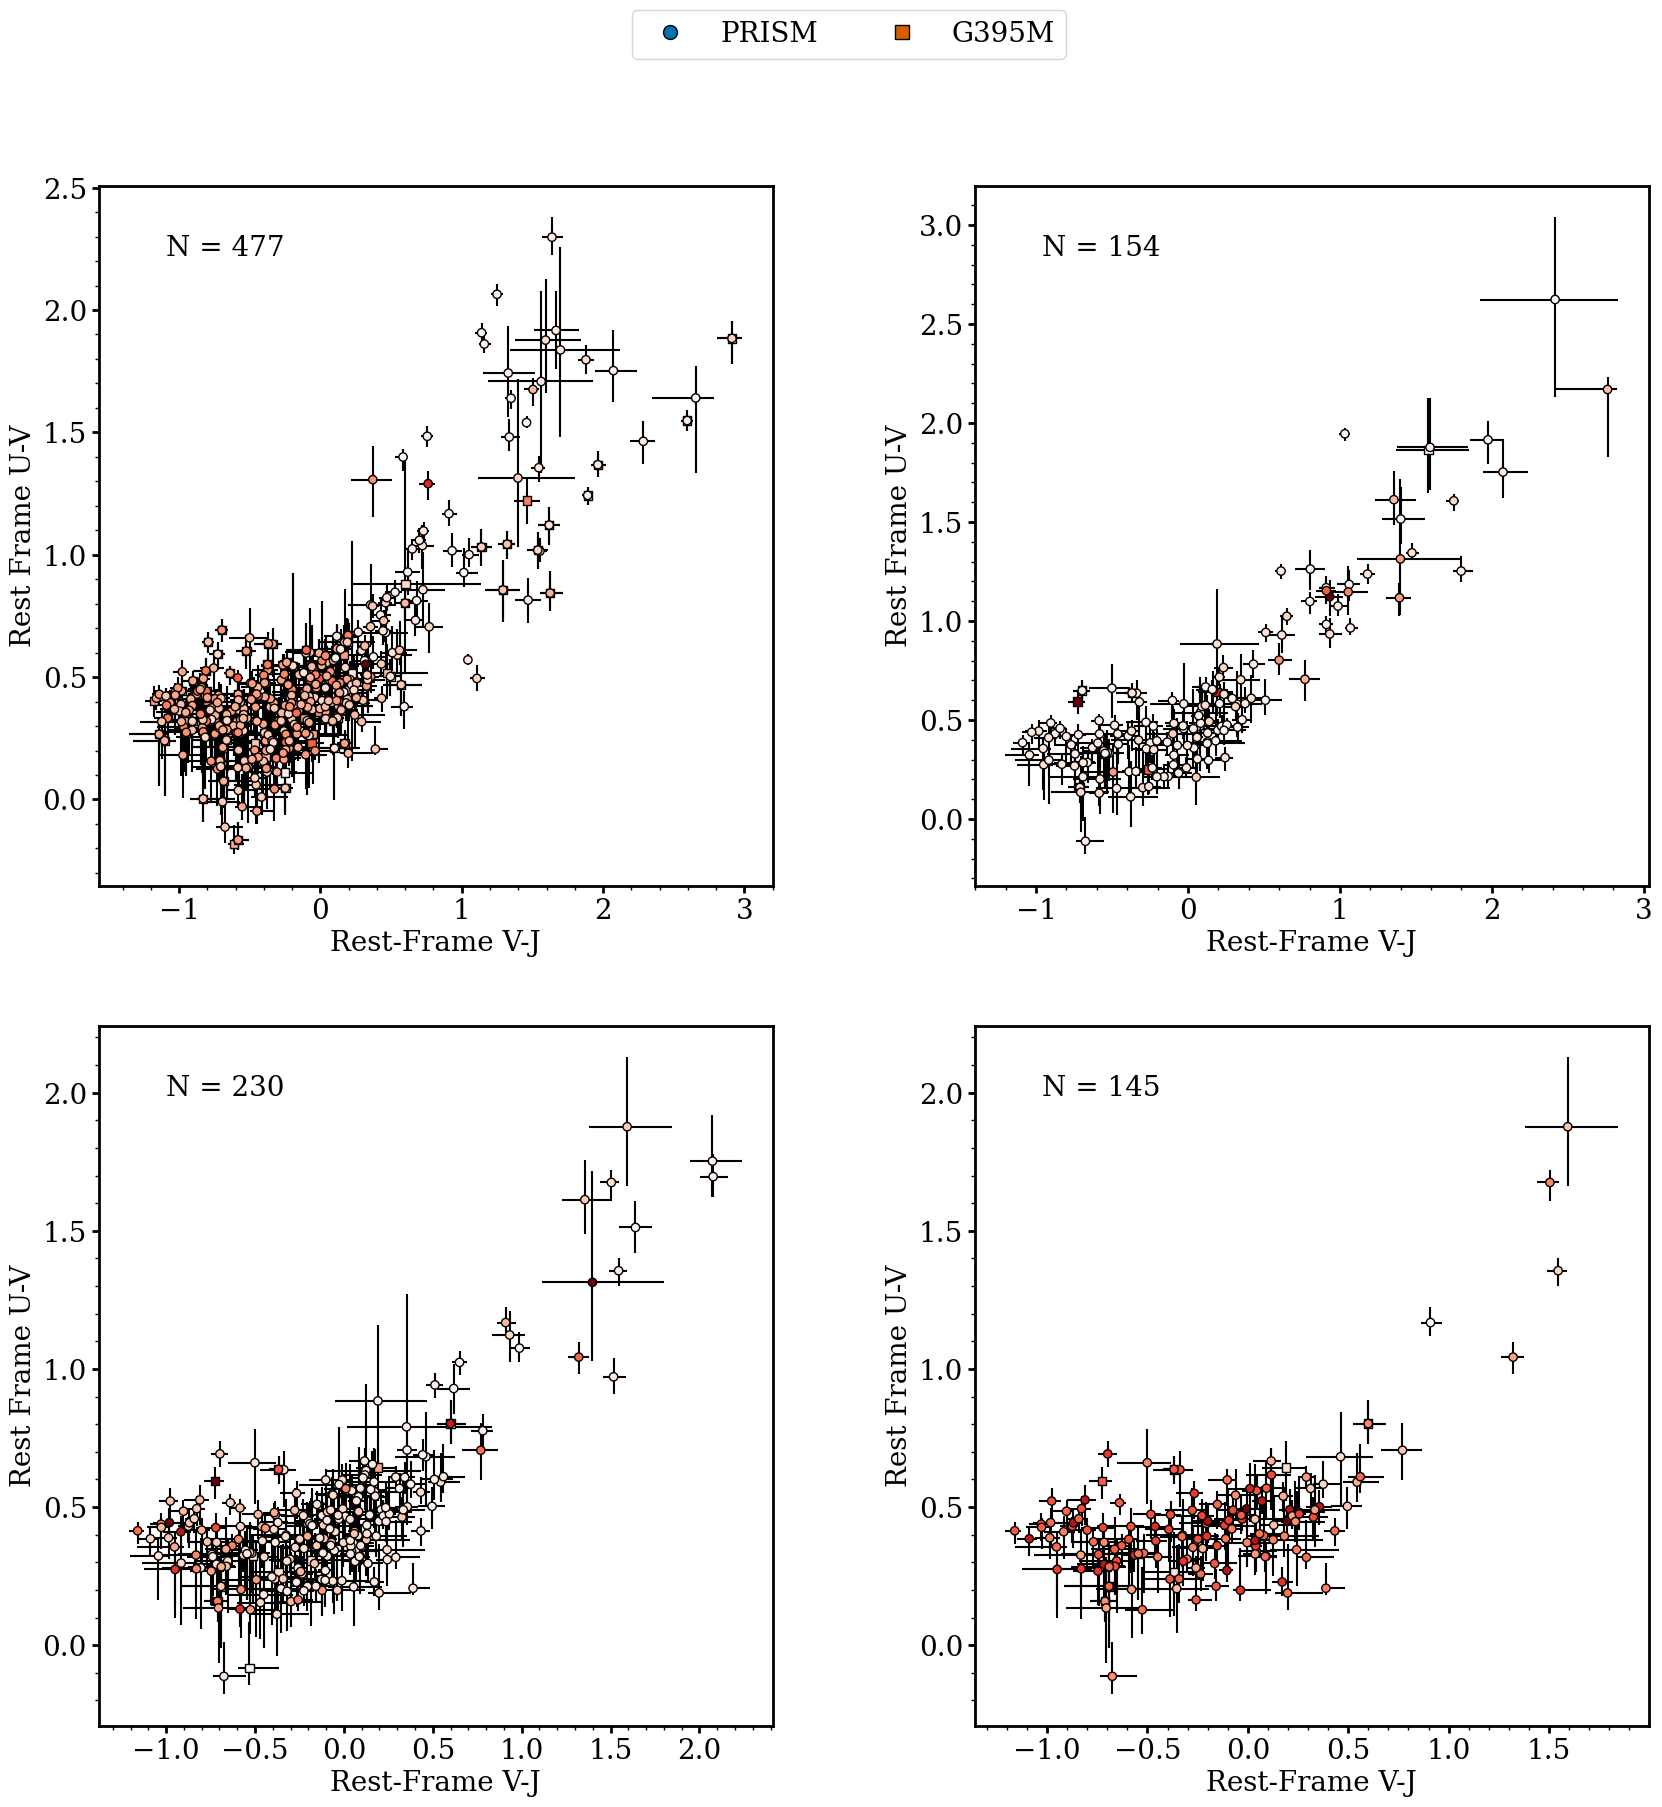

In [61]:
fig = plt.figure(figsize=(20,20))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.3, hspace=0.2)

ax = fig.add_subplot(gs[0:1, 0:1])
plot_UVJ_color_OIIIHb(ax)

ax = fig.add_subplot(gs[0:1, 1:2])
plot_UVJ_color_NeIIIOII(ax)

ax = fig.add_subplot(gs[1:2, 0:1])
plot_UVJ_color_O32(ax)

ax = fig.add_subplot(gs[1:2, 1:2])
plot_UVJ_color_R23(ax)

legend_elements = generate_legend_elements_ratios_versus_UVJ()     
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

plt.savefig(globals.FIGURES.joinpath('UVJ.pdf'))
plt.show()

/var/folders/cb/t7f9wn6d0_v4b9j9886w59pdjg8xs7/T/ipykernel_3058/1191019751.py:7: RuntimeWarning: invalid value encountered in log10
  ax.scatter(mstar_g395m.VJ_50_photcat, mstar_g395m.UV_50_photcat, c=np.log10(np.array(mstar_g395m.L_Ha)), cmap='Reds', vmin=39, vmax=44, marker='s', ec='k', label='G395M')
/var/folders/cb/t7f9wn6d0_v4b9j9886w59pdjg8xs7/T/ipykernel_3058/1191019751.py:13: RuntimeWarning: invalid value encountered in log10
  ax.scatter(mstar_prism.VJ_50_photcat, mstar_prism.UV_50_photcat, c=np.log10(np.array(mstar_prism.L_Ha)), cmap='Reds', vmin=39, vmax=44, marker='o', ec='k', label='PRISM')


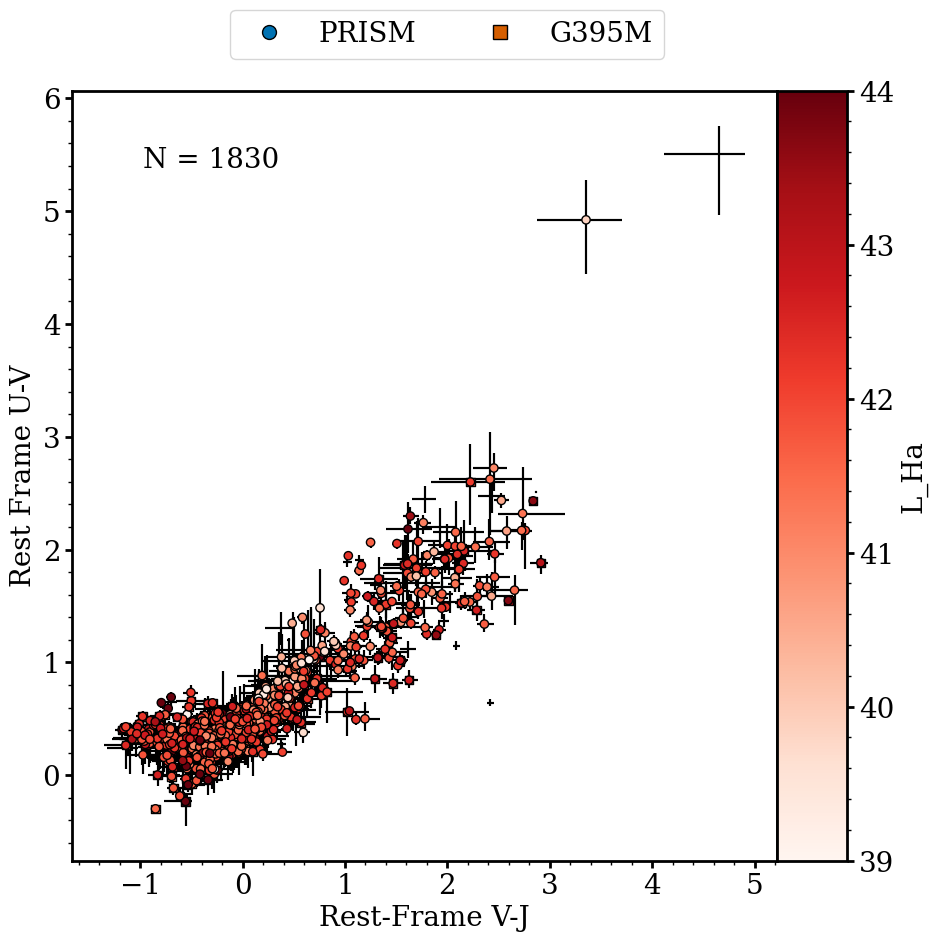

In [69]:
import matplotlib as mpl
def plot_UVJ_color_Ha(ax):
    ax.errorbar(x=mstar_g395m.VJ_50_photcat, y=mstar_g395m.UV_50_photcat, 
            xerr=[np.abs(mstar_g395m.UV_16_photcat - mstar_g395m.UV_50_photcat), np.abs(mstar_g395m.UV_84_photcat - mstar_g395m.UV_50_photcat)],
            yerr=[np.abs(mstar_g395m.UV_16_photcat - mstar_g395m.UV_50_photcat), np.abs(mstar_g395m.UV_84_photcat - mstar_g395m.UV_50_photcat)],
            ls='None', color='k', label='G395M', zorder=-9)
    ax.scatter(mstar_g395m.VJ_50_photcat, mstar_g395m.UV_50_photcat, c=np.log10(np.array(mstar_g395m.L_Ha)), cmap='Reds', vmin=39, vmax=44, marker='s', ec='k', label='G395M')

    ax.errorbar(x=mstar_prism.VJ_50_photcat, y=mstar_prism.UV_50_photcat, 
                xerr=[np.abs(mstar_prism.UV_16_photcat - mstar_prism.UV_50_photcat), np.abs(mstar_prism.UV_84_photcat - mstar_prism.UV_50_photcat)],
                yerr=[np.abs(mstar_prism.UV_16_photcat - mstar_prism.UV_50_photcat), np.abs(mstar_prism.UV_84_photcat - mstar_prism.UV_50_photcat)],
                ls='None', color='k', label='PRISM', zorder=-9)
    ax.scatter(mstar_prism.VJ_50_photcat, mstar_prism.UV_50_photcat, c=np.log10(np.array(mstar_prism.L_Ha)), cmap='Reds', vmin=39, vmax=44, marker='o', ec='k', label='PRISM')

    ax.annotate(f'N = {len(mstar_prism) + len(mstar_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'Rest-Frame V-J')
    ax.set_ylabel('Rest Frame U-V')
    # ax.axis([7,12,-1,1.5])

fig = plt.figure(figsize=(10,10))
gs = GridSpec(nrows=10, ncols=11)
gs.update(wspace=0.0, hspace=0.0)

ax = fig.add_subplot(gs[0:10, 0:10])
plot_UVJ_color_Ha(ax)

cax = fig.add_subplot(gs[0:10, 10:11])
norm = mpl.colors.Normalize(vmin=39, vmax=44)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'), cax=cax, use_gridspec=True, label='L_Ha')


legend_elements = generate_legend_elements_ratios_versus_UVJ()     
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

plt.savefig(globals.FIGURES.joinpath('UVJ_Ha.pdf'))
plt.show()

In [66]:
mstar_prism

id   z_prism  z_prism_p16  z_prism_p84  msaexp_OIII5007_prism  \
0      9407  4.823805     4.822864     4.825003                    NaN   
1     10230  2.998668     2.997611     2.999653                    NaN   
2     11298  1.991321     1.989014     2.000555                    NaN   
3     11917  2.594927     2.593674     2.596804                    NaN   
4     12878  3.307137     3.306429     3.307904                    NaN   
..      ...       ...          ...          ...                    ...   
910  975193  6.990972     6.990587     6.991392                    NaN   
911  978590  7.762505     7.761422     7.763803                    NaN   
912  980841  8.693971     8.693591     8.694390                    NaN   
913  986615  6.504203     6.503798     6.504668                    NaN   
914  986719  6.671703     6.670988     6.672444                    NaN   

     msaexp_e_OIII5007_prism  msaexp_OIII_5007_prism  \
0                        NaN              1400.24760   
1                        NaN                     NaN   
2                        NaN                     NaN   
3                        NaN                     NaN   
4                        NaN                     NaN   
..                       ...                     ...   
910                      NaN               843.09406   
911                      NaN               169.48310   
912                      NaN              1310.00670   
913                      NaN               977.37524   
914                      NaN               537.42360   

     msaexp_e_OIII_5007_prism          ra        dec  ...  R23_ERR_16  \
0                   45.728313   34.268649  -5.300197  ...    1.881207   
1                         NaN   34.268191  -5.298482  ...   11.725440   
2                         NaN   34.267565  -5.296456  ...    1.663250   
3                         NaN   34.268266  -5.295208  ...    0.869343   
4                         NaN   34.267667  -5.293498  ...    1.449507   
..                        ...         ...        ...  ...         ...   
910                 40.538708  214.967248  52.963630  ...         NaN   
911                 22.472012  214.830660  52.887775  ...    1.409158   
912                 45.027832  214.844770  52.892109  ...    0.647881   
913                 45.142440  214.950932  52.957040  ...         NaN   
914                 43.939800  214.950365  52.956194  ...         NaN   

             L_Ha   L_Ha_ERR_84   L_Ha_ERR_16          L_Hb   L_Hb_ERR_84  \
0    1.592524e+42  5.021817e+40  5.981119e+40  3.931302e+41  8.206066e+40   
1    4.916566e+41  2.173975e+40  2.155724e+40  6.486814e+40  4.838016e+40   
2    2.281245e+41  1.706942e+40  1.707319e+40  6.037249e+41  2.825276e+41   
3    3.524969e+41  2.307551e+40  2.397637e+40  1.195770e+41  3.063622e+40   
4    3.261434e+41  2.601121e+40  2.482680e+40  1.098727e+41  2.105543e+40   
..            ...           ...           ...           ...           ...   
910           NaN           NaN           NaN  8.913013e+41  9.287133e+40   
911           NaN           NaN           NaN  3.224691e+41  1.394794e+41   
912           NaN           NaN           NaN  2.161498e+42  2.278855e+41   
913           NaN           NaN           NaN  5.644940e+41  7.178278e+40   
914           NaN           NaN           NaN  2.929417e+41  8.611905e+40   

      L_Hb_ERR_16   L_OIII_5007  L_OIII_5007_ERR_84  L_OIII_5007_ERR_16  
0    8.604236e+40  2.573828e+42        1.227035e+41        1.132649e+41  
1    4.123869e+40  6.846290e+41        6.108392e+40        6.004180e+40  
2    2.500108e+41  2.780474e+41        3.987927e+41        2.398247e+41  
3    1.992171e+40  4.670337e+41        3.443492e+40        3.186931e+40  
4    1.948441e+40  6.832971e+41        2.938965e+40        2.781940e+40  
..            ...           ...                 ...                 ...  
910  8.985845e+40  4.595940e+42        1.796776e+41        1.649591e+41  
911  1.284514e+41  7.485618e+41        1.909983e+41  